### CREATE DAILY INPUT FOR THE ML MODEL

Input:
- the measured runoff at the gauging station,
- the catchment area of the gauging station,
- the ERA5 datasets for Potential Evapotranspiration, Temperature and Precipitation.

Output:
    - a .csv file is saved in conda/daily_input folder.

In [1]:
import sys, importlib
importlib.reload(sys.modules['create_daily_csv'])

KeyError: 'create_daily_csv'

In [10]:
from create_daily_csv import interpolate_df,readnetcdf_in_shp,xarray2df,check_data_gap,readnetcdf_in_shp_db,get_discharge_from_DB
import pandas as pd
import numpy as np
import os
import xarray as xr
from matplotlib import pyplot as plot


In [6]:
STAT_CODE = 'ADO_DSC_ITC1_0037'

In [7]:
runoff=get_discharge_from_DB(STAT_CODE)

shp_catchment_path = r'C:\Users\mmazzolini\OneDrive - Scientific Network South Tyrol\Documents\qgis\final_delineation'
shp_catchment_fileName =shp_catchment_path + r'\DONAU_Korneuburg.shp'

# Runoff
catchment_name = 'KORONEMBURG_DONAU.txt'
fileName = r'C:\Users\mmazzolini\OneDrive - Scientific Network South Tyrol\data_discharge\\' + catchment_name
#runoff = pd.read_csv(fileName, index_col=2, parse_dates=True)
runoff = pd.read_csv(fileName, delimiter=',', index_col=1
                     , parse_dates=True)

runoff=runoff.drop(columns=['id_station','quality'])

runoff.index = pd.to_datetime(runoff.Datum, format='%d.%m.%Y')

runoff['discharge_m3_s']=runoff['pretok (m3/s)']

#runoff=runoff.drop(columns='pretok (m3/s)')
runoff=runoff.drop(columns=['Datum','temp. vode (°C)','transport suspendiranega materiala (kg/s)','vsebnost suspendiranega materiala (g/m3)'])

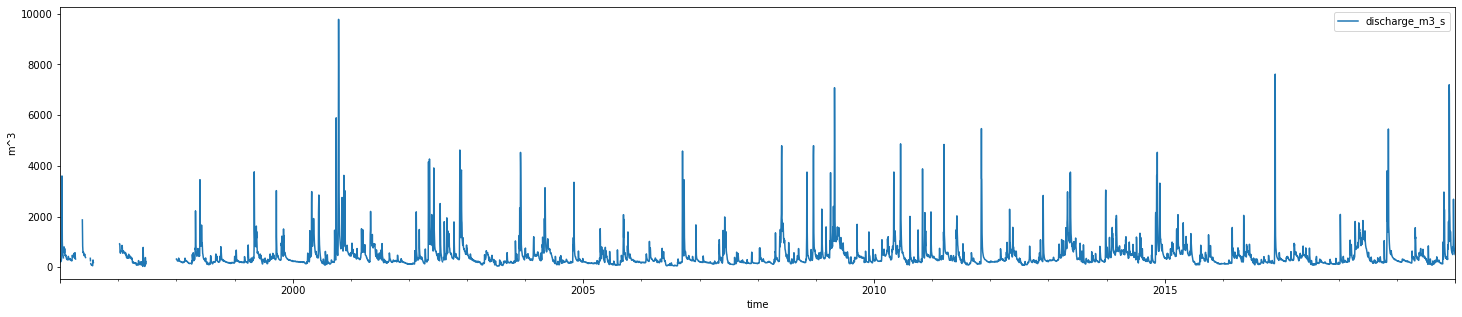

In [16]:


ax=runoff.plot.line(figsize=(25,5),
                      ylabel='m^3',
                      xlabel='time')

In [6]:
check_data_gap(runoff)
#runoff = runoff.reindex(pd.date_range(runoff.index.min() - pd.DateOffset(years=1), runoff.index.max()), fill_value=np.nan)
runoff = runoff.rename(columns={'discharge_m3_s': 'Q'})
#runoff.drop(['id_station','quality'],axis=1,inplace=True)

Date start: 2002-01-07, date end: 2019-12-31
Missing dates: 2002-06-09, 2002-06-10, 2002-06-11, 2002-06-12, 2002-06-13, 2002-06-14, 2002-06-15, 2002-06-16, 2002-06-17, 2002-06-18, 2002-06-19, 2002-06-20, 2002-06-21, 2002-06-22, 2002-06-23, 2002-06-24, 2002-06-25, 2002-06-26, 2002-06-27, 2002-06-28, 2002-06-29, 2002-06-30, 2002-07-01, 2002-07-02, 2002-07-03, 2002-07-04, 2002-07-05, 2002-07-06, 2002-07-07, 2002-07-08, 2002-07-09, 2002-07-10, 2002-07-11, 2002-07-12, 2002-07-13, 2002-07-14, 2002-07-15, 2002-07-16, 2002-07-17, 2002-07-18, 2002-07-19, 2002-07-20, 2002-07-21, 2002-07-22, 2002-07-23, 2002-07-24, 2002-07-25, 2002-07-26, 2002-07-27, 2002-07-28, 2002-07-29, 2002-07-30, 2002-07-31, 2002-08-01, 2002-08-02, 2002-08-03, 2002-08-04, 2002-08-05, 2002-08-06, 2002-08-07, 2002-08-08, 2002-08-09, 2002-08-10, 2002-08-11, 2002-08-12, 2002-08-13, 2002-08-14, 2002-08-15, 2002-08-16, 2002-08-17, 2002-08-18, 2002-08-19, 2002-08-20, 2002-08-21, 2002-08-22, 2002-08-23, 2002-08-24, 2002-08-25, 2002

n of pixels26


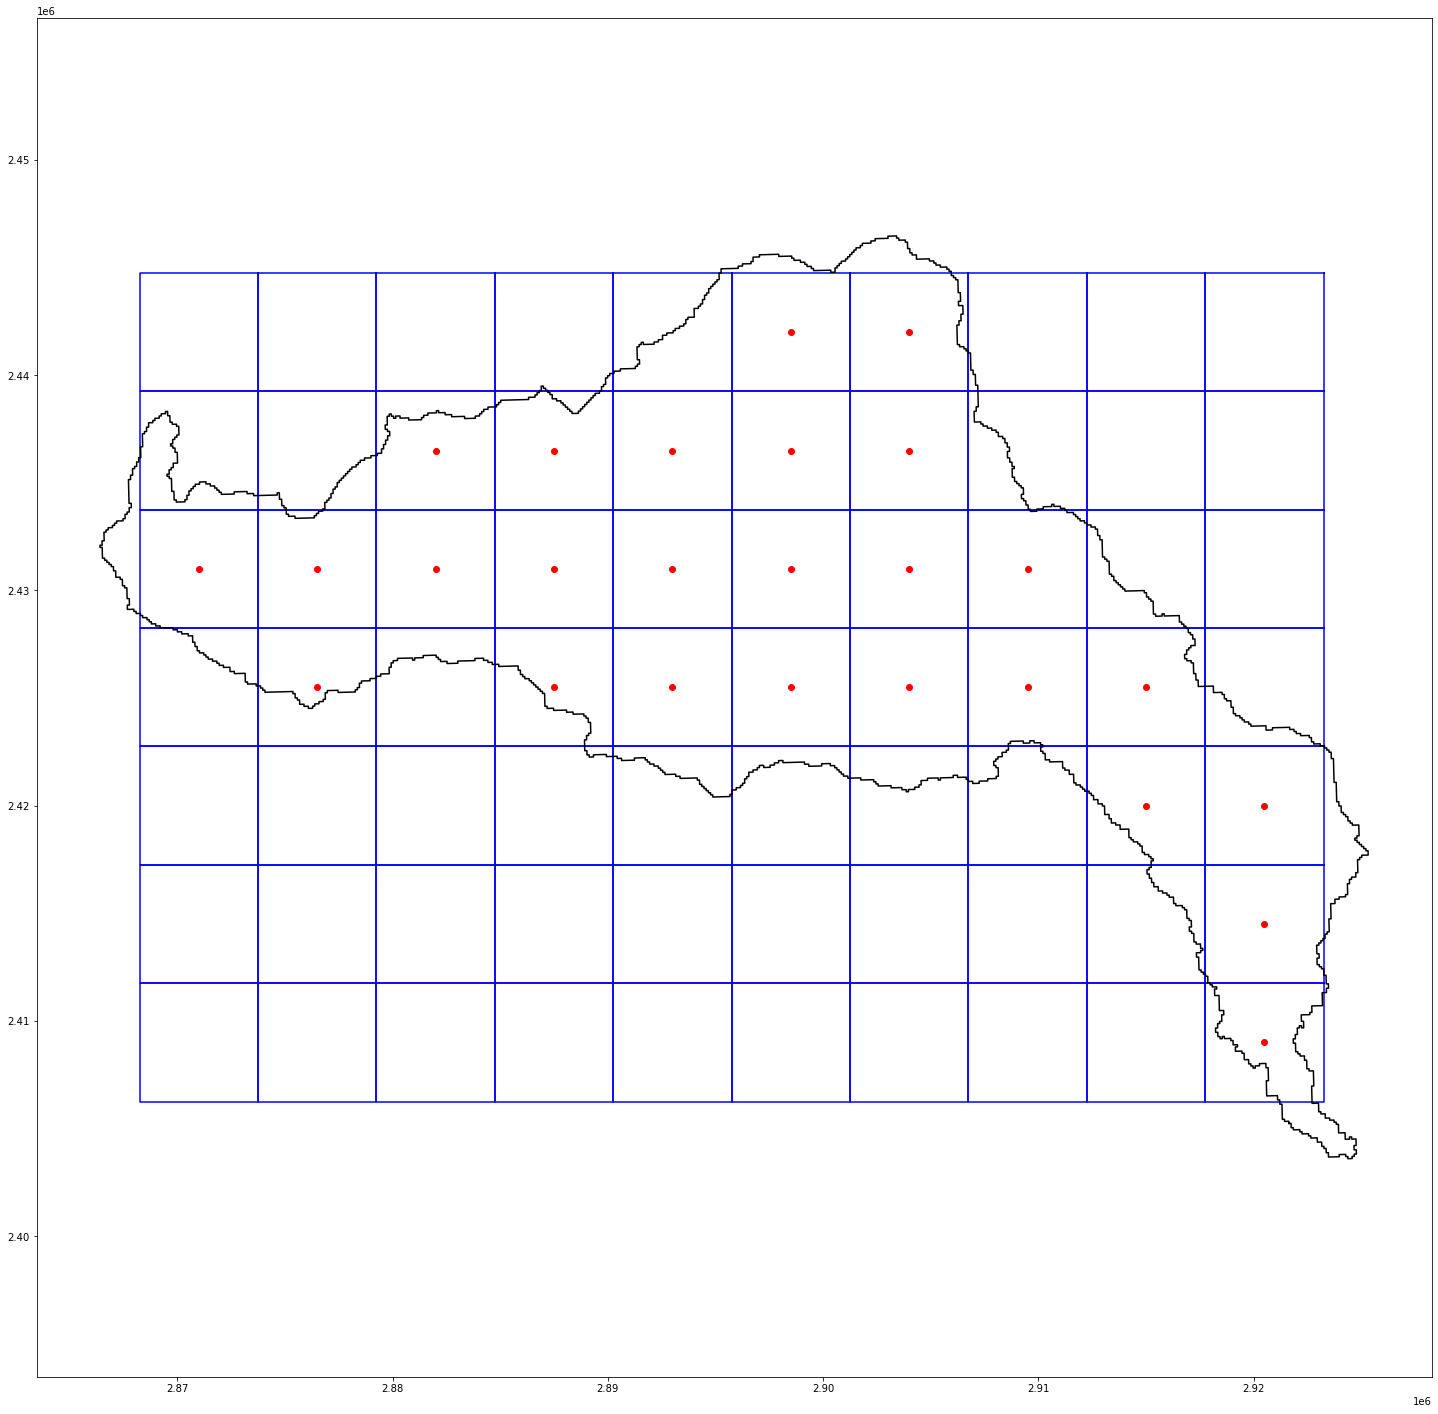

In [20]:
# ERA5 temperature

era5_fileName=  r'C:\Users\mmazzolini\OneDrive - Scientific Network South Tyrol\era5\2m_temperature-19790101_20181231-eusalp-qm_era5.nc'

t2m = readnetcdf_in_shp_db(era5_fileName,STAT_CODE ,plot=True,res=5500)['t2m']


t2m = xarray2df(t2m.resample(time='1d').mean(), 'T','t2m')
check_data_gap(t2m)

n of pixels36
Date start: 1979-01-01, date end: 2018-12-31
No missing dates


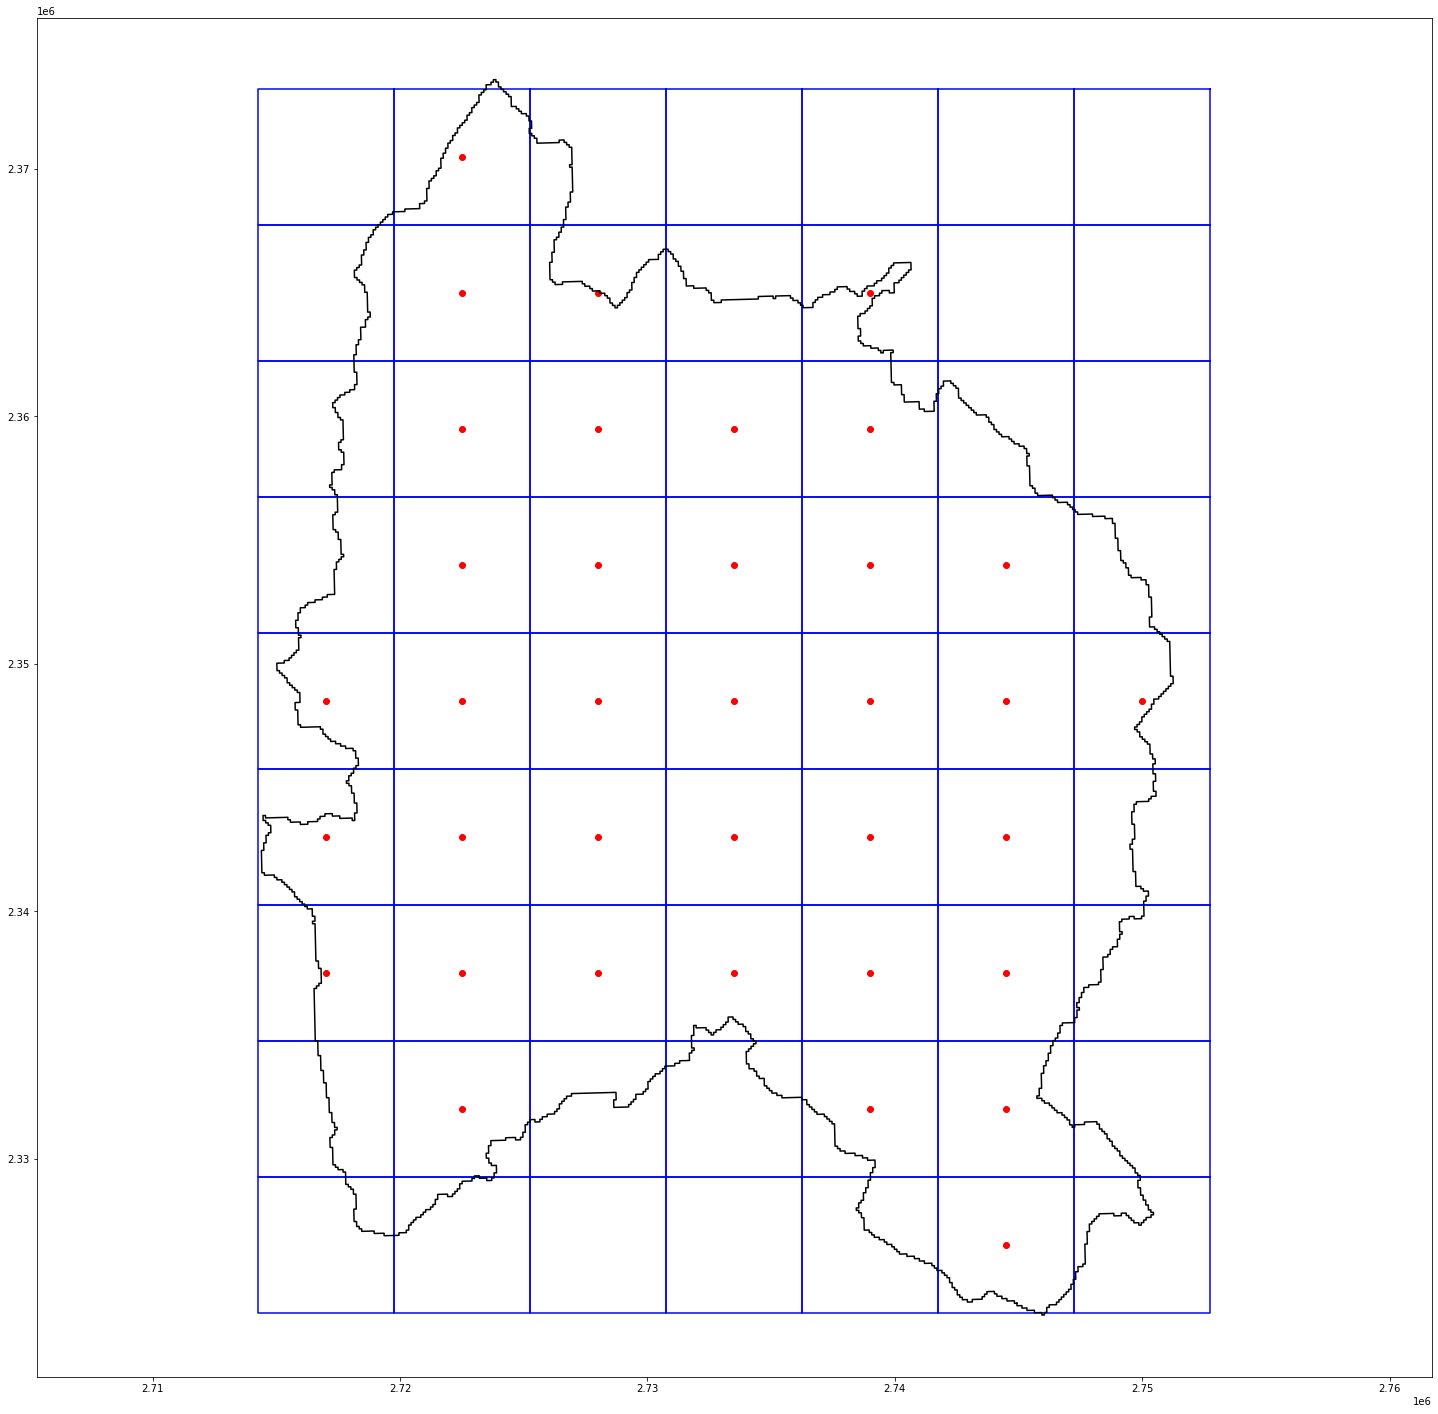

In [54]:
# ERA5 evapotranspiration
era5_fileName = r'C:\Users\mmazzolini\OneDrive - Scientific Network South Tyrol\era5\potential_evapotranspiration-19790101_20181231-eusalp-qm_era5.nc'

pet = readnetcdf_in_shp_db(era5_fileName, STAT_CODE,plot=True)['pet']
pet = xarray2df(pet.resample(time='1d').sum(skipna=False), 'E','pet')

check_data_gap(pet)

n of pixels36
Date start: 1979-01-01, date end: 2018-12-31
No missing dates


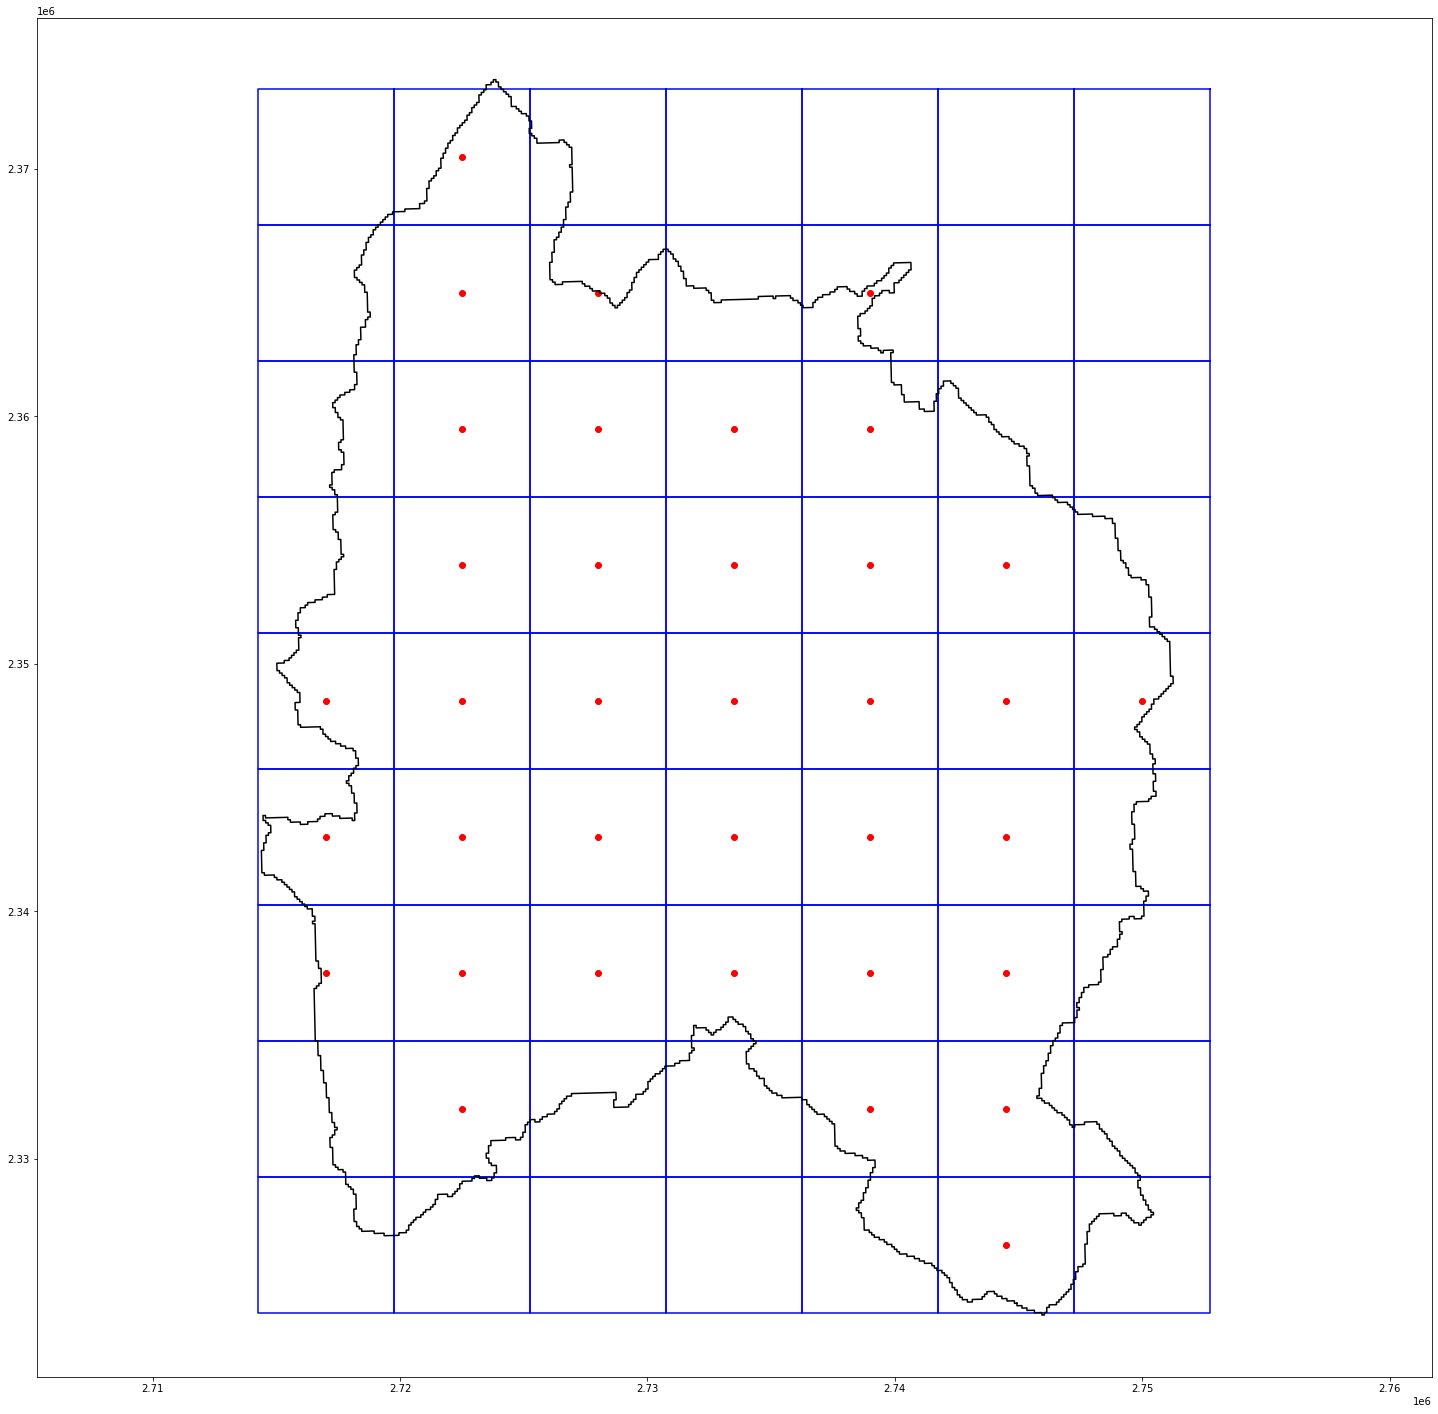

In [55]:
# ERA5 total precipitation
era5_fileName = r'C:\Users\mmazzolini\OneDrive - Scientific Network South Tyrol\era5\total_precipitation-19790101_20181231-eusalp-qm_era5.nc'

tp = readnetcdf_in_shp_db(era5_fileName, STAT_CODE,plot=True)['tp']
tp = xarray2df(tp.resample(time='1d').sum(skipna=False), 'P','tp')

check_data_gap(tp)

n of pixels144
Date start: 1979-01-01, date end: 2020-12-31
No missing dates


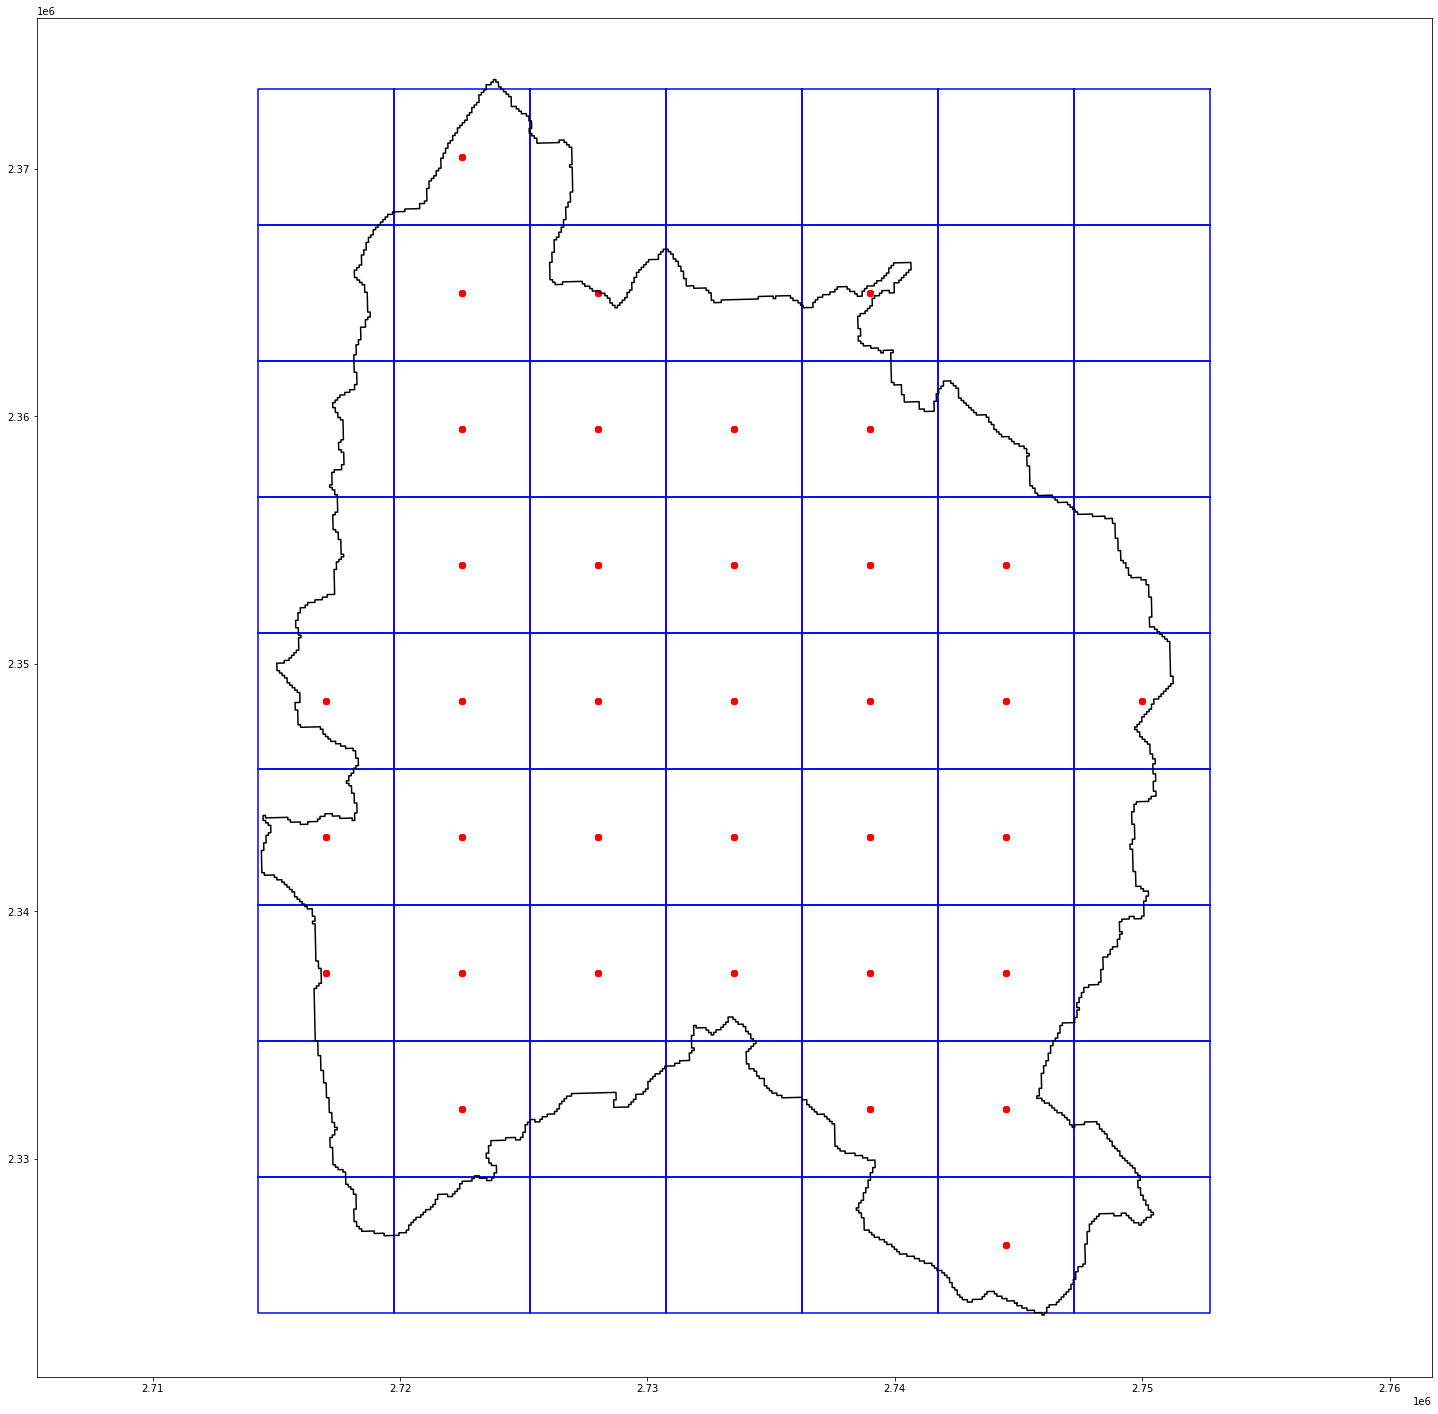

In [113]:
# ERA5 total SNOW VARIABLES
era5_fileName = r'C:\Users\mmazzolini\OneDrive - Scientific Network South Tyrol\era5\SNOWGRID\ado-snowgrid.nc'

s = readnetcdf_in_shp_db(era5_fileName, STAT_CODE,plot=True)['swe_tot']
s = xarray2df(s.resample(time='1d').sum(skipna=False), 'S','swe_tot')

check_data_gap(s)

n of pixels144
Date start: 1979-01-01, date end: 2020-12-31
No missing dates


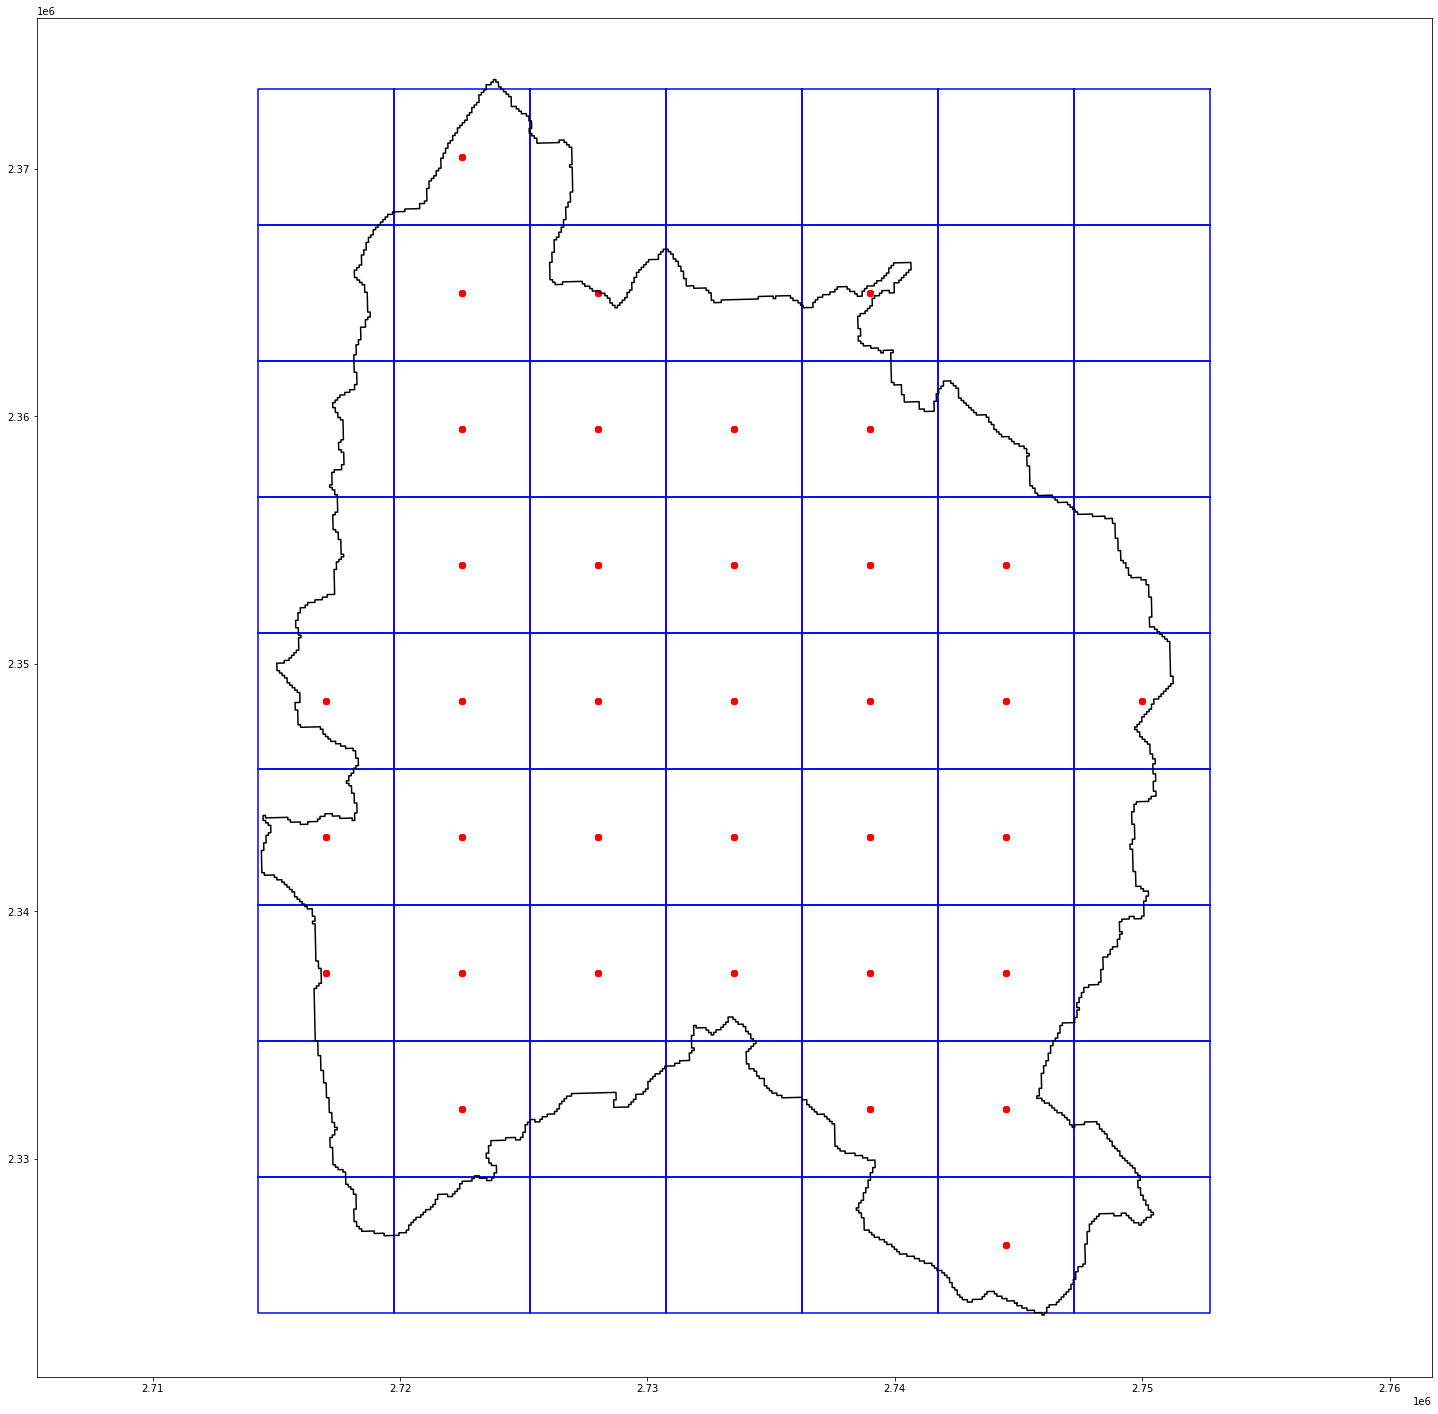

In [114]:

r = readnetcdf_in_shp_db(era5_fileName, STAT_CODE,plot=True)['runoff']
r = xarray2df(r.resample(time='1d').sum(skipna=False), 'R','runoff')

check_data_gap(r)

In [56]:
from os import walk
mypath= r'C:\Users\mmazzolini\OneDrive - Scientific Network South Tyrol\era5\SNOWGRID/'

filenames = next(walk(mypath), (None, None, []))[2]  # [] if no file

n of pixels144
n of pixels144
n of pixels144
n of pixels144
n of pixels144
n of pixels144
n of pixels144
n of pixels144
n of pixels144
n of pixels144
n of pixels144
n of pixels144
n of pixels144
n of pixels144
n of pixels144
n of pixels144
n of pixels144
n of pixels144
n of pixels144
n of pixels144


C:\Users\mmazzolini\OneDrive - Scientific Network South Tyrol\Documents\conda\Runoff_prediction\create_daily_csv.py:160: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(25,25))


n of pixels144
n of pixels144
n of pixels144
n of pixels144
n of pixels144
n of pixels144
n of pixels144
n of pixels144
n of pixels144
n of pixels144
n of pixels144


KeyboardInterrupt: 

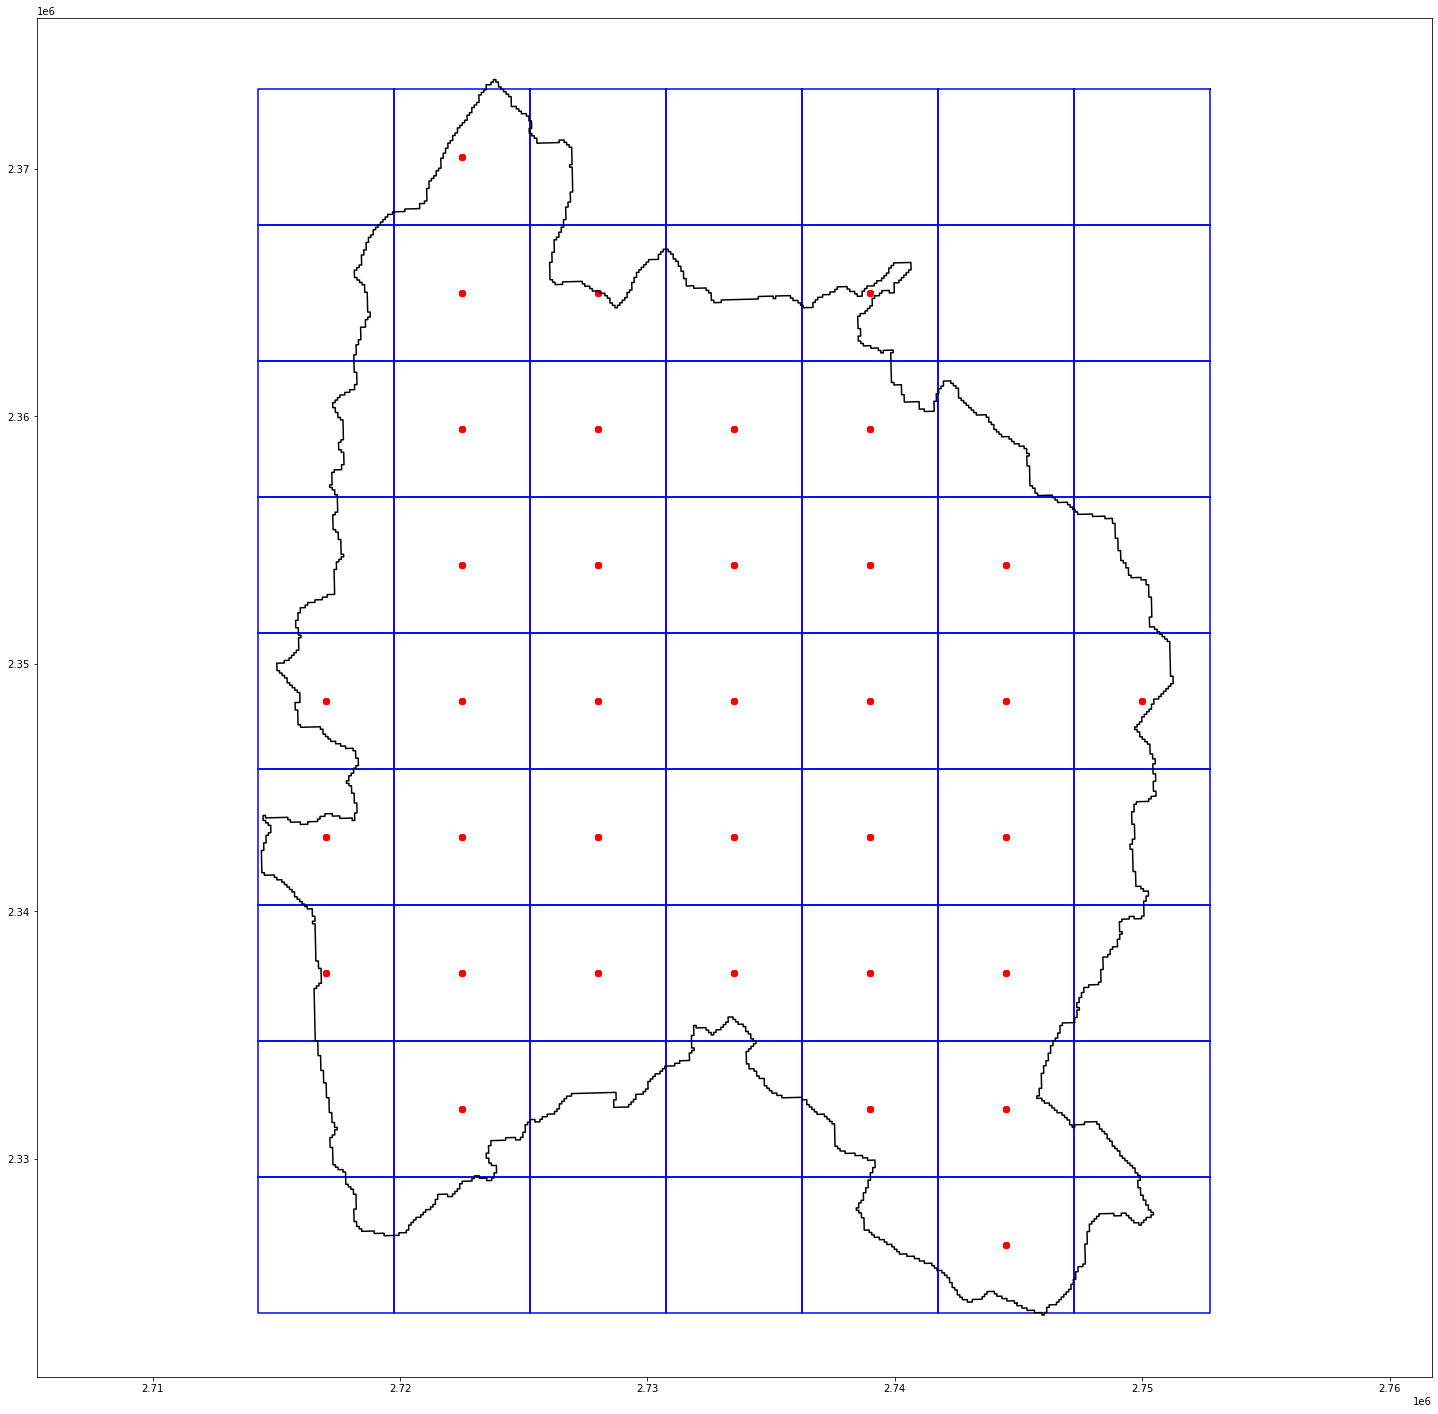

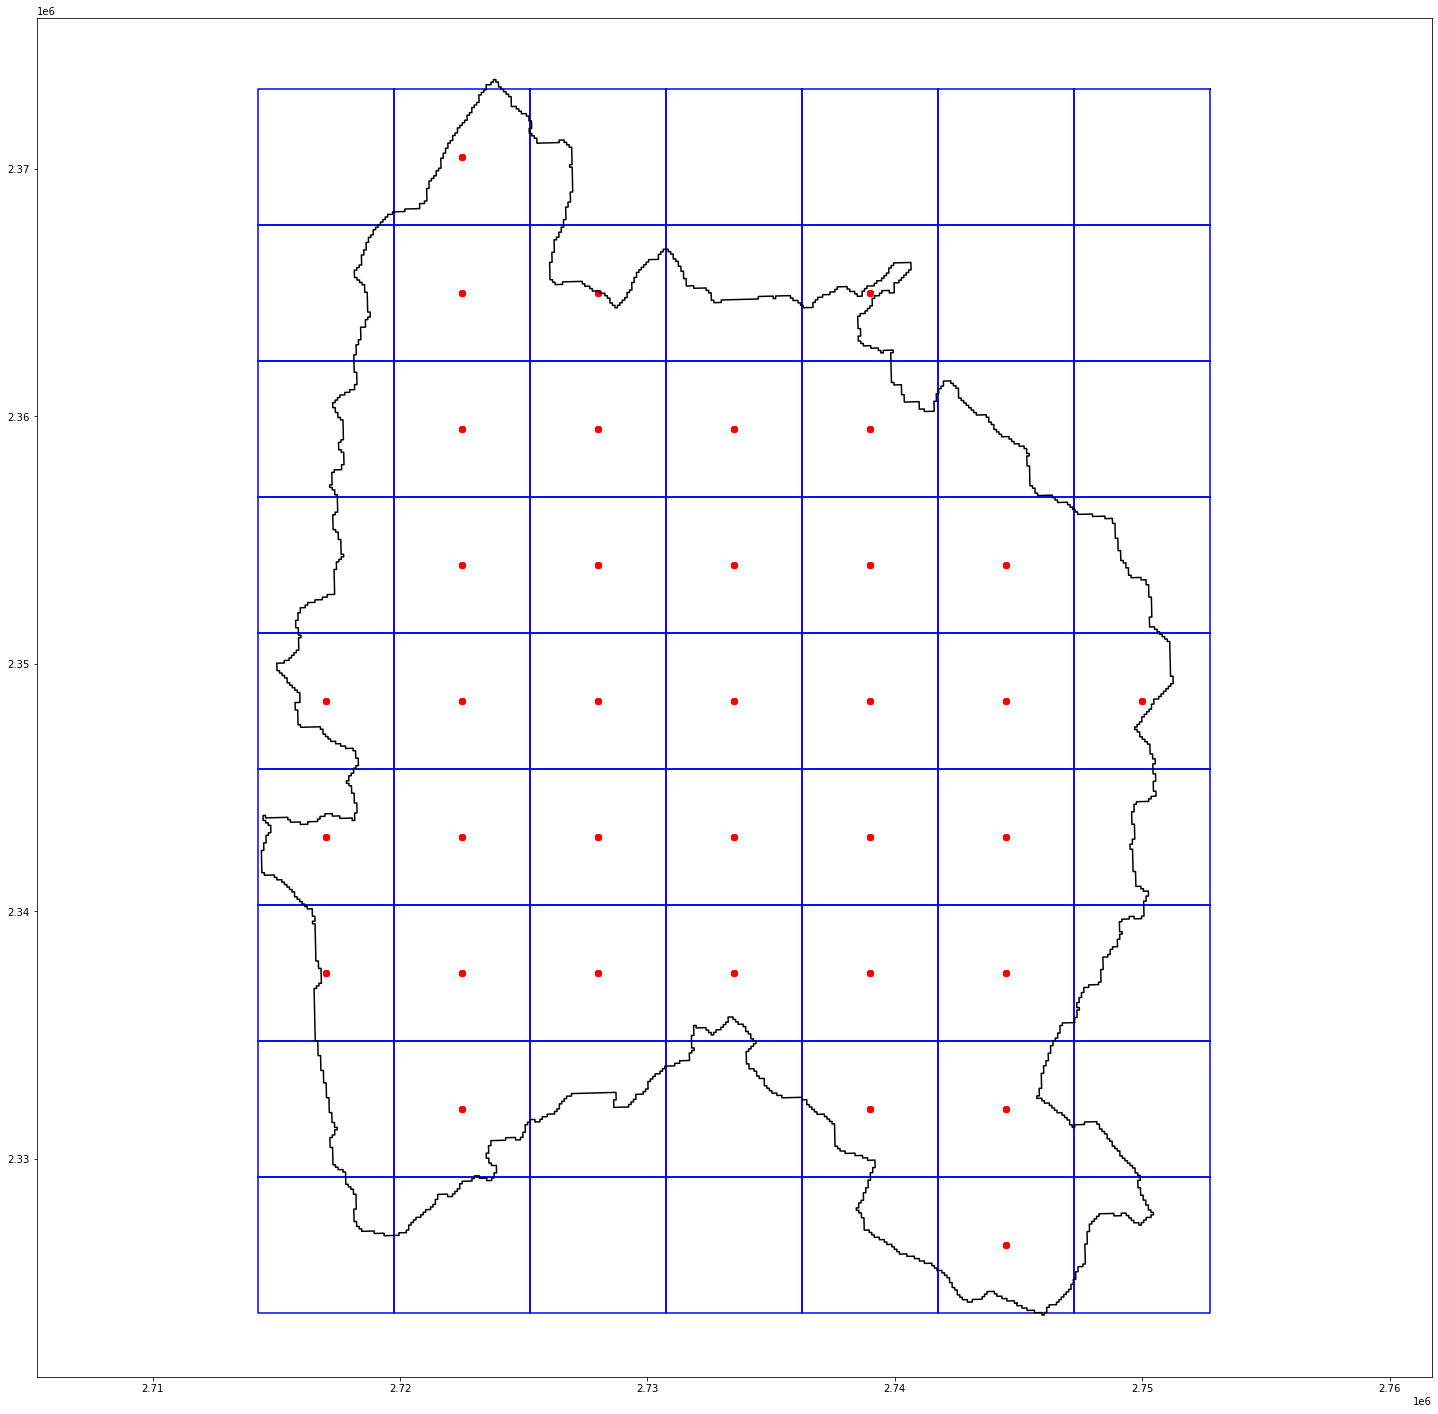

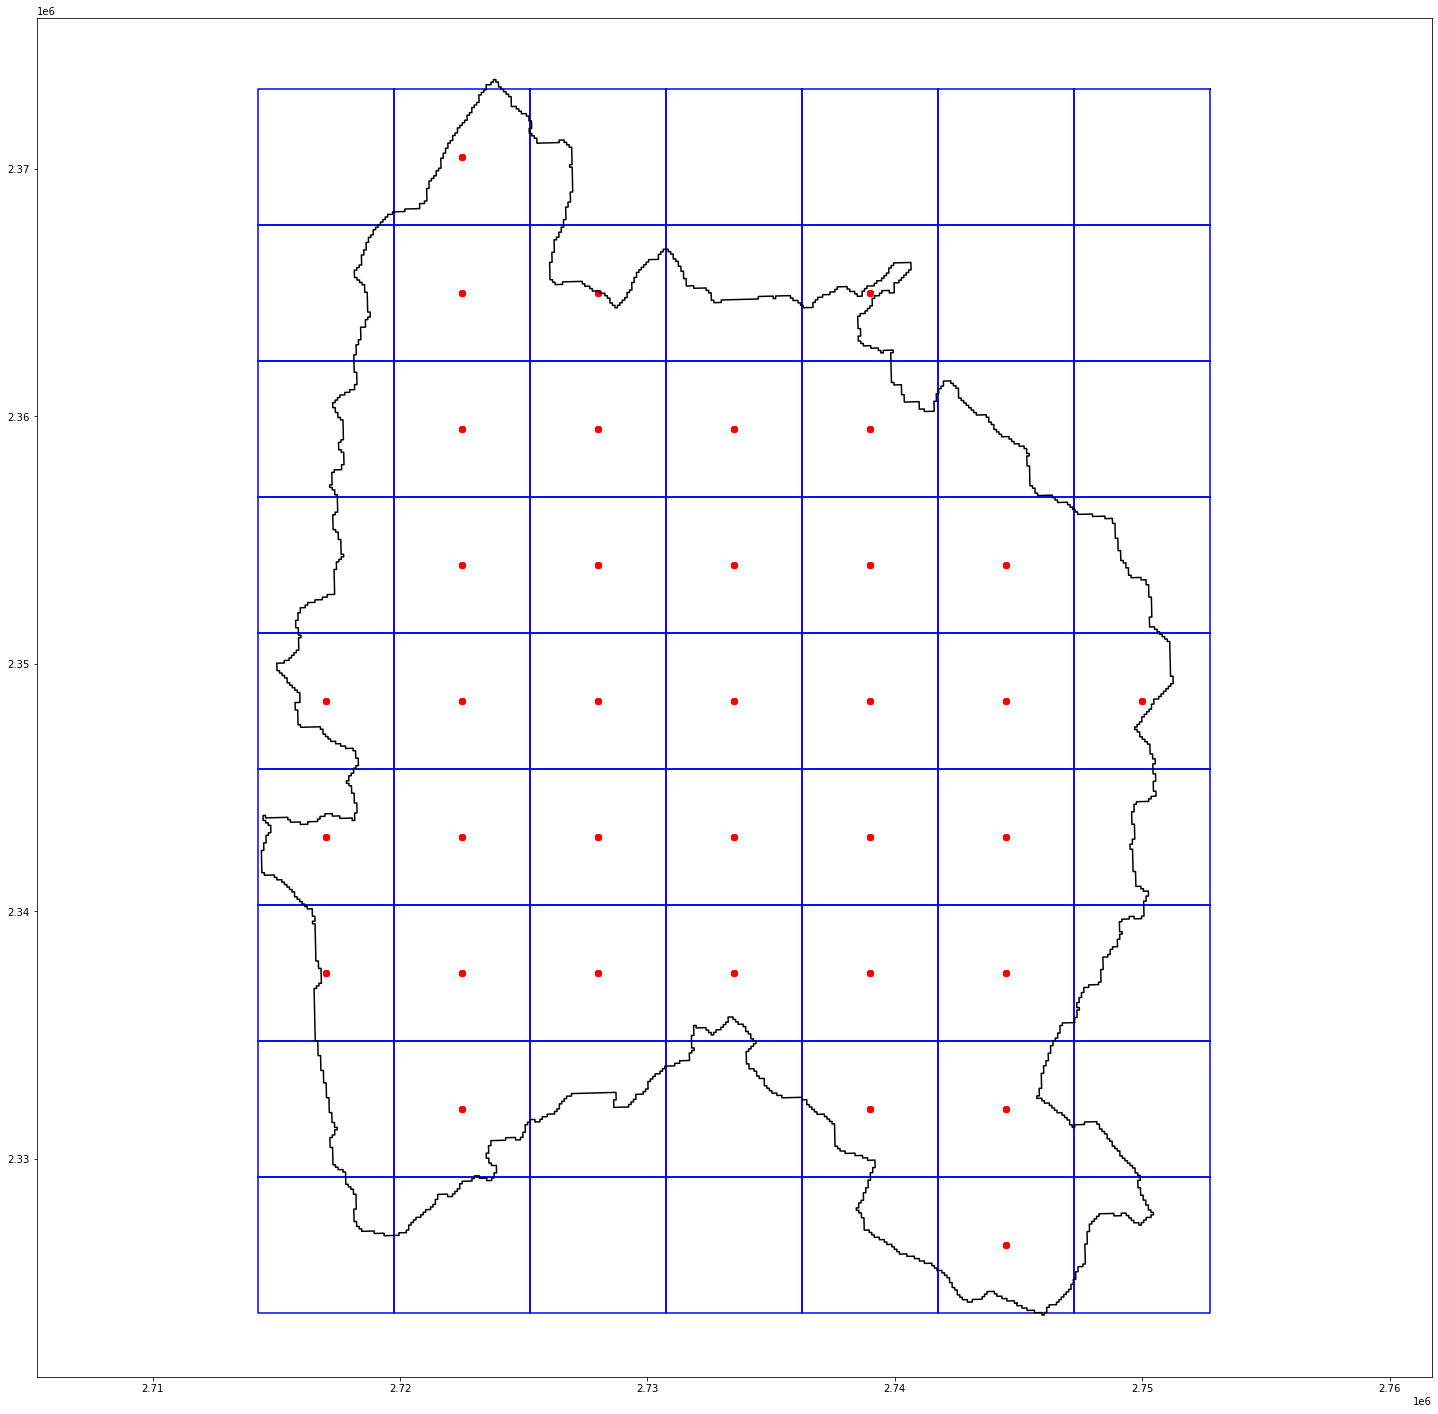

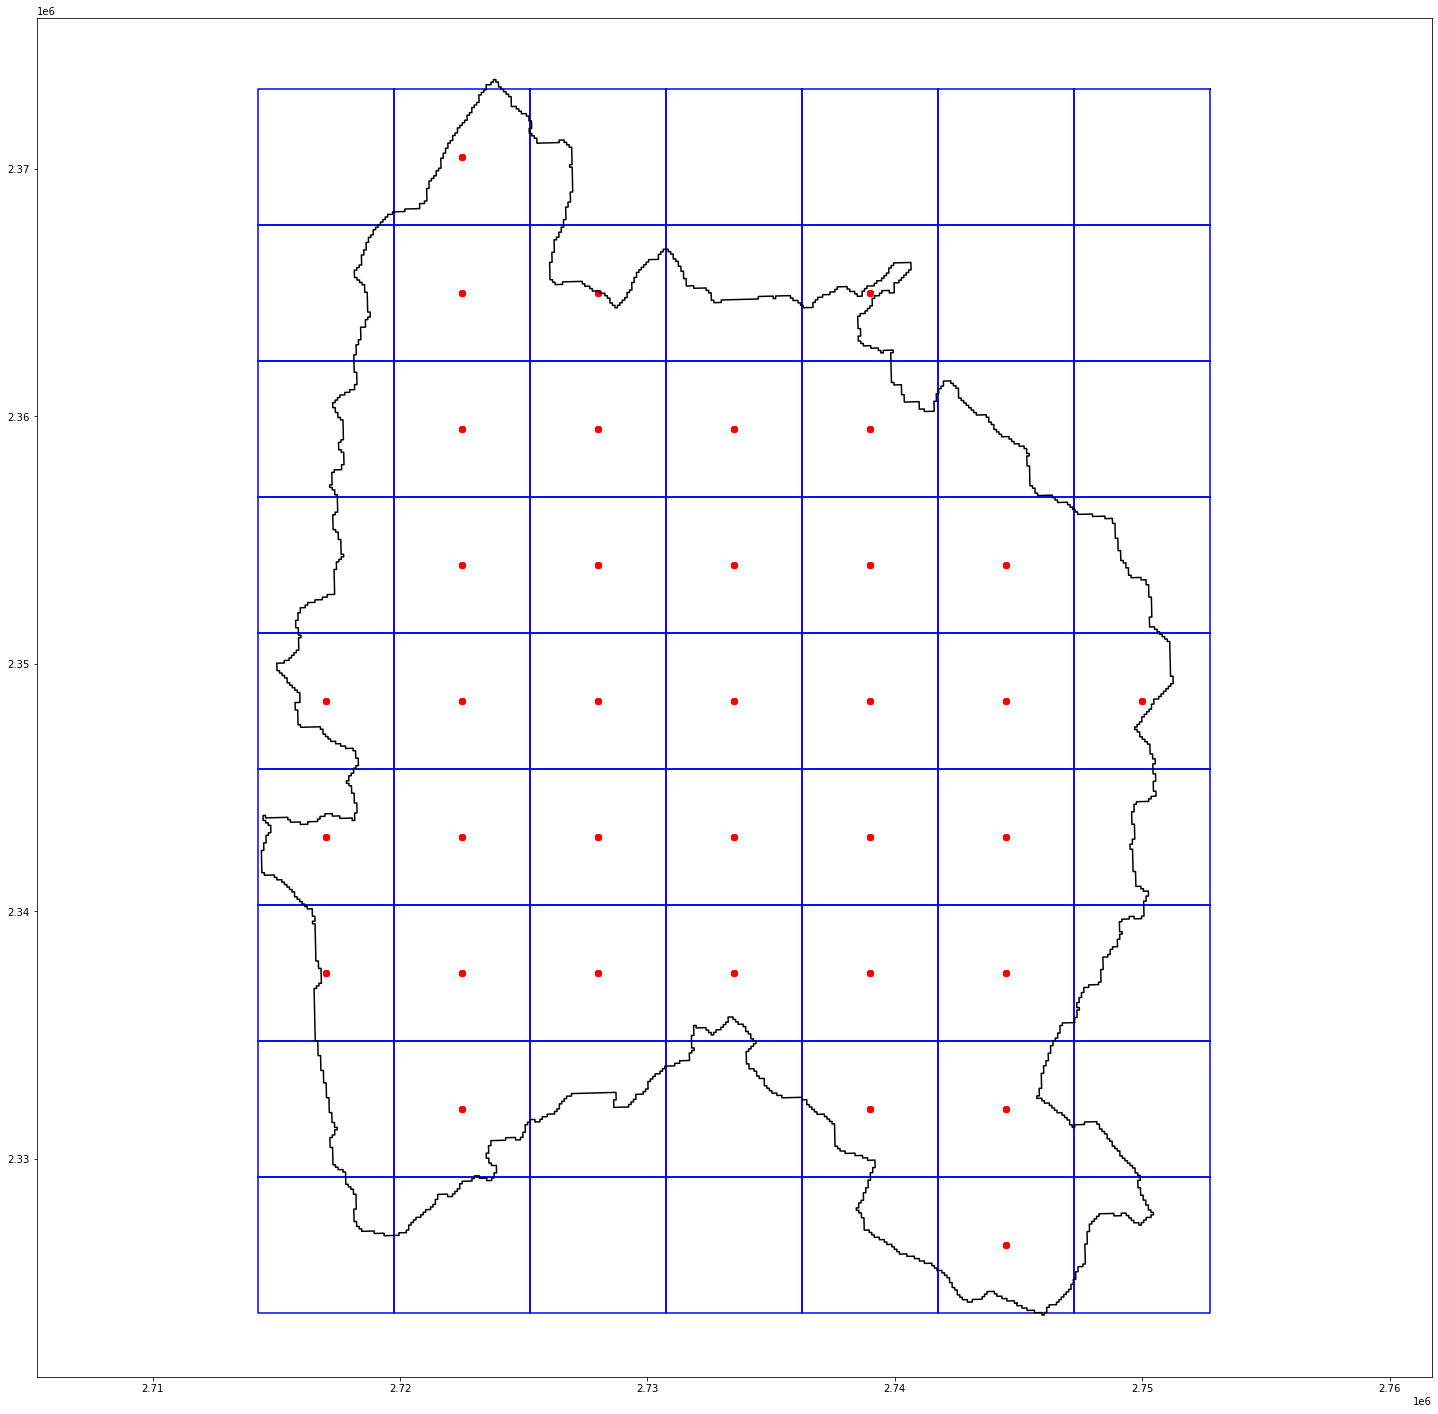

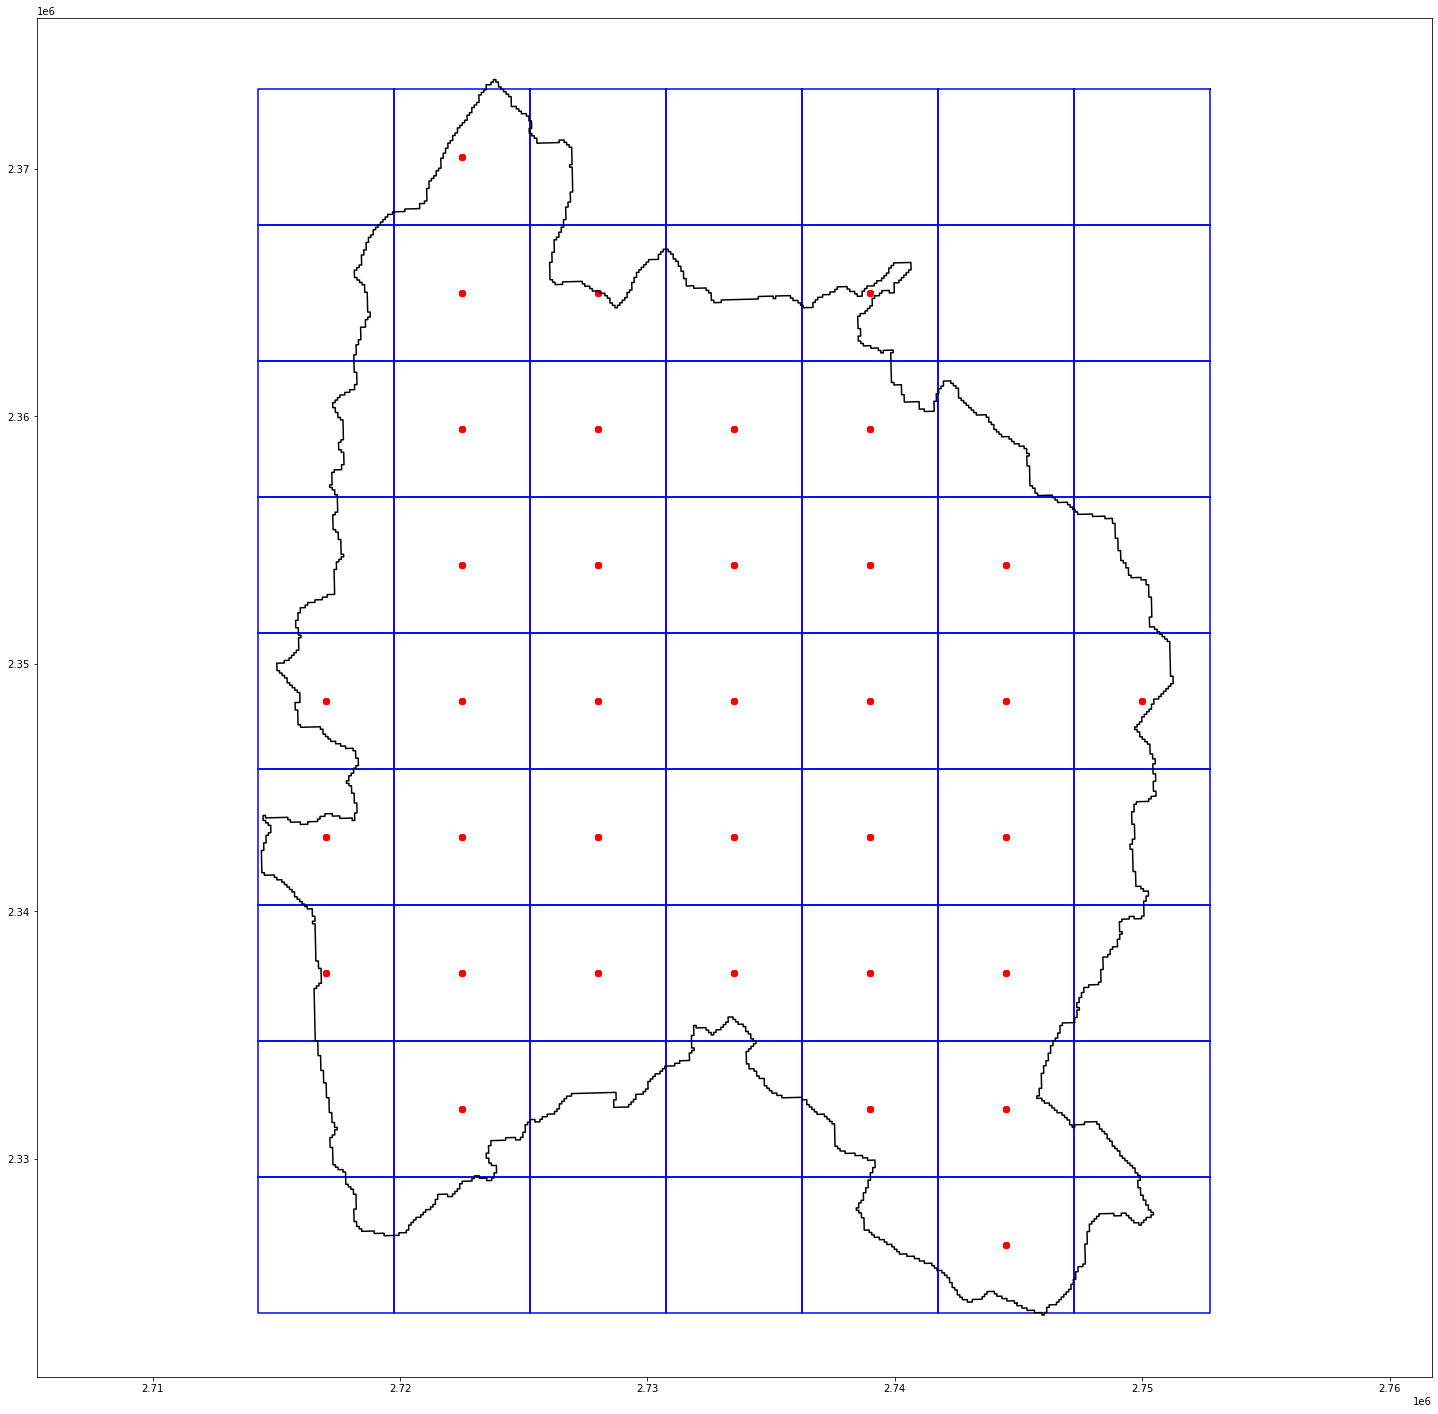

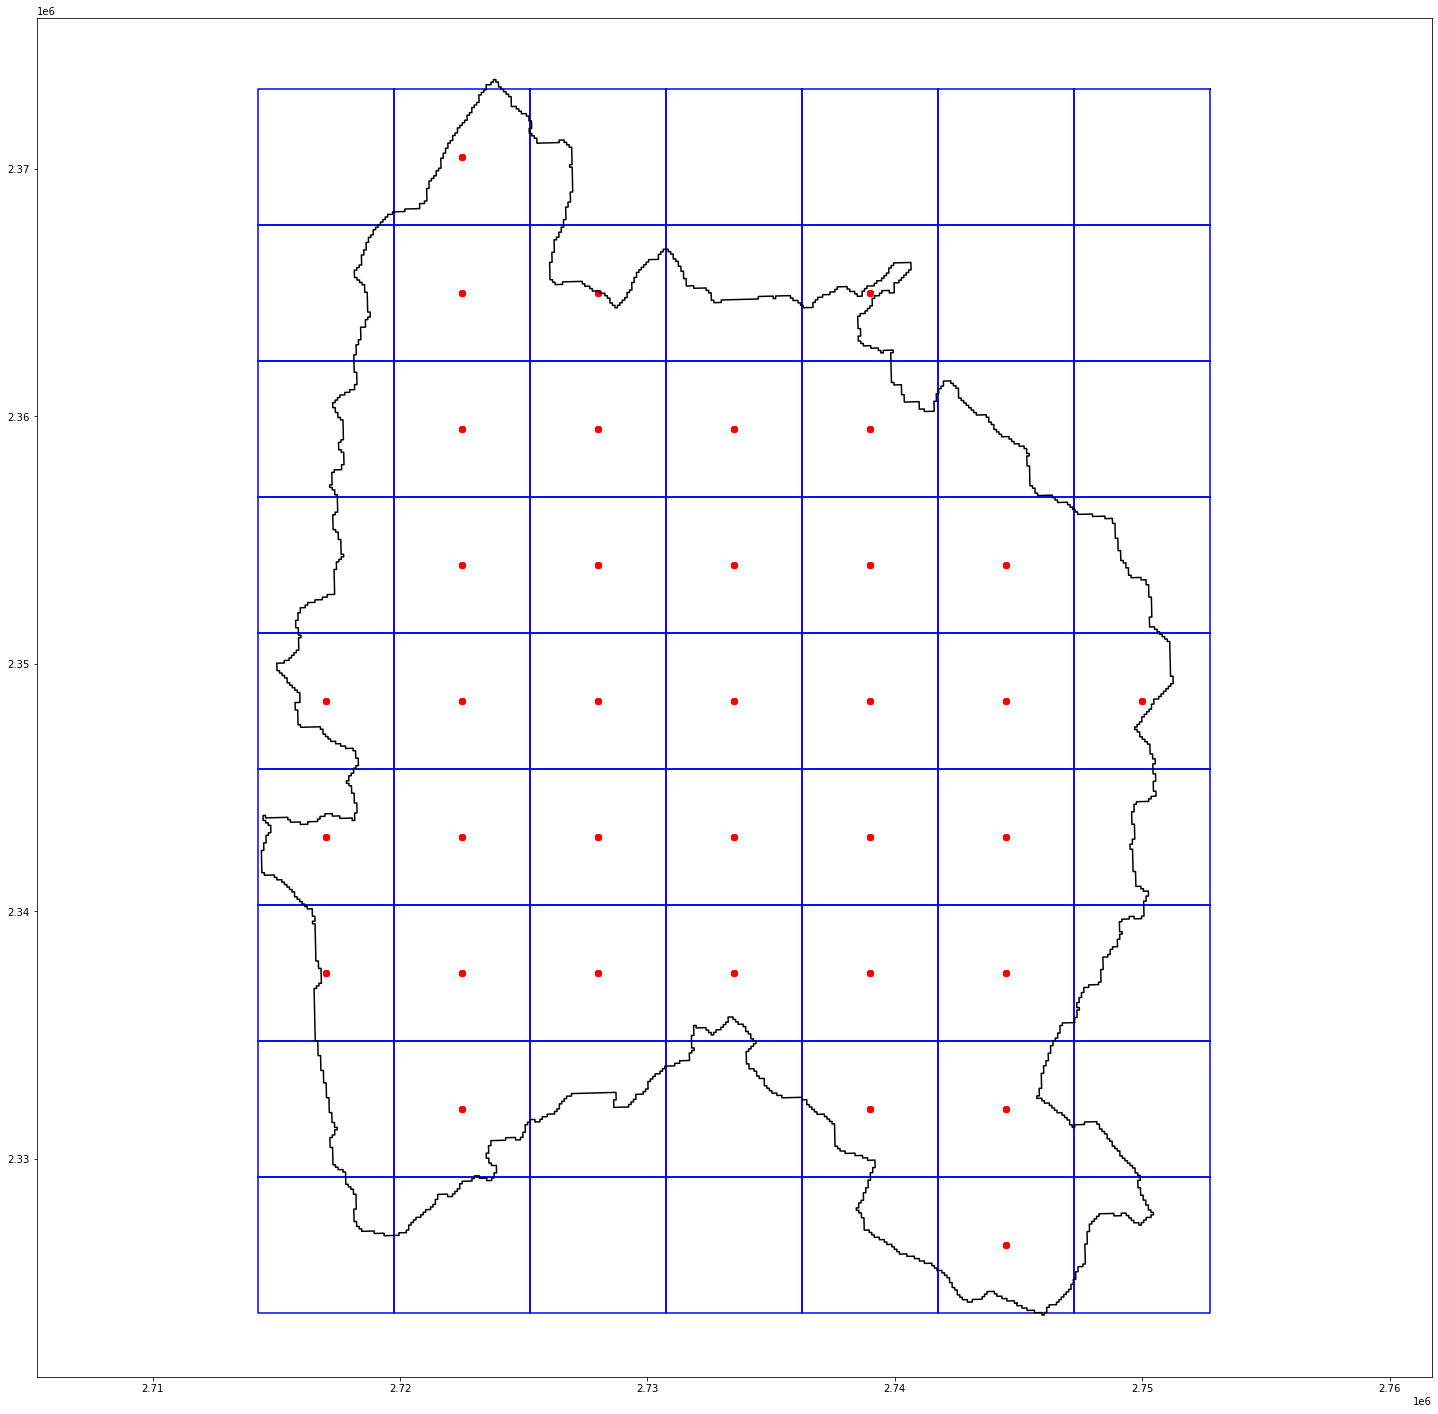

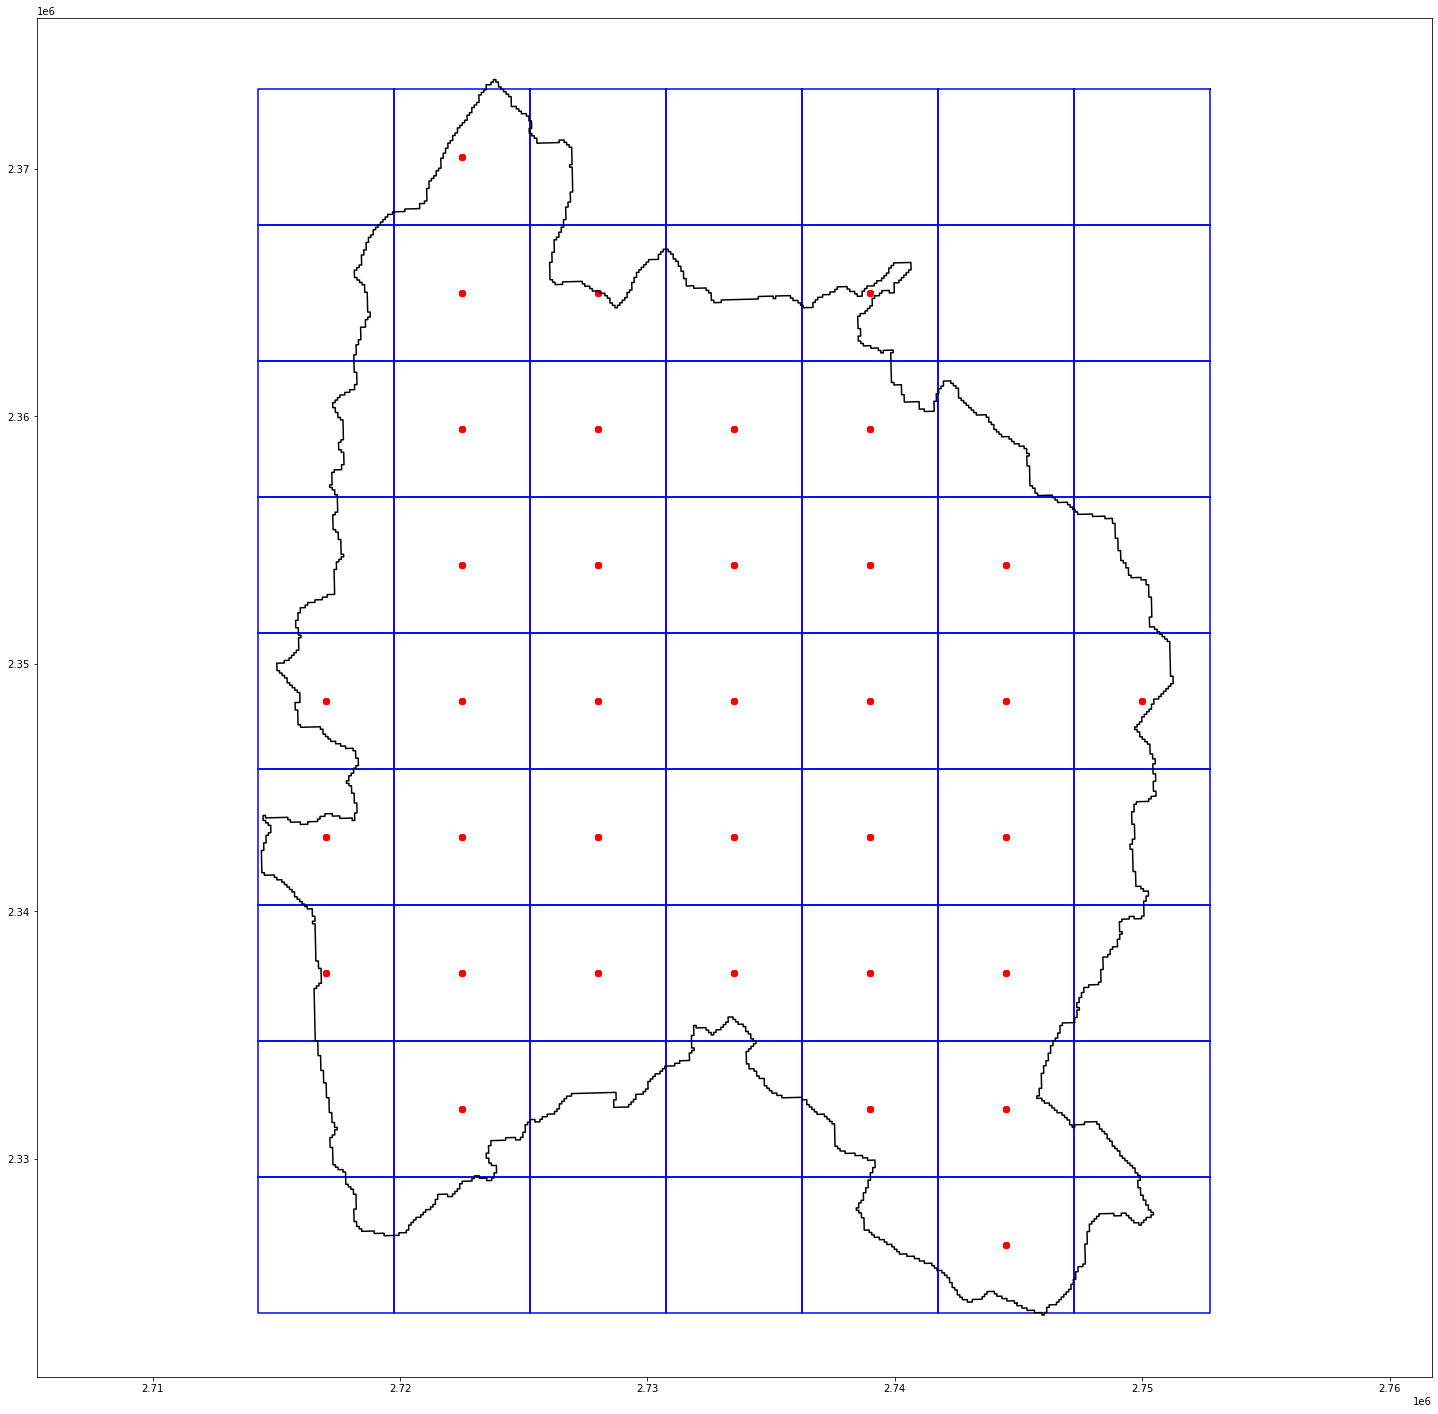

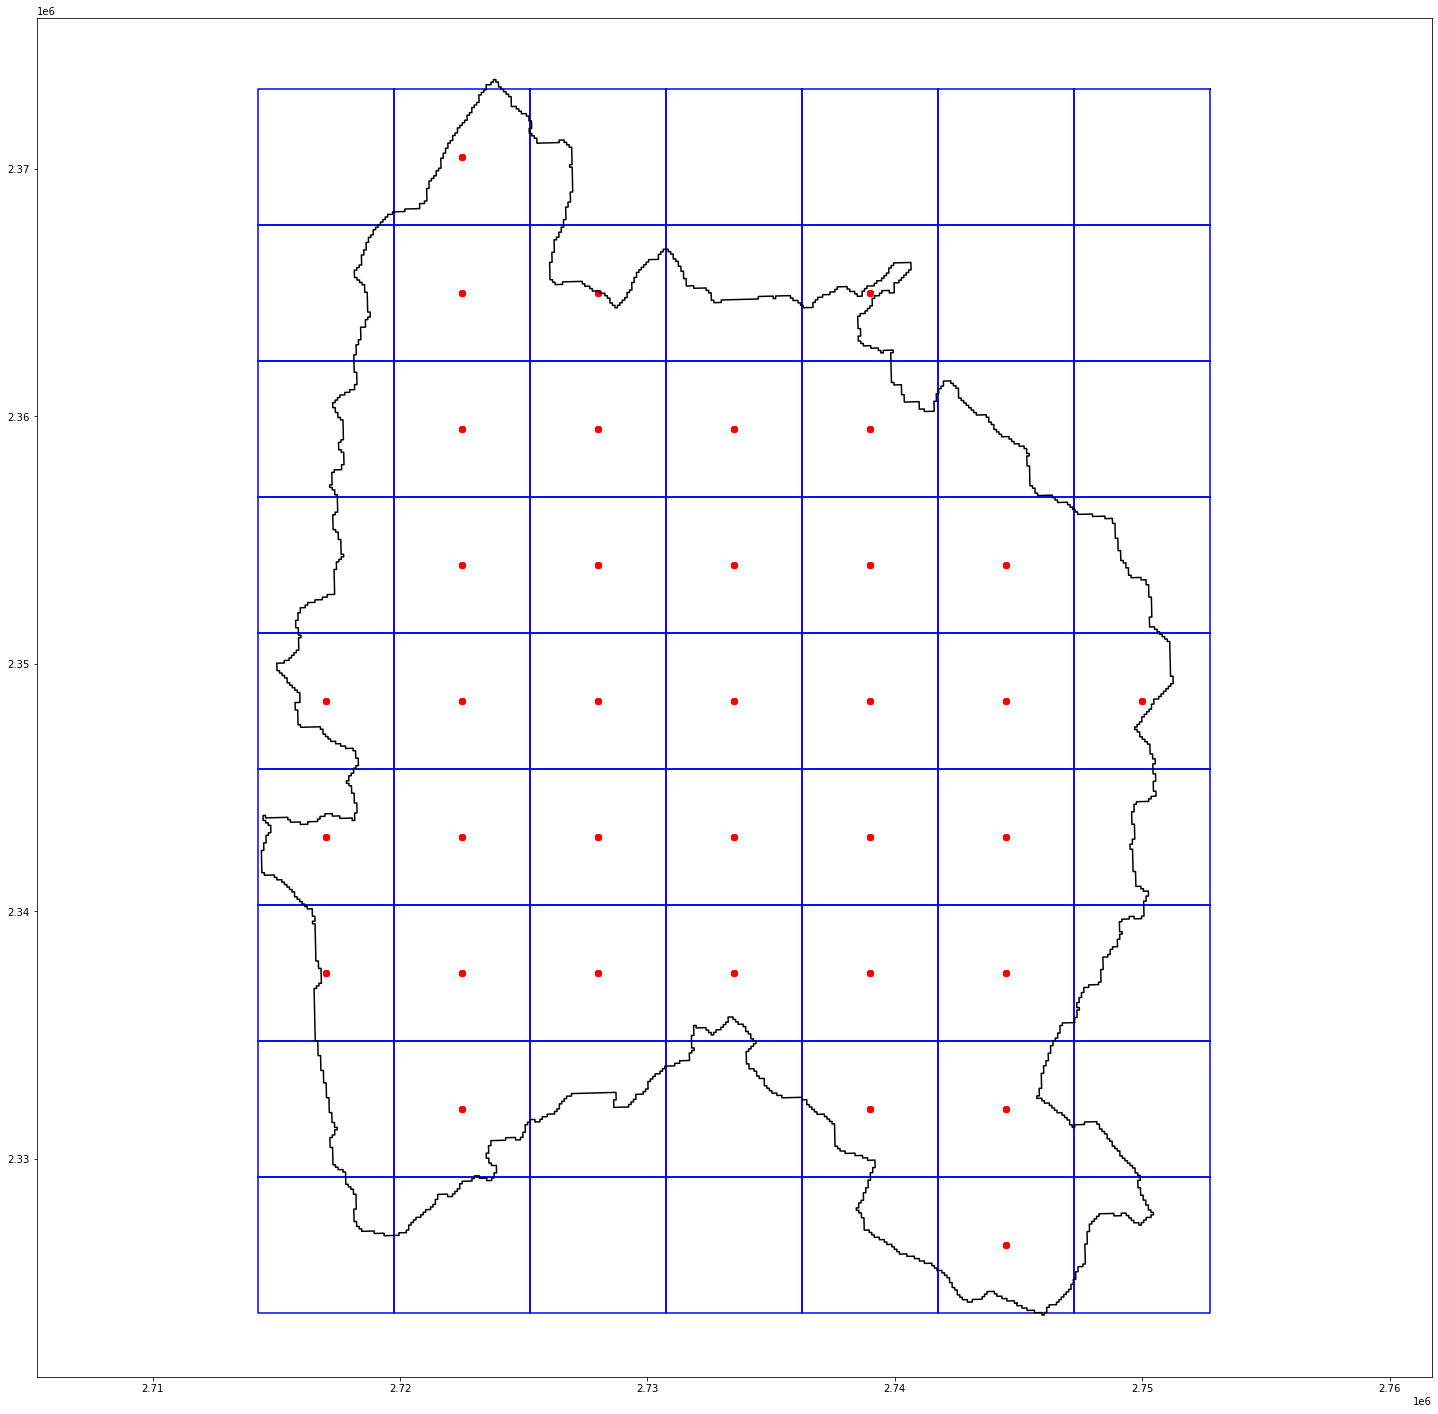

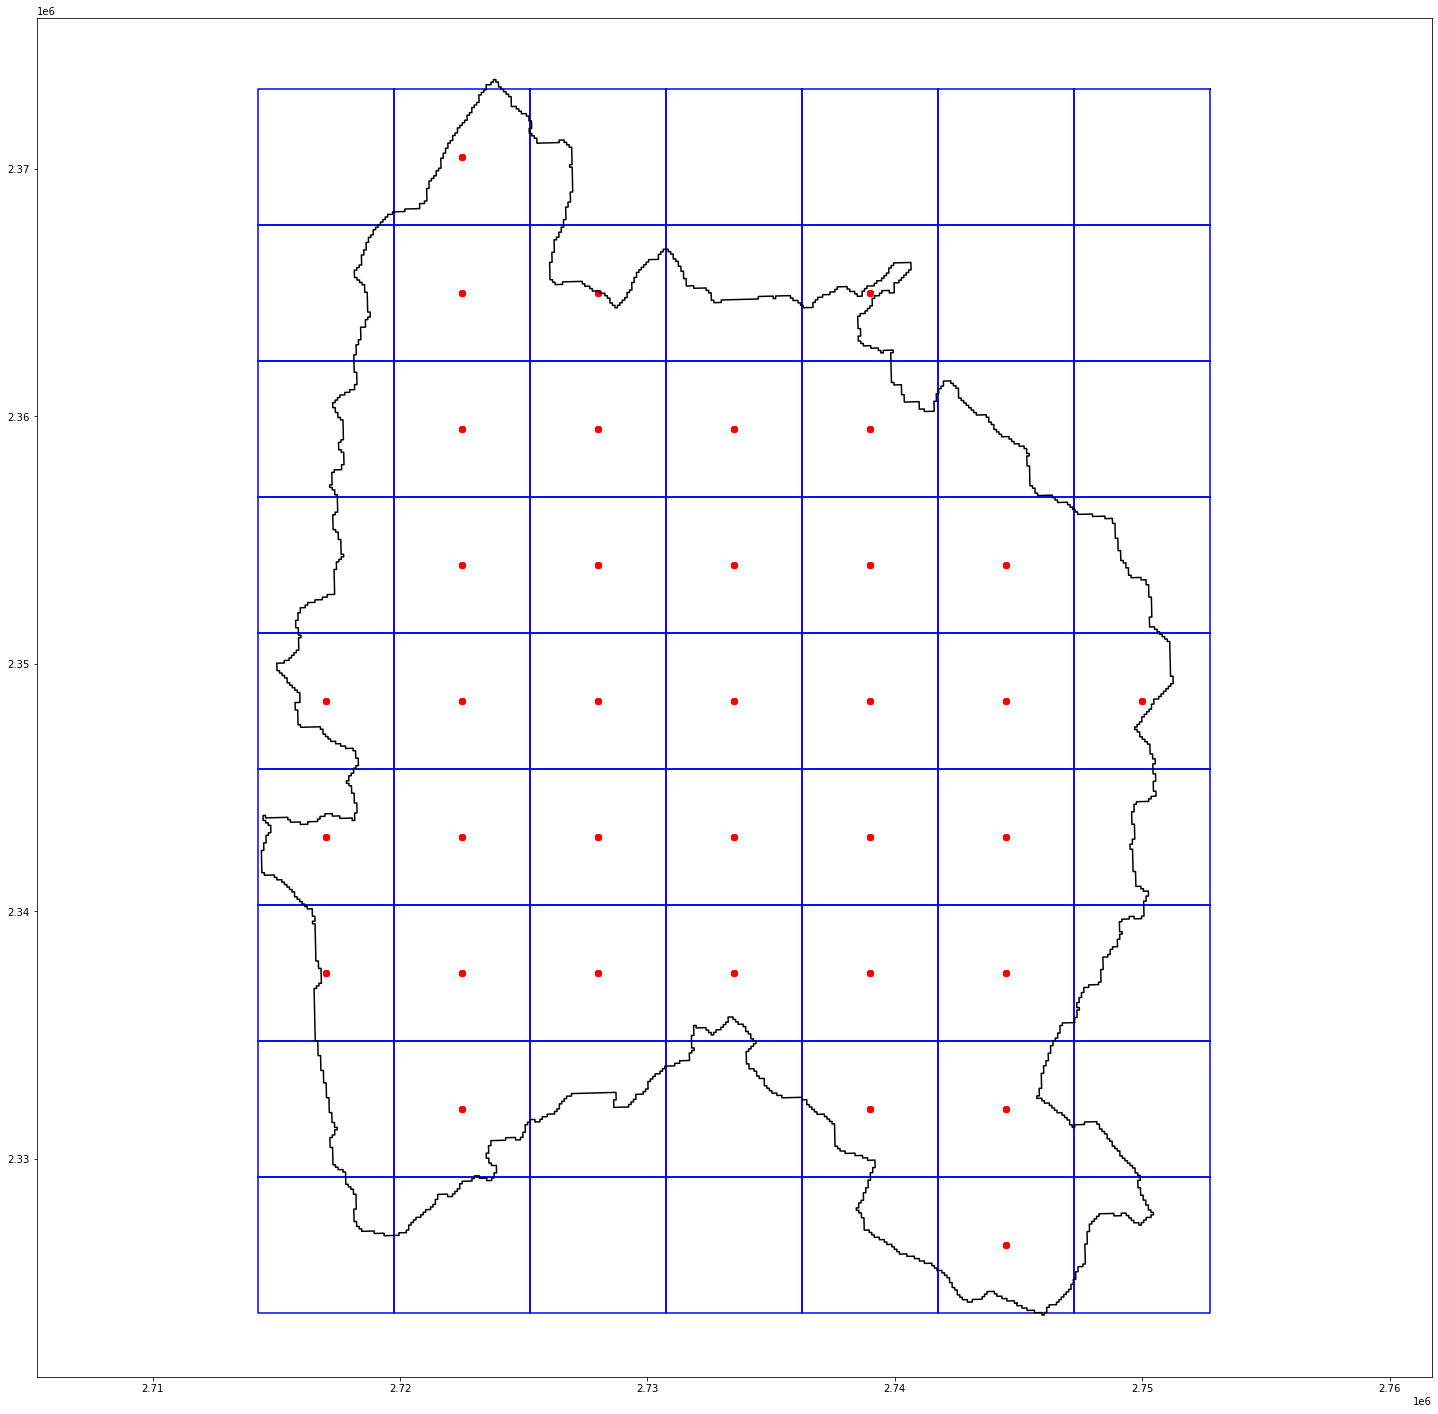

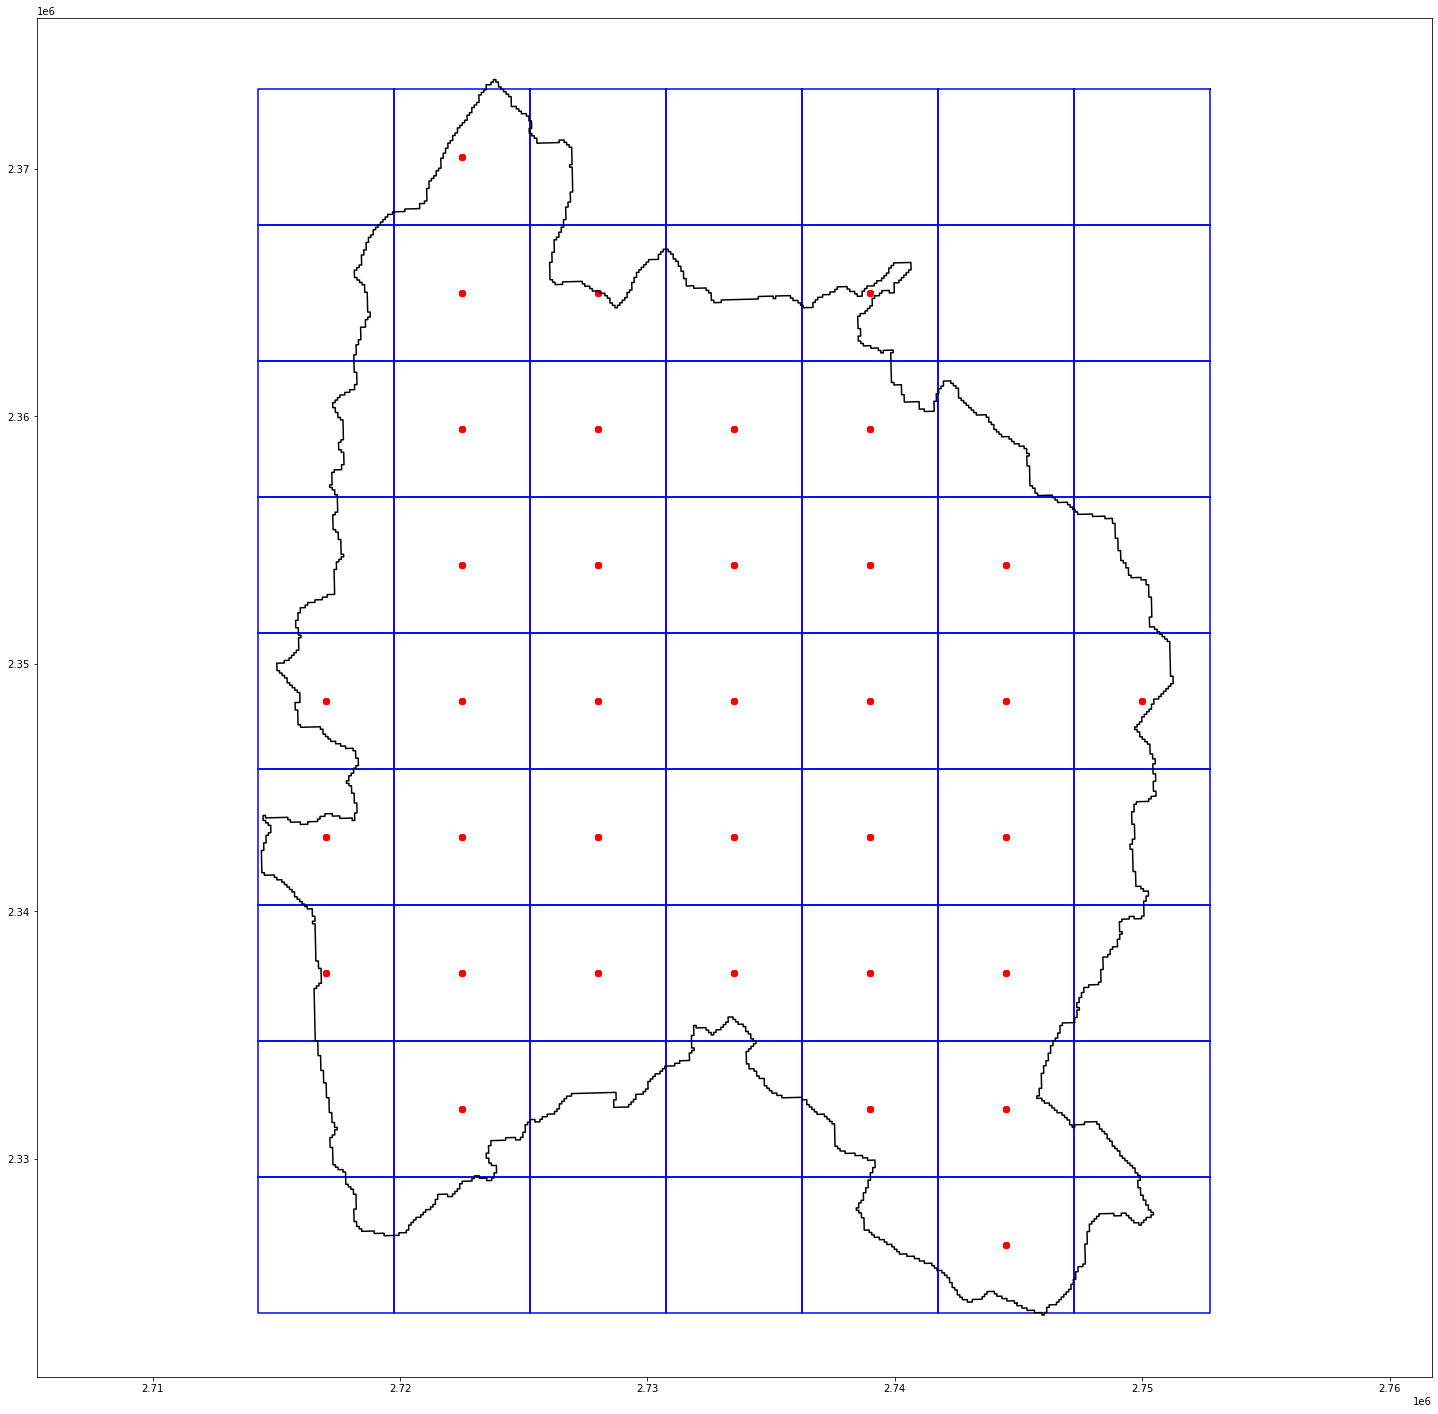

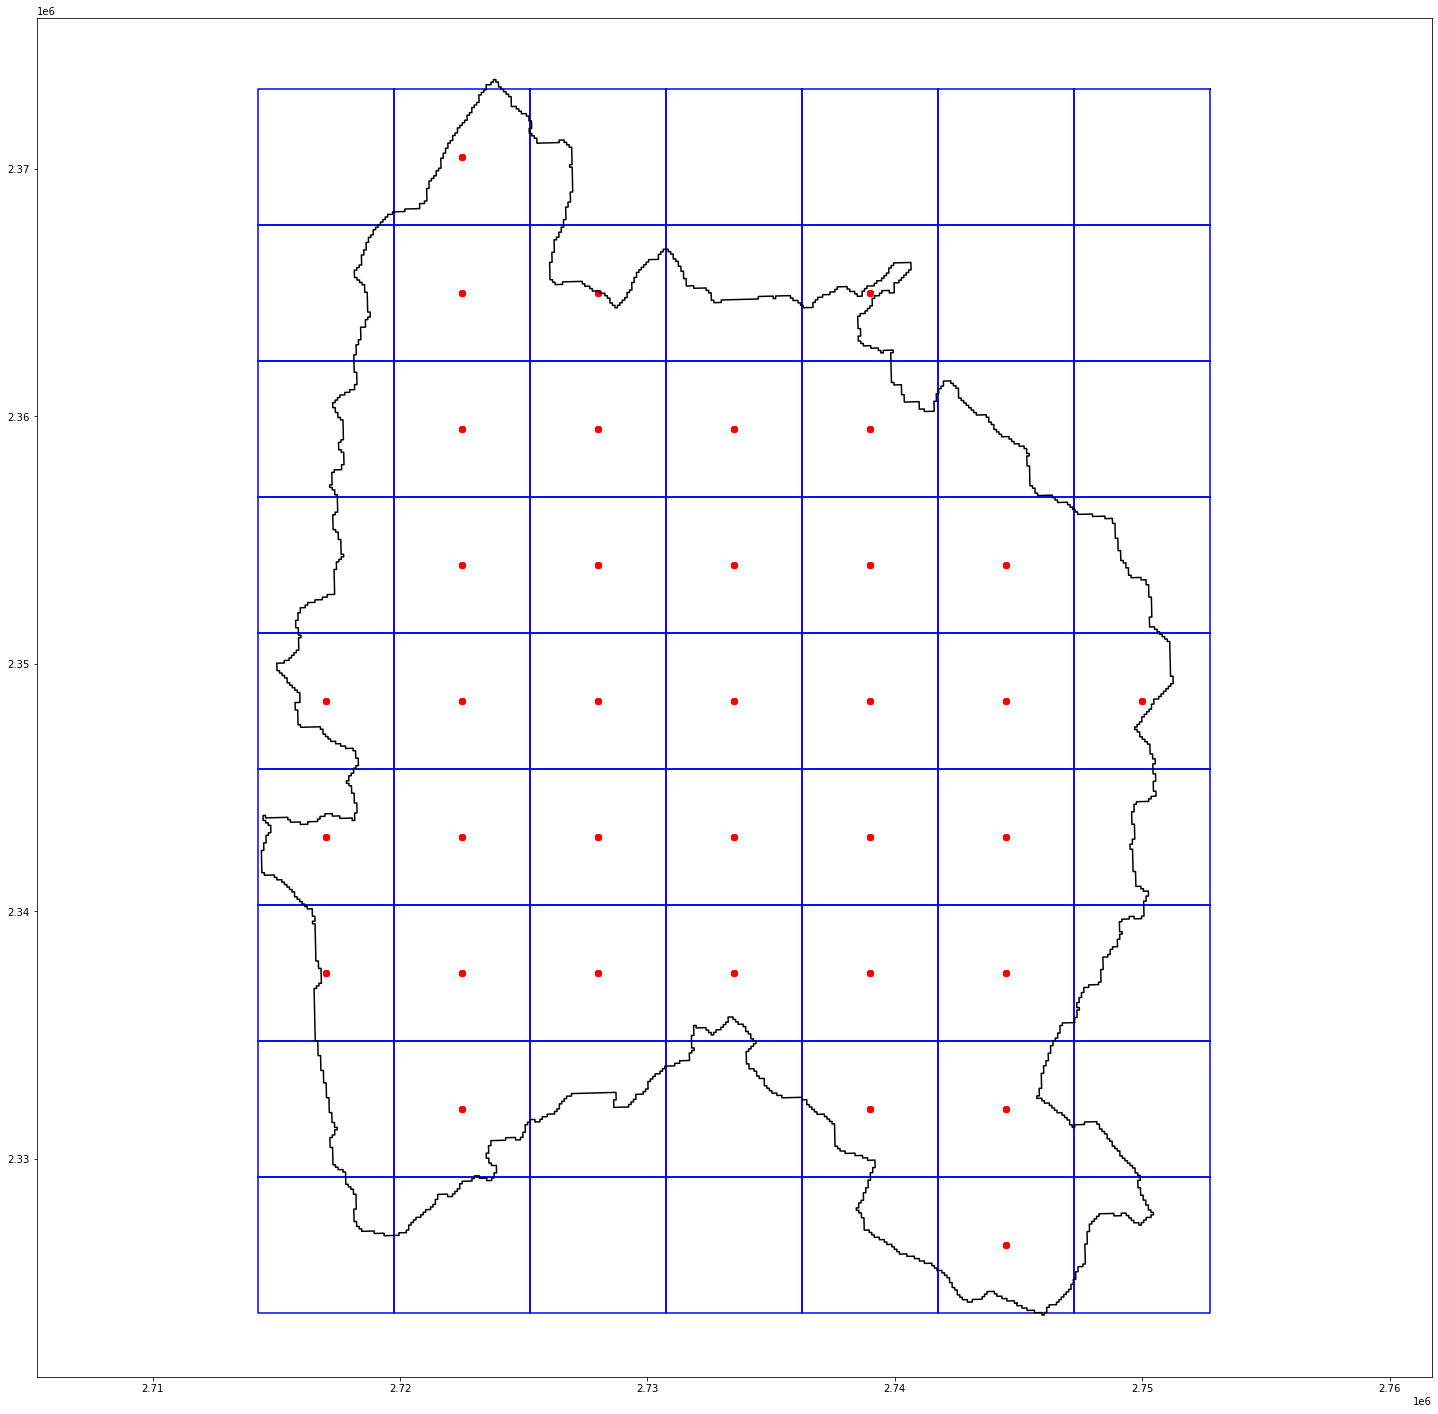

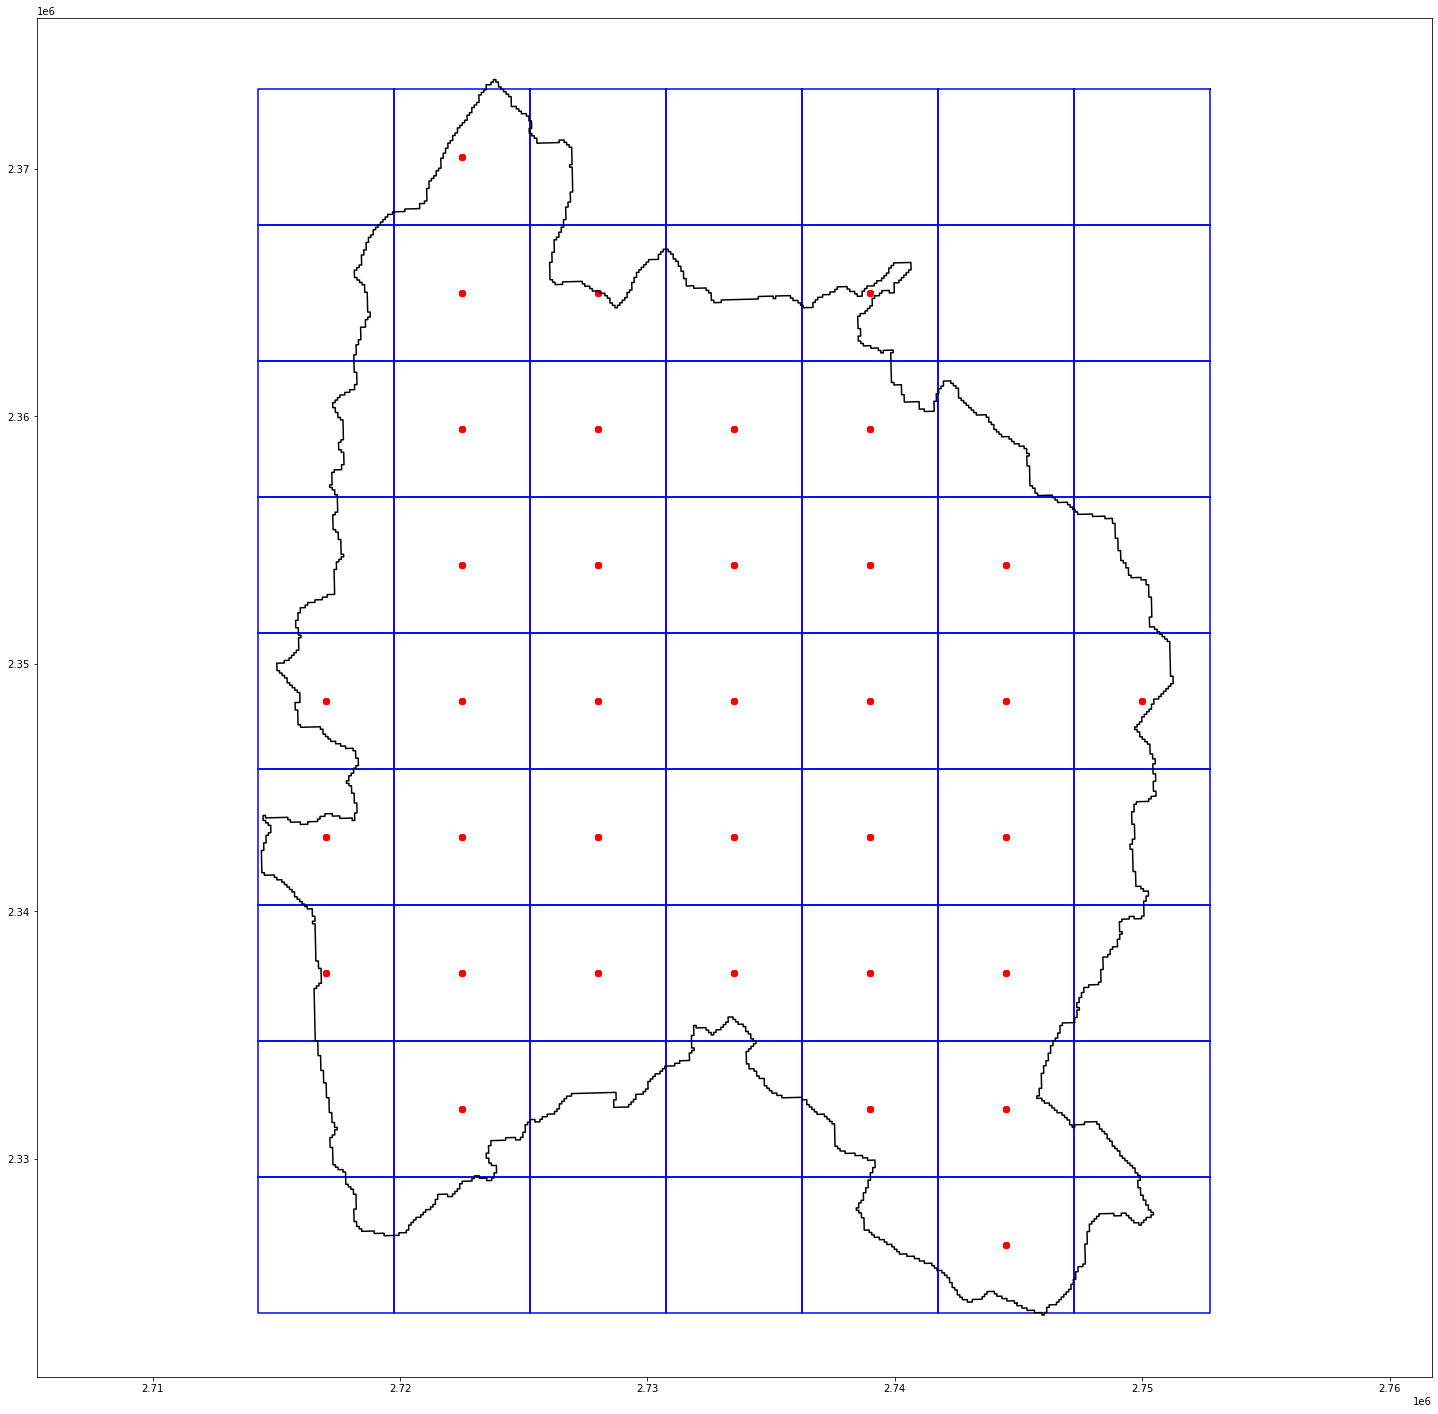

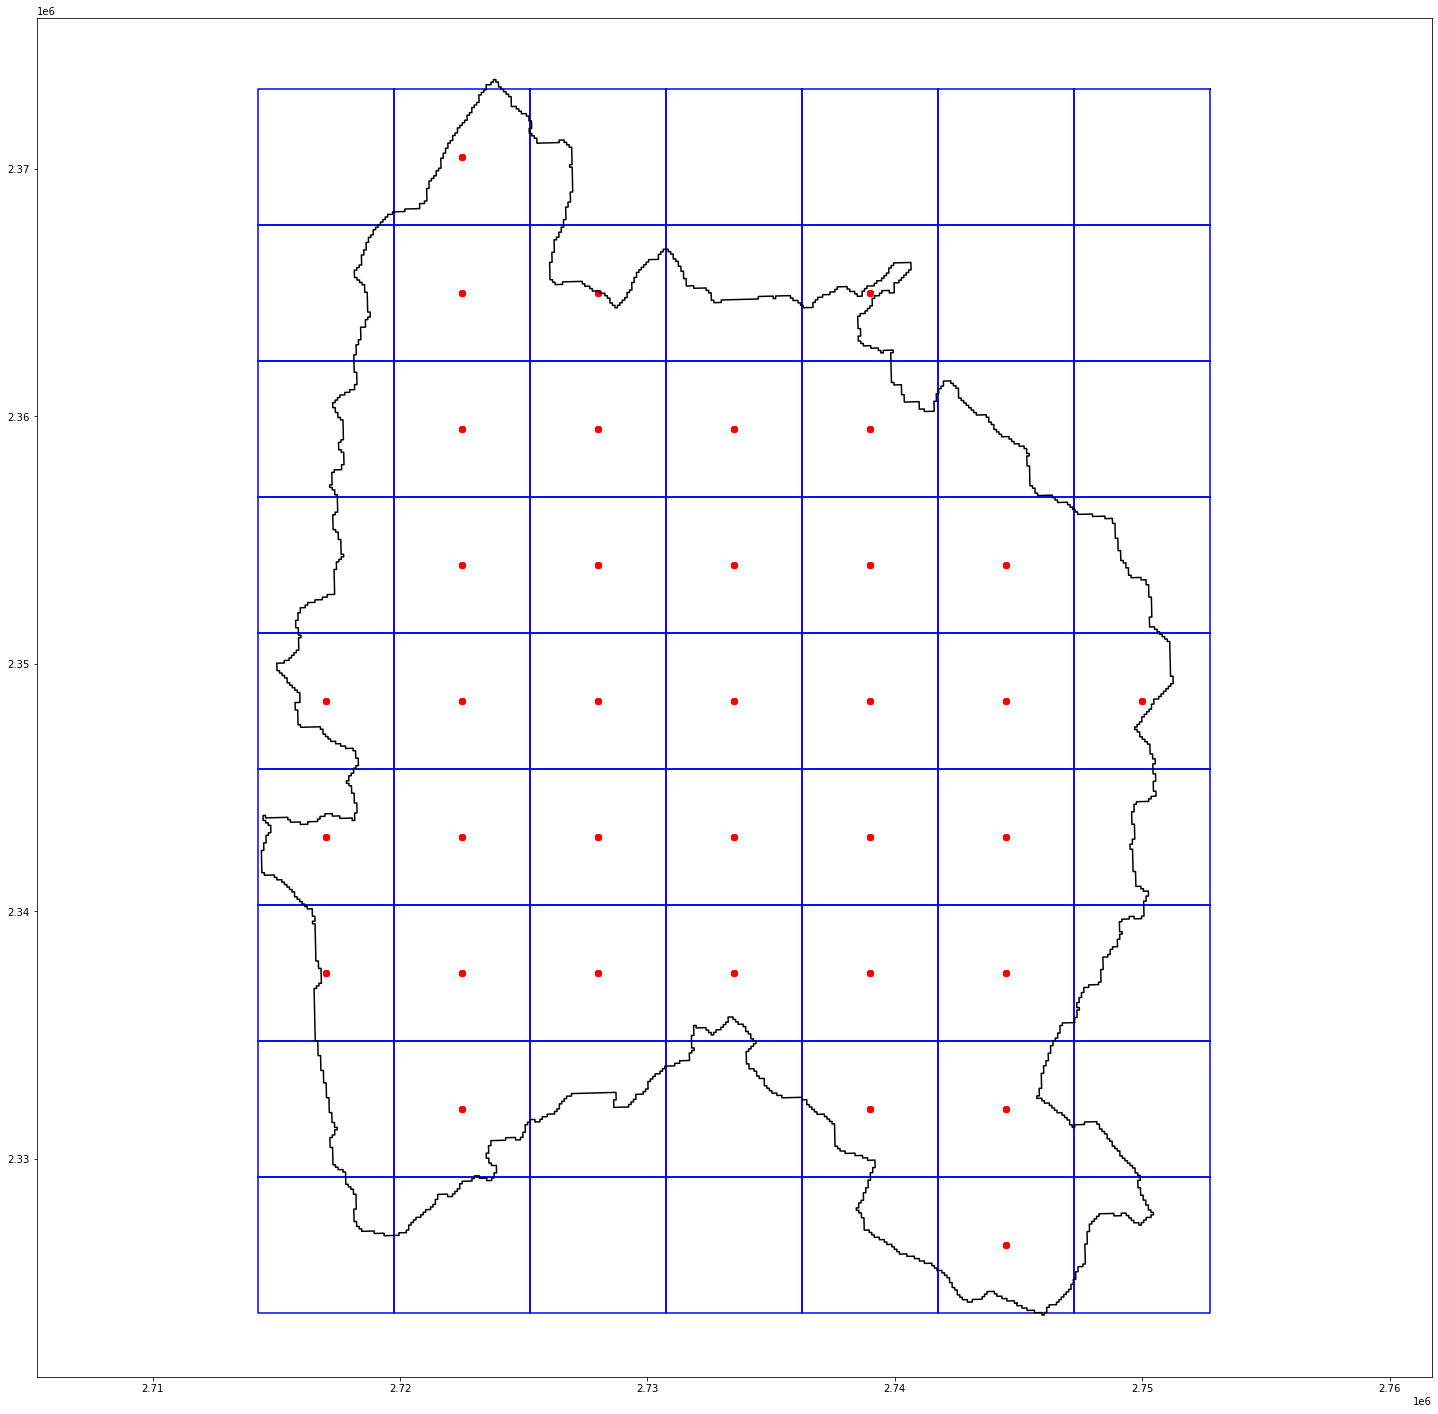

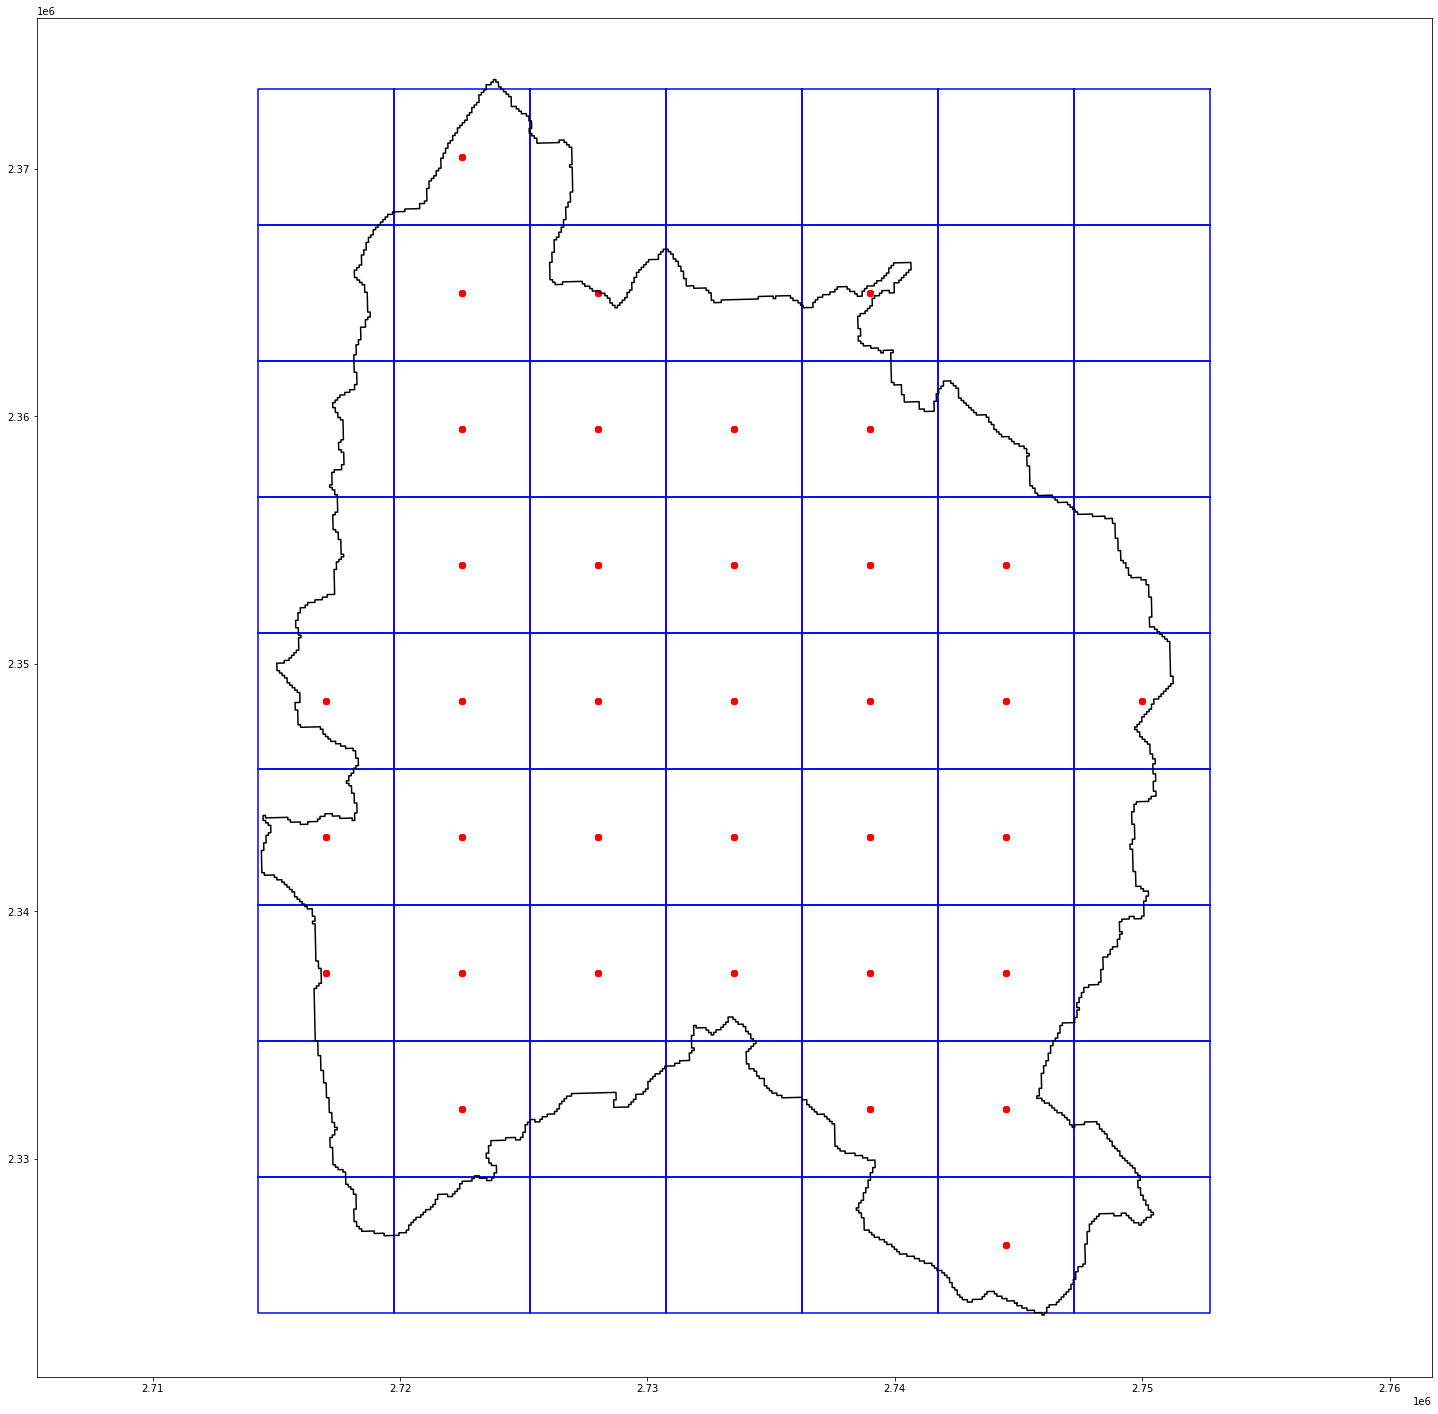

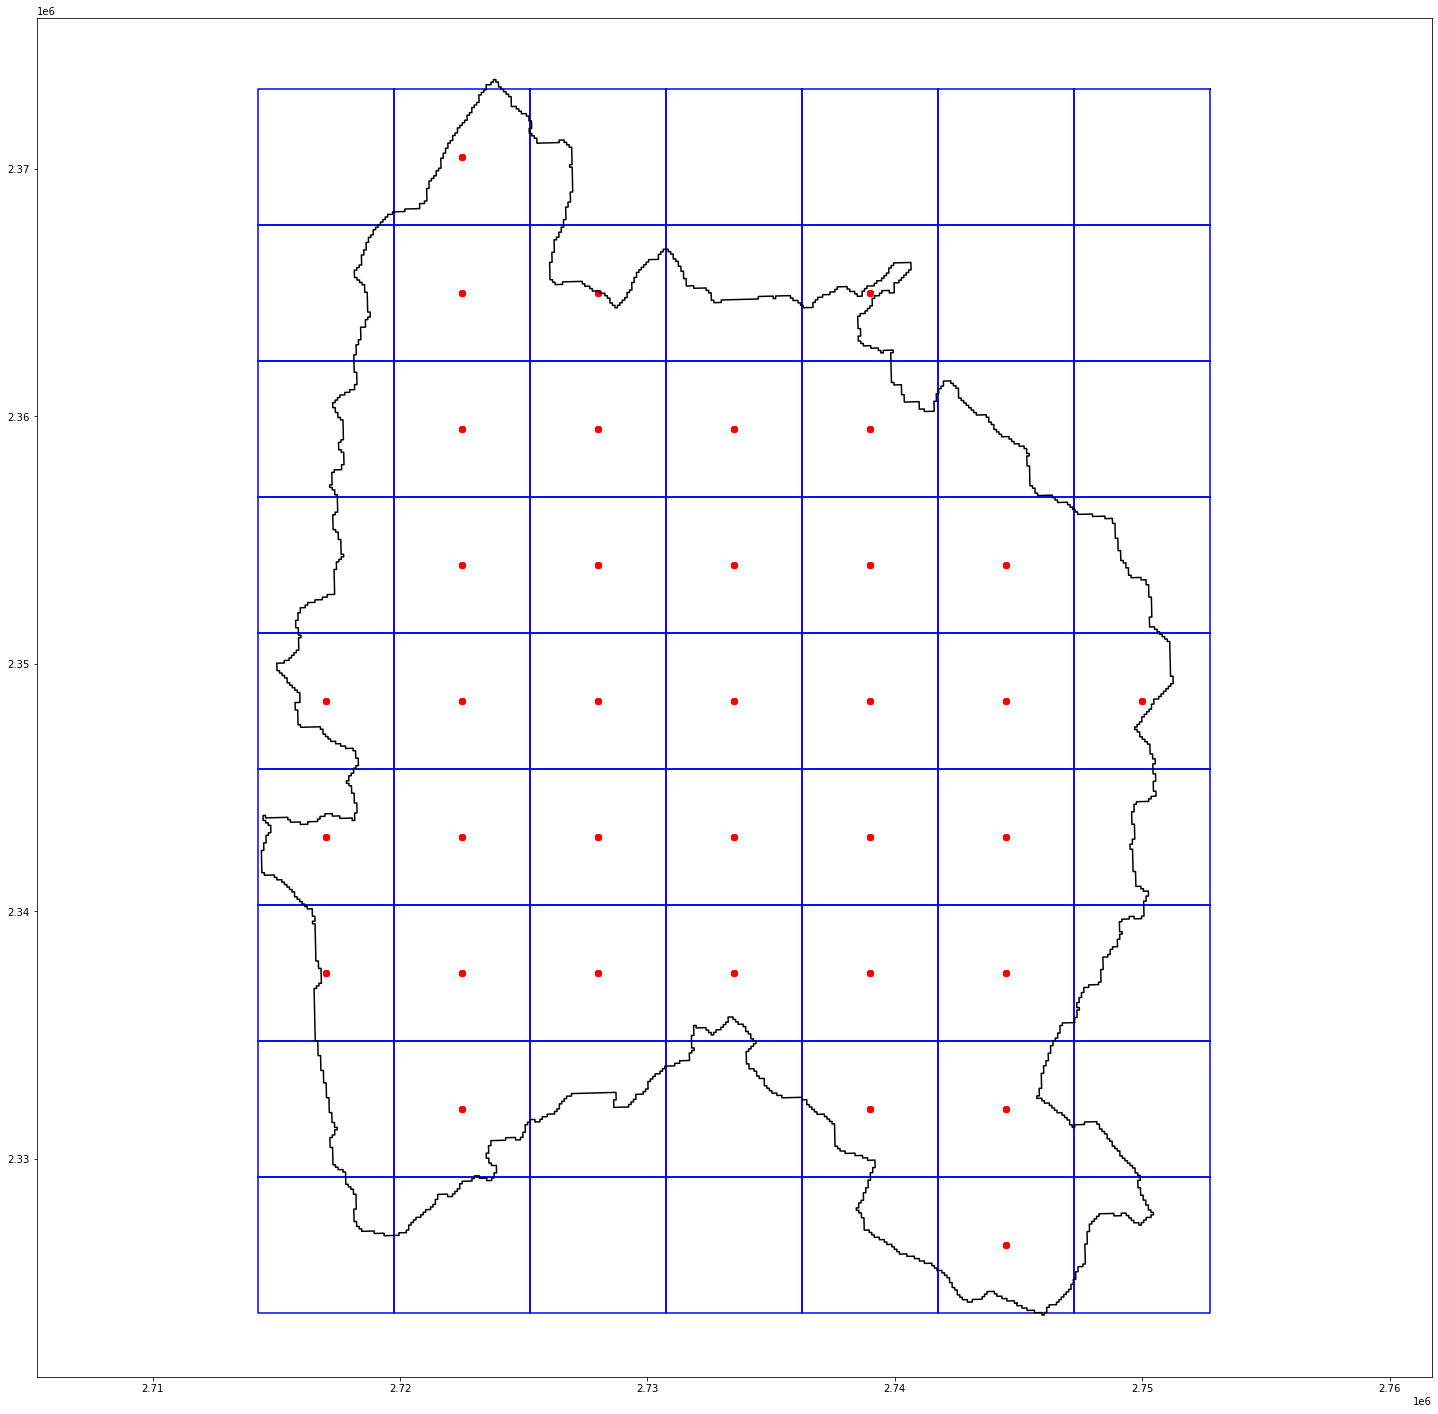

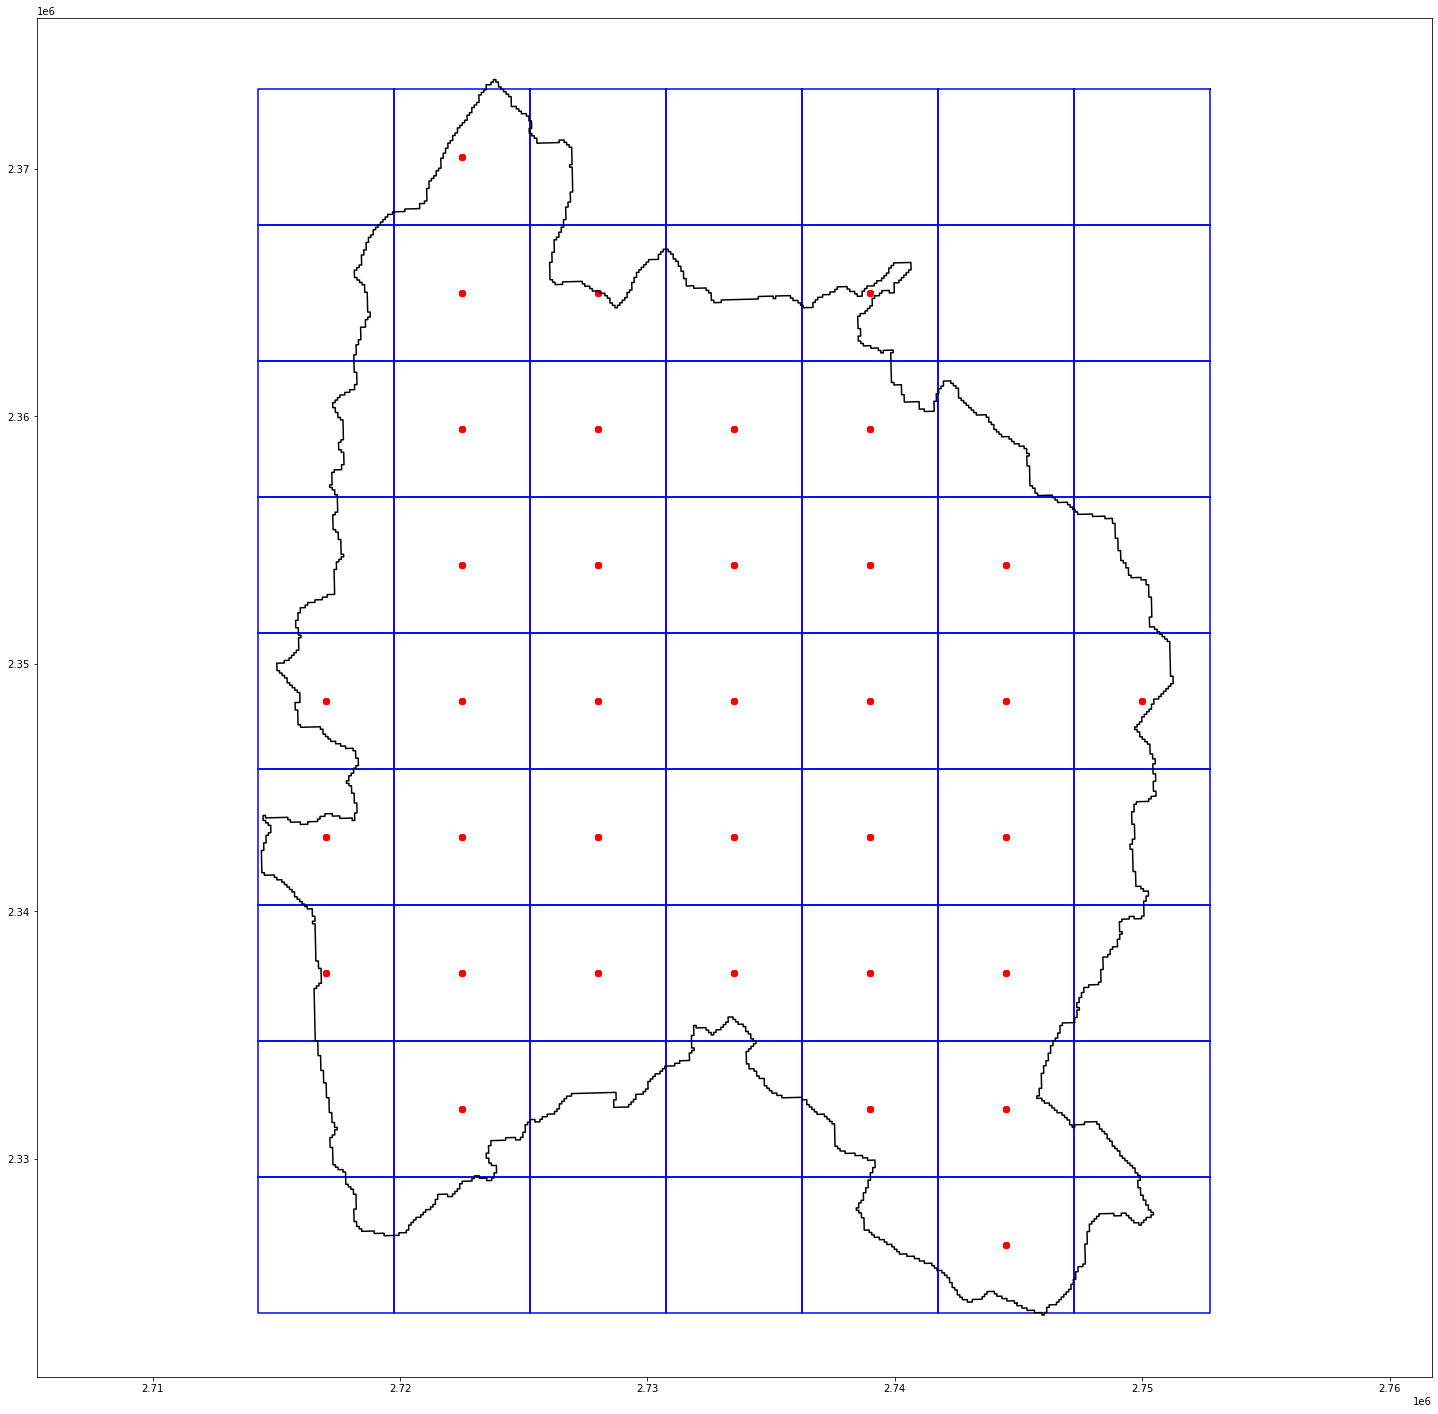

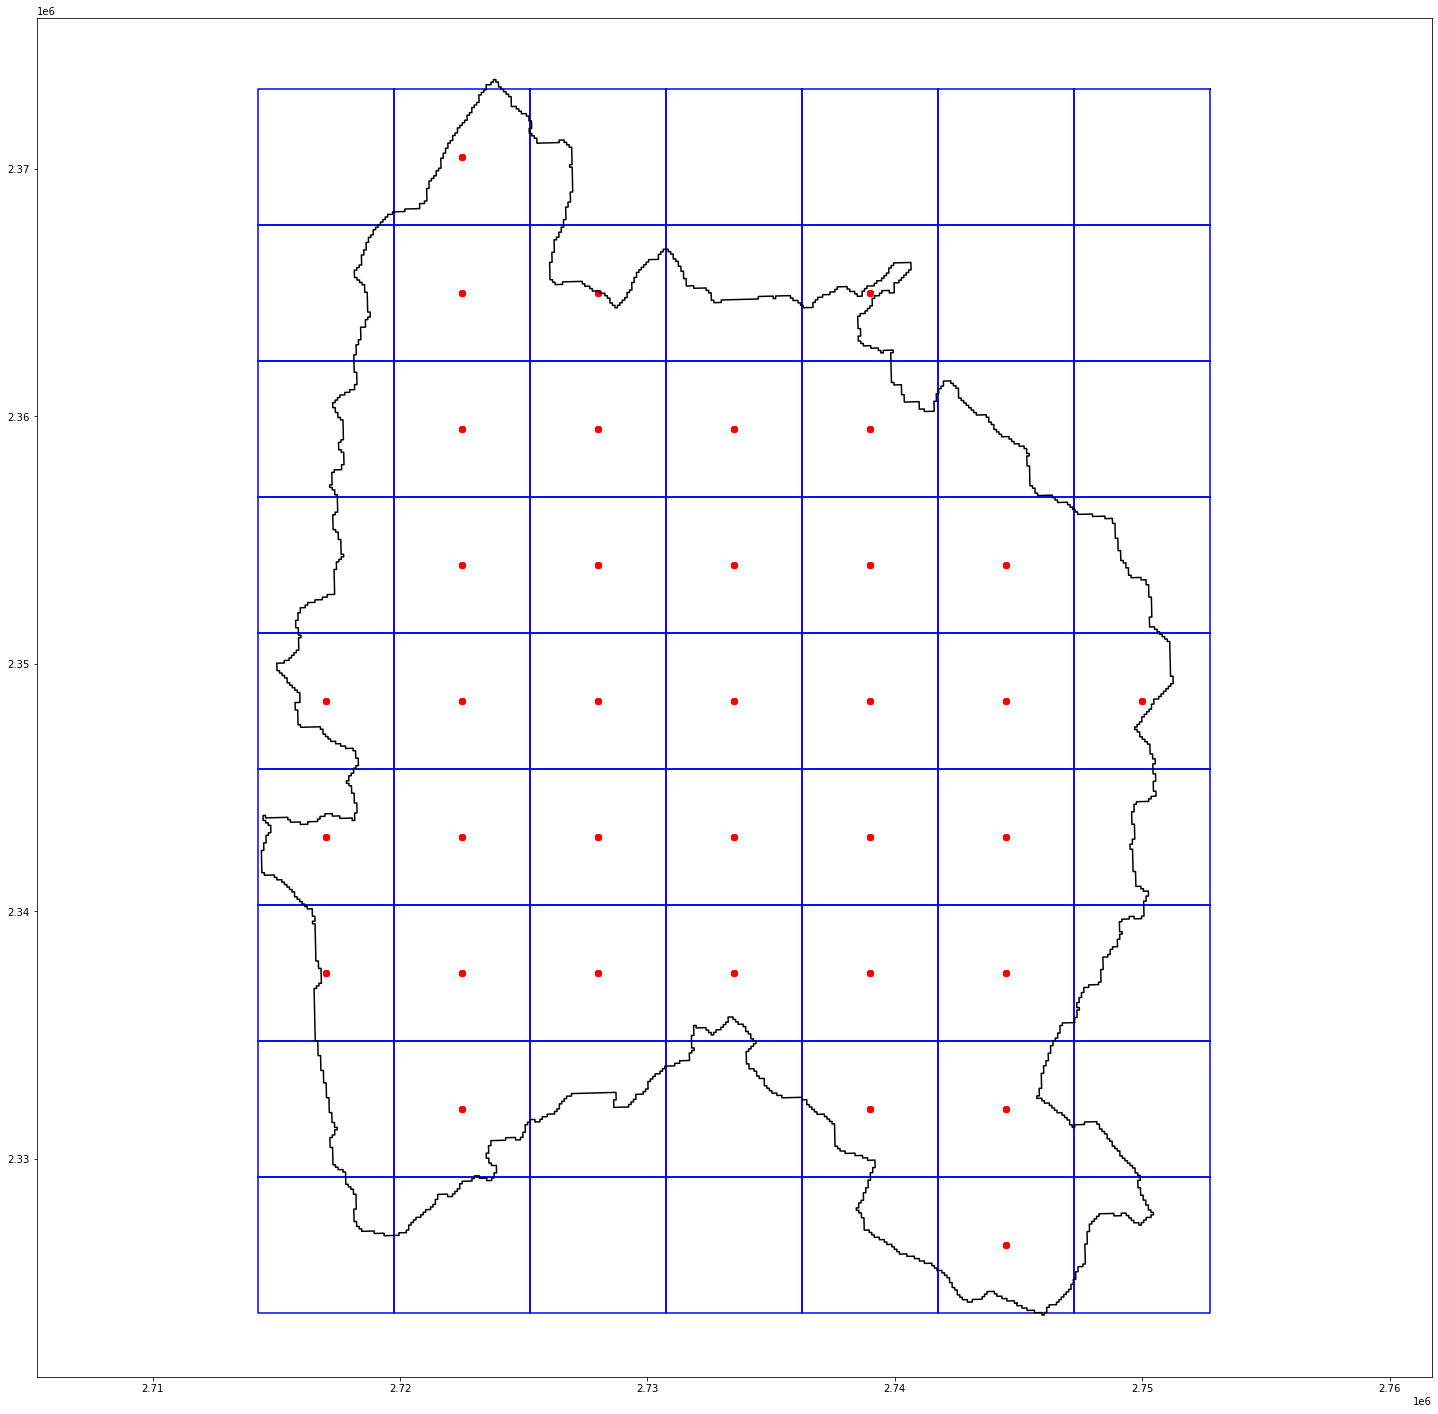

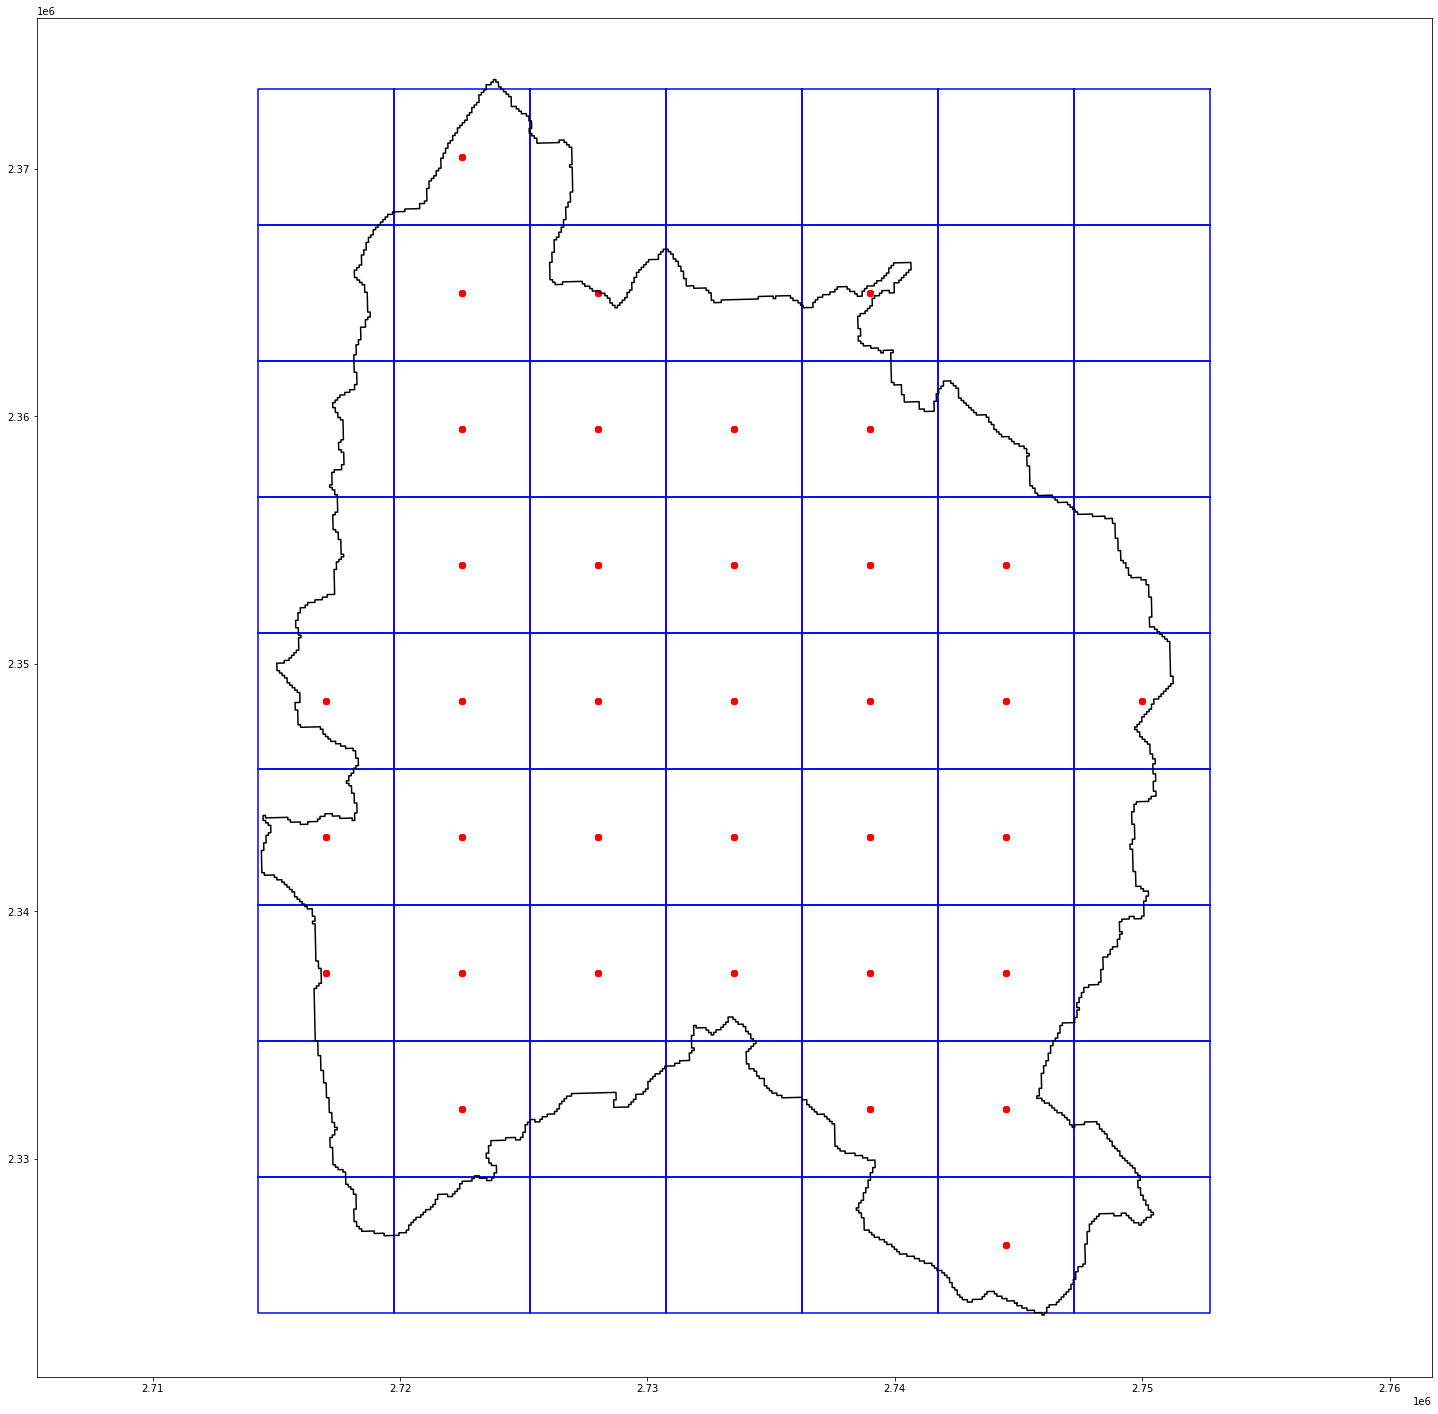

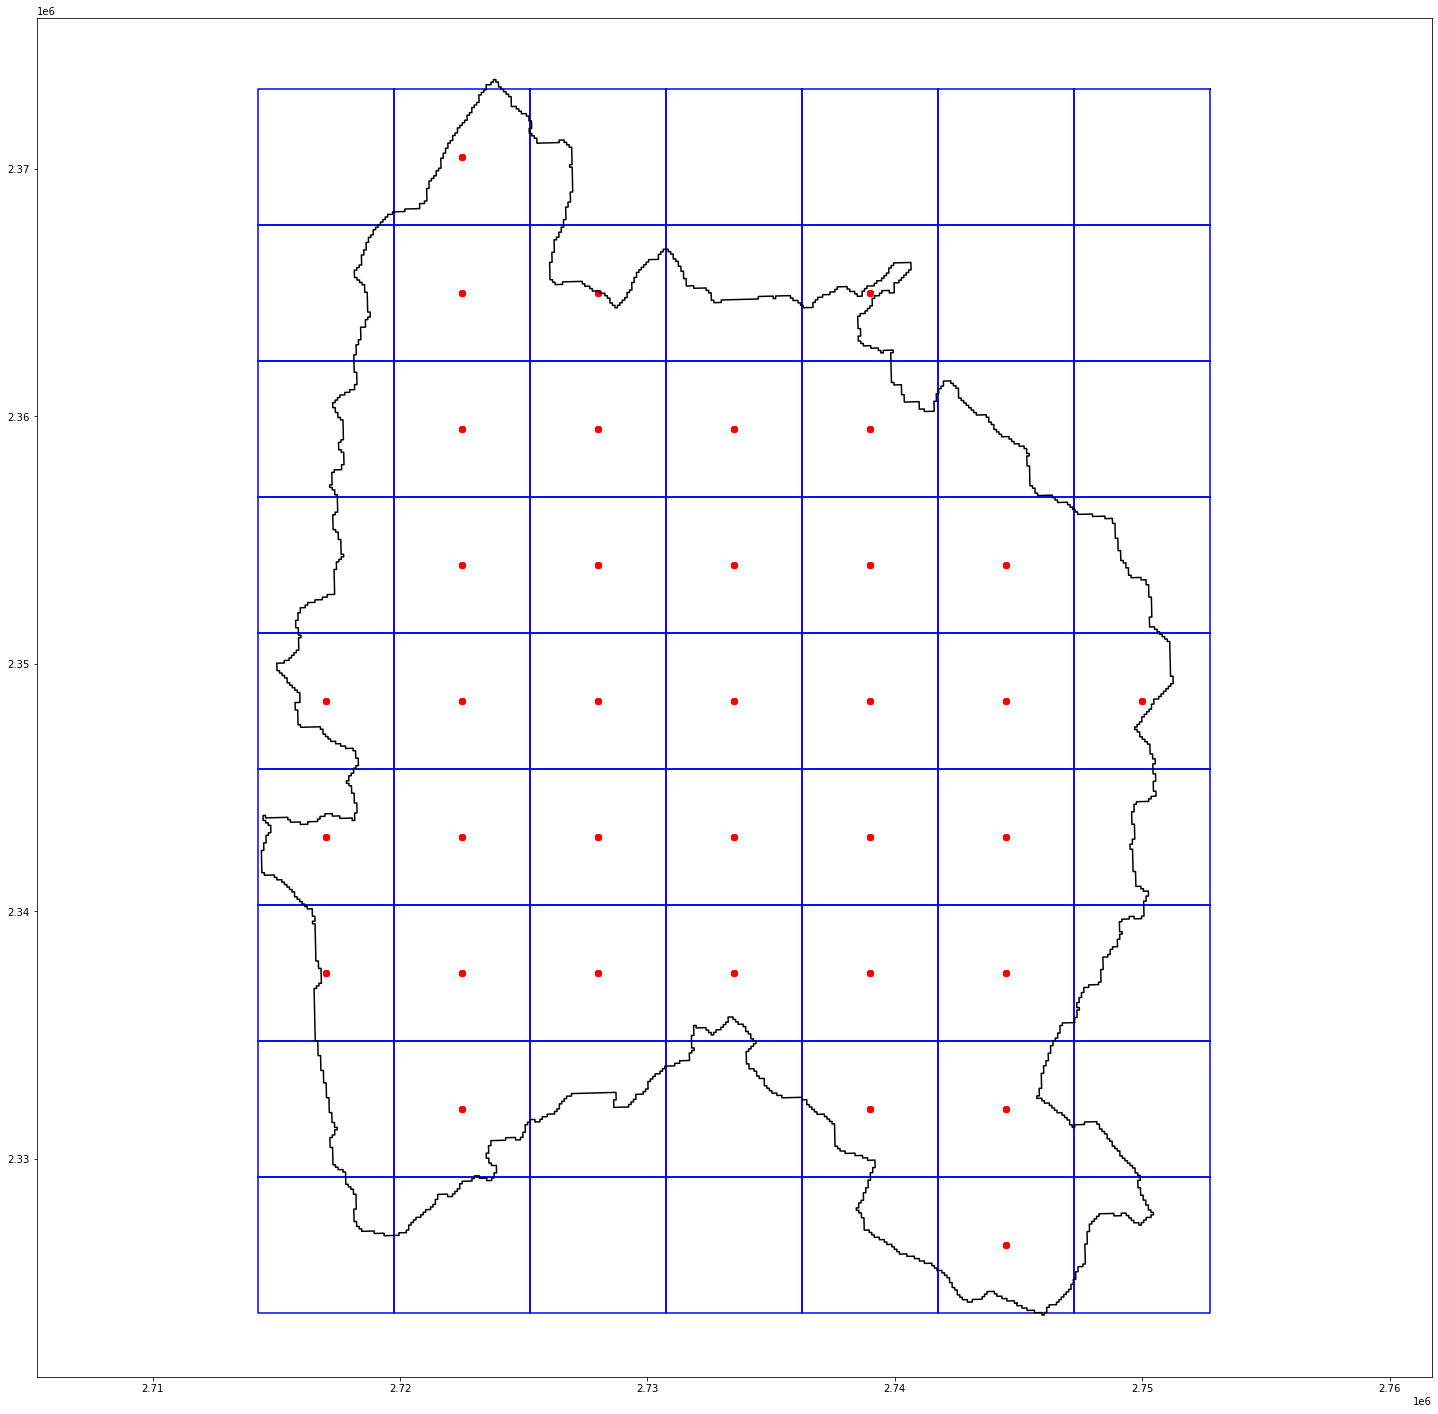

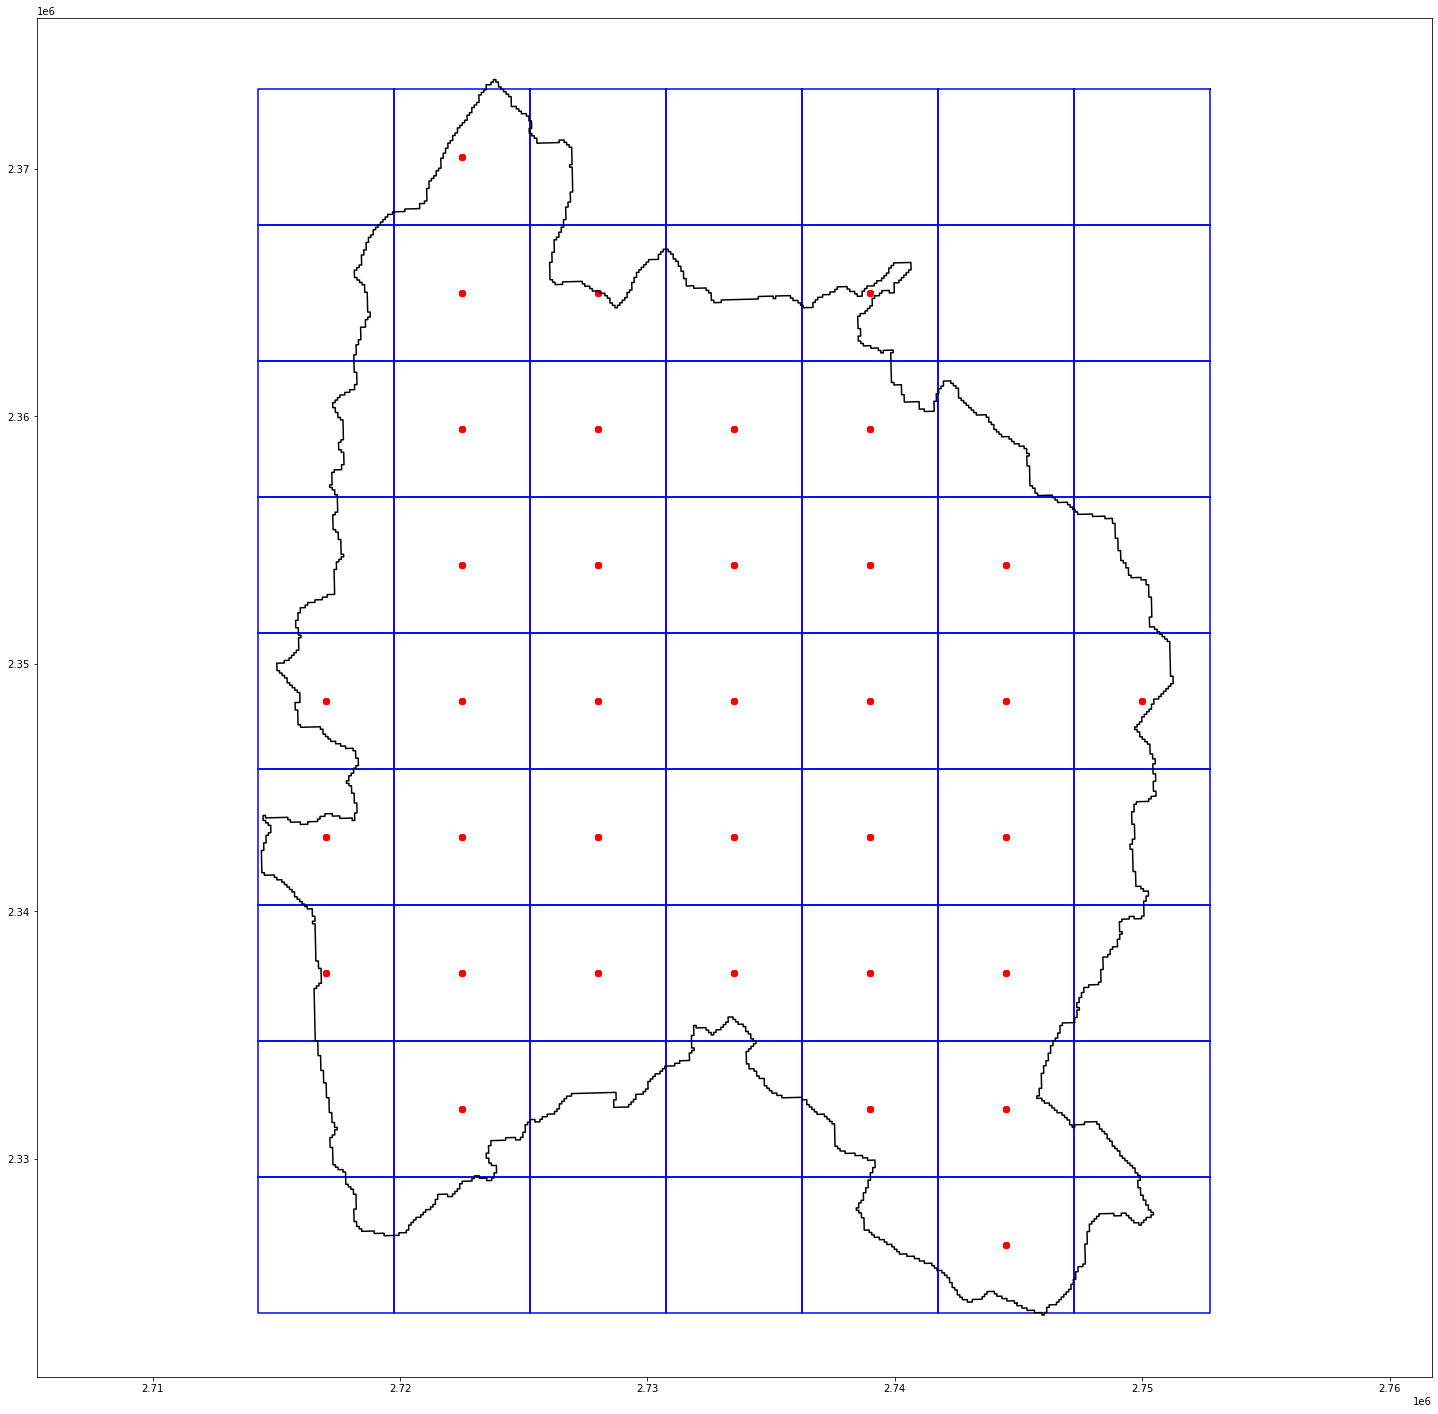

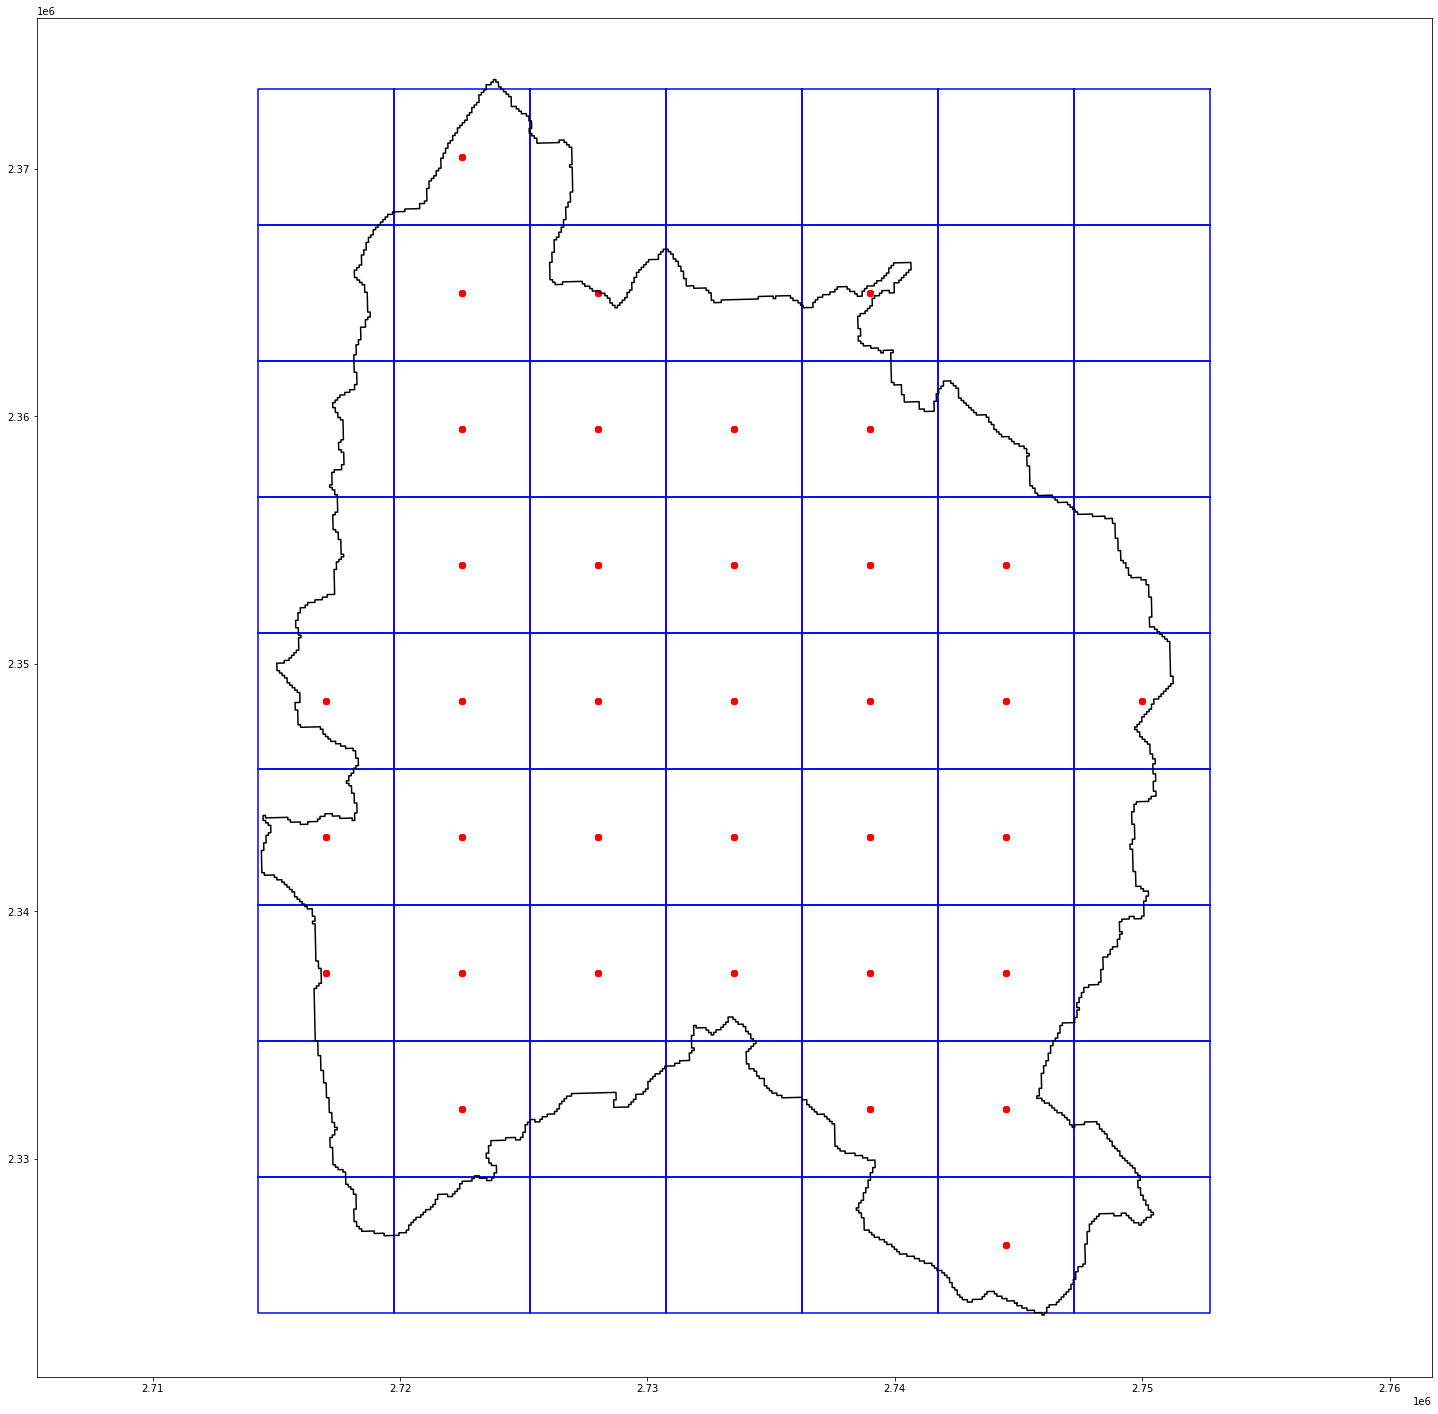

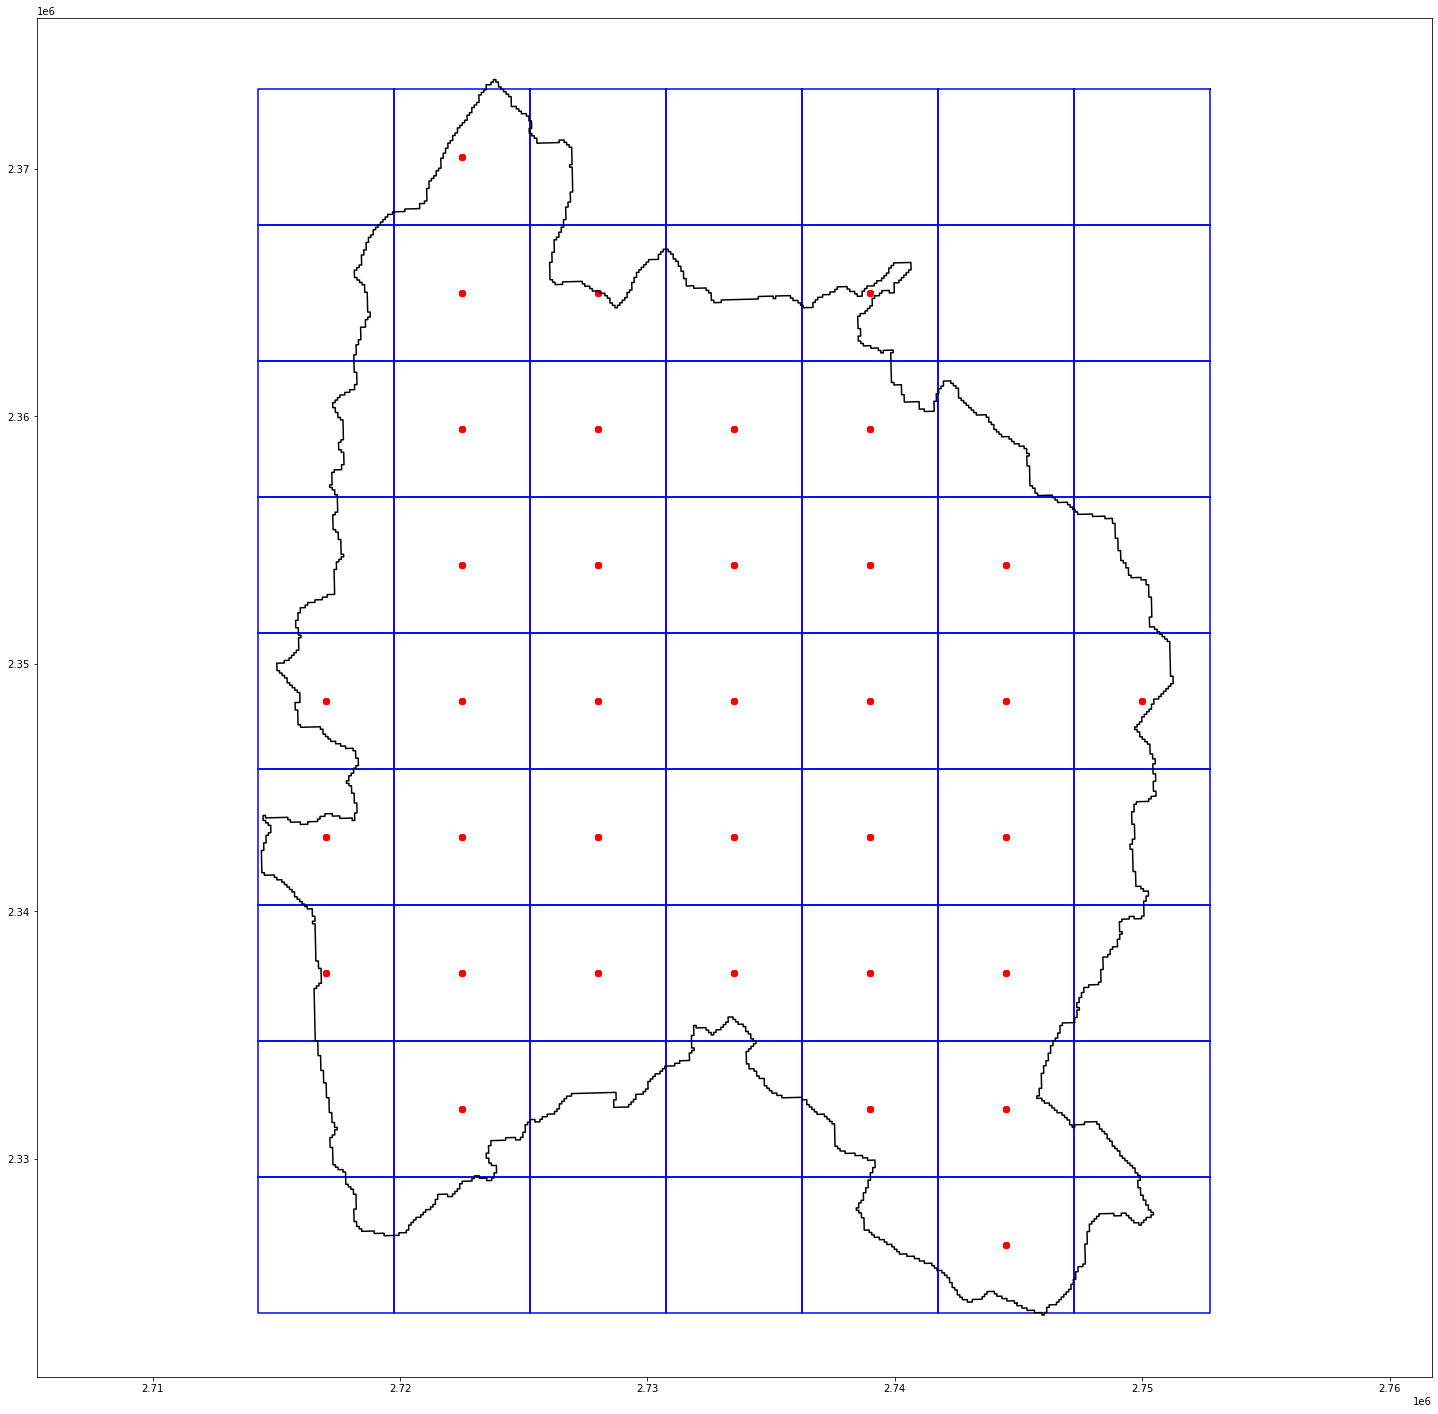

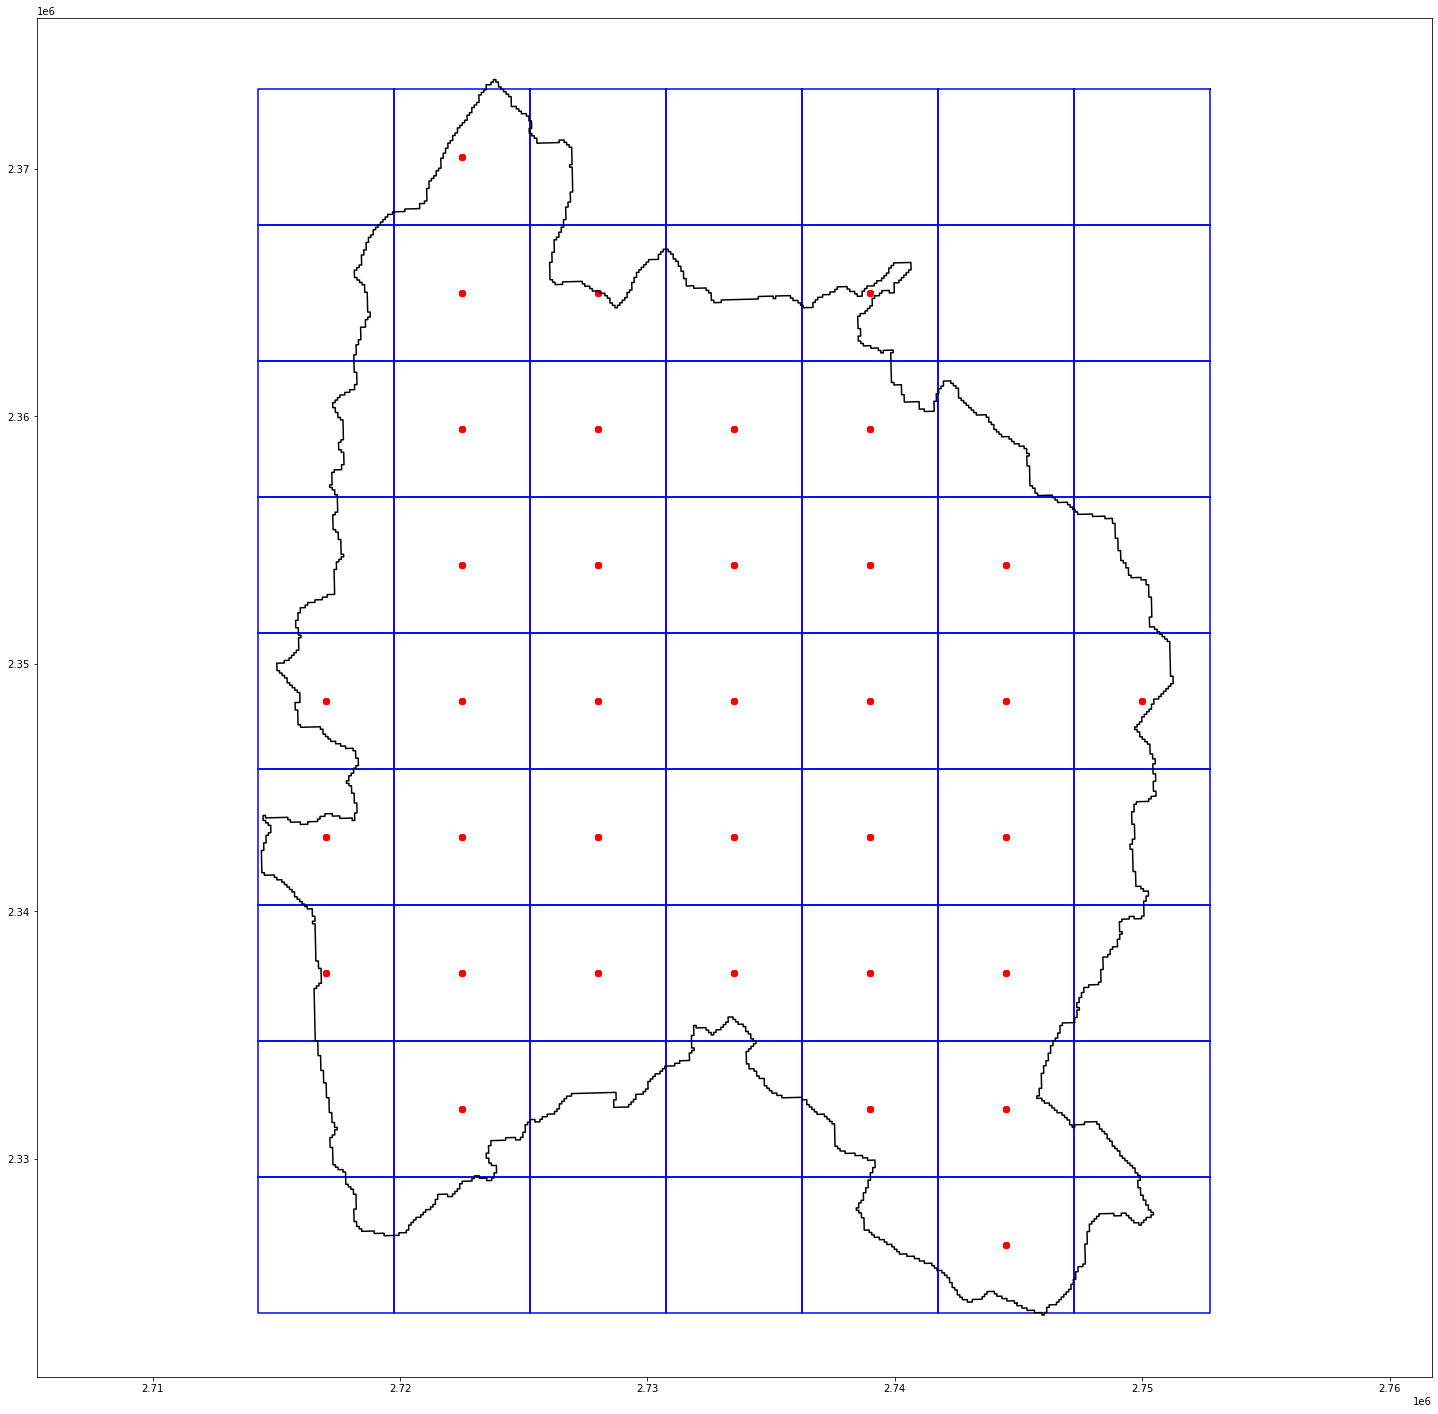

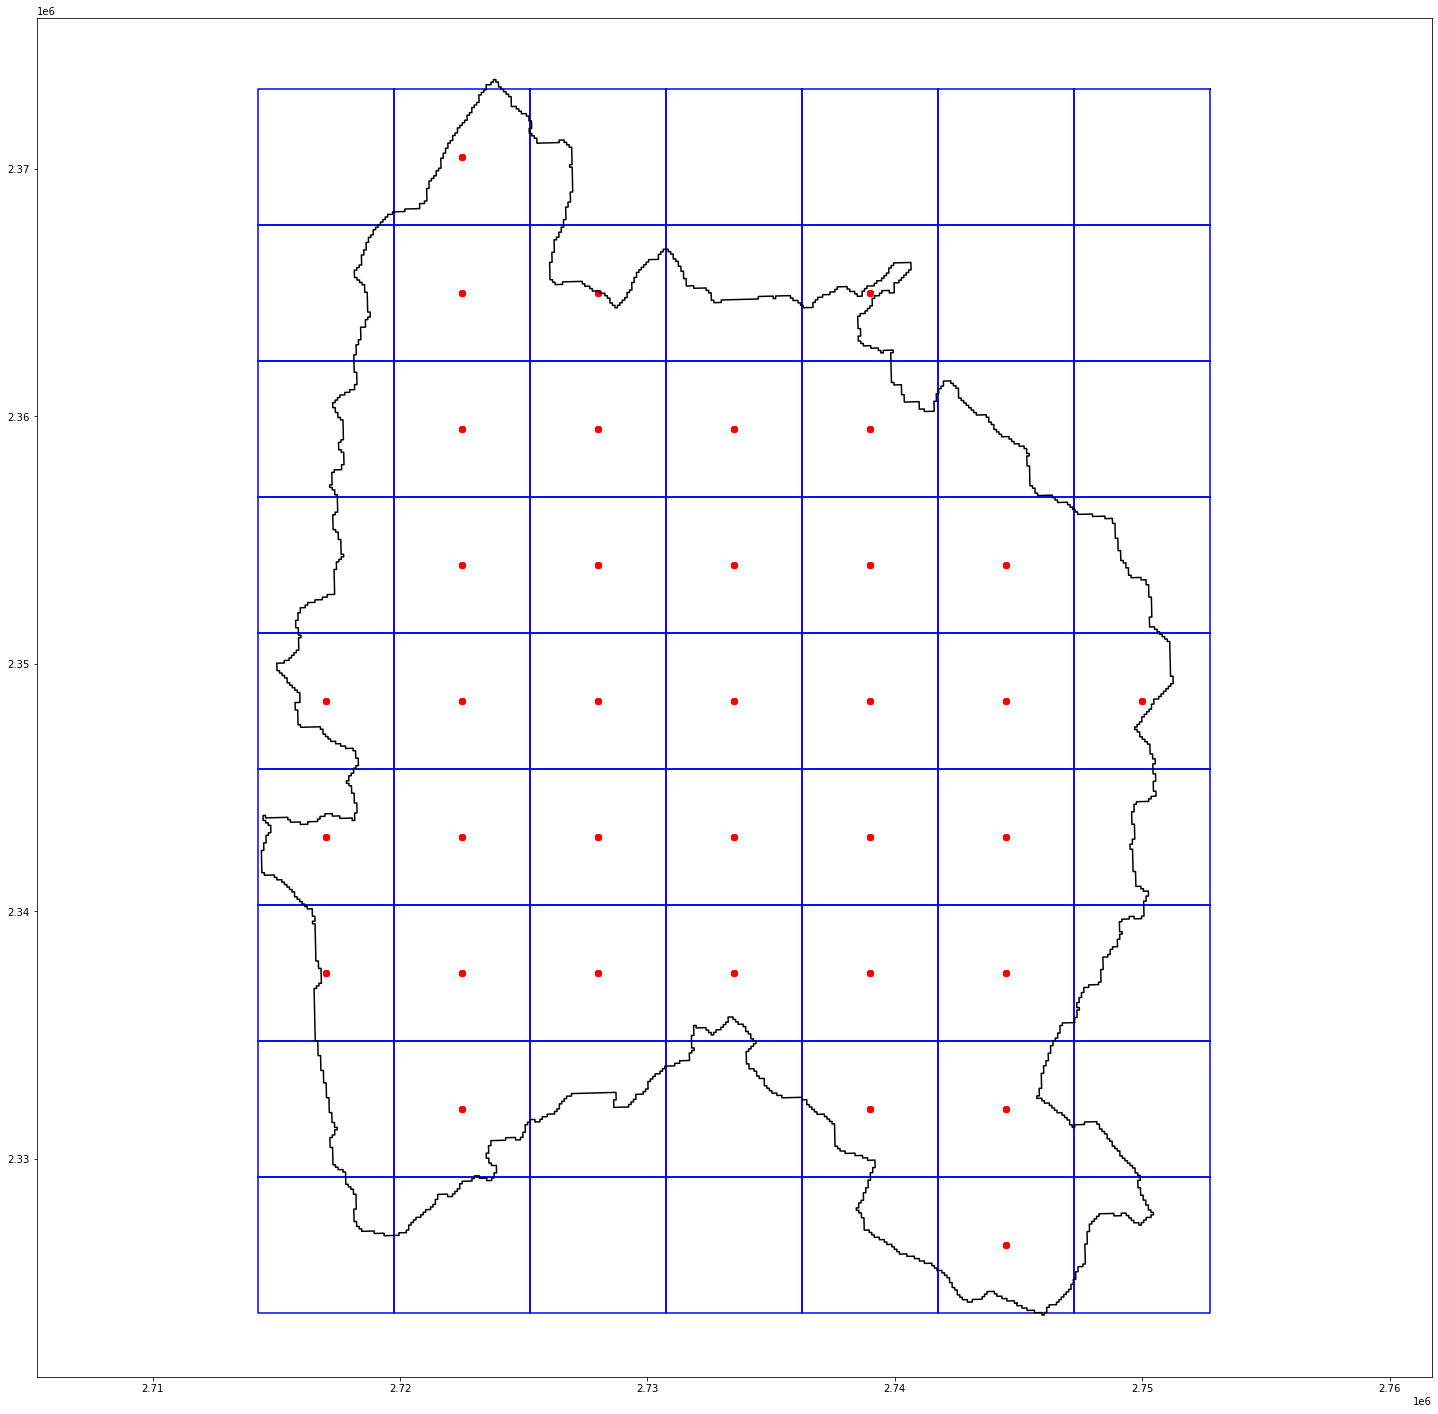

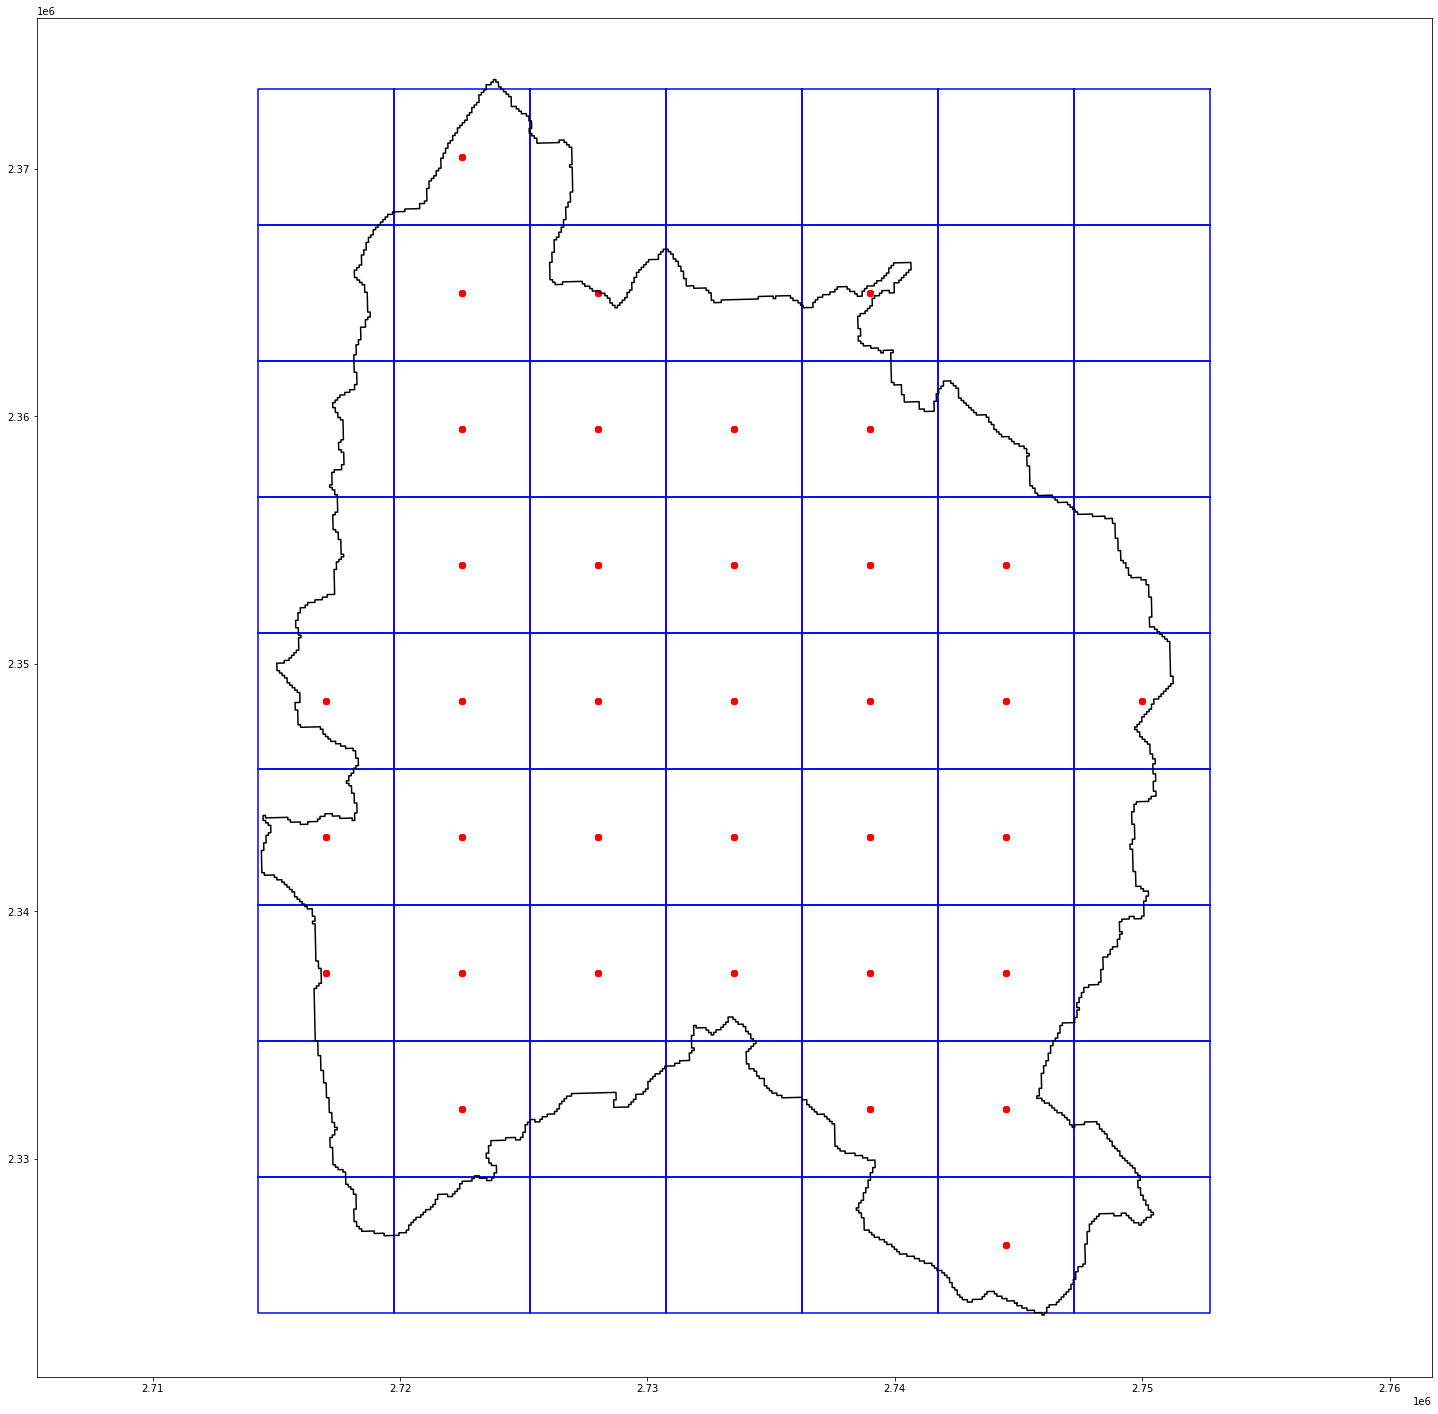

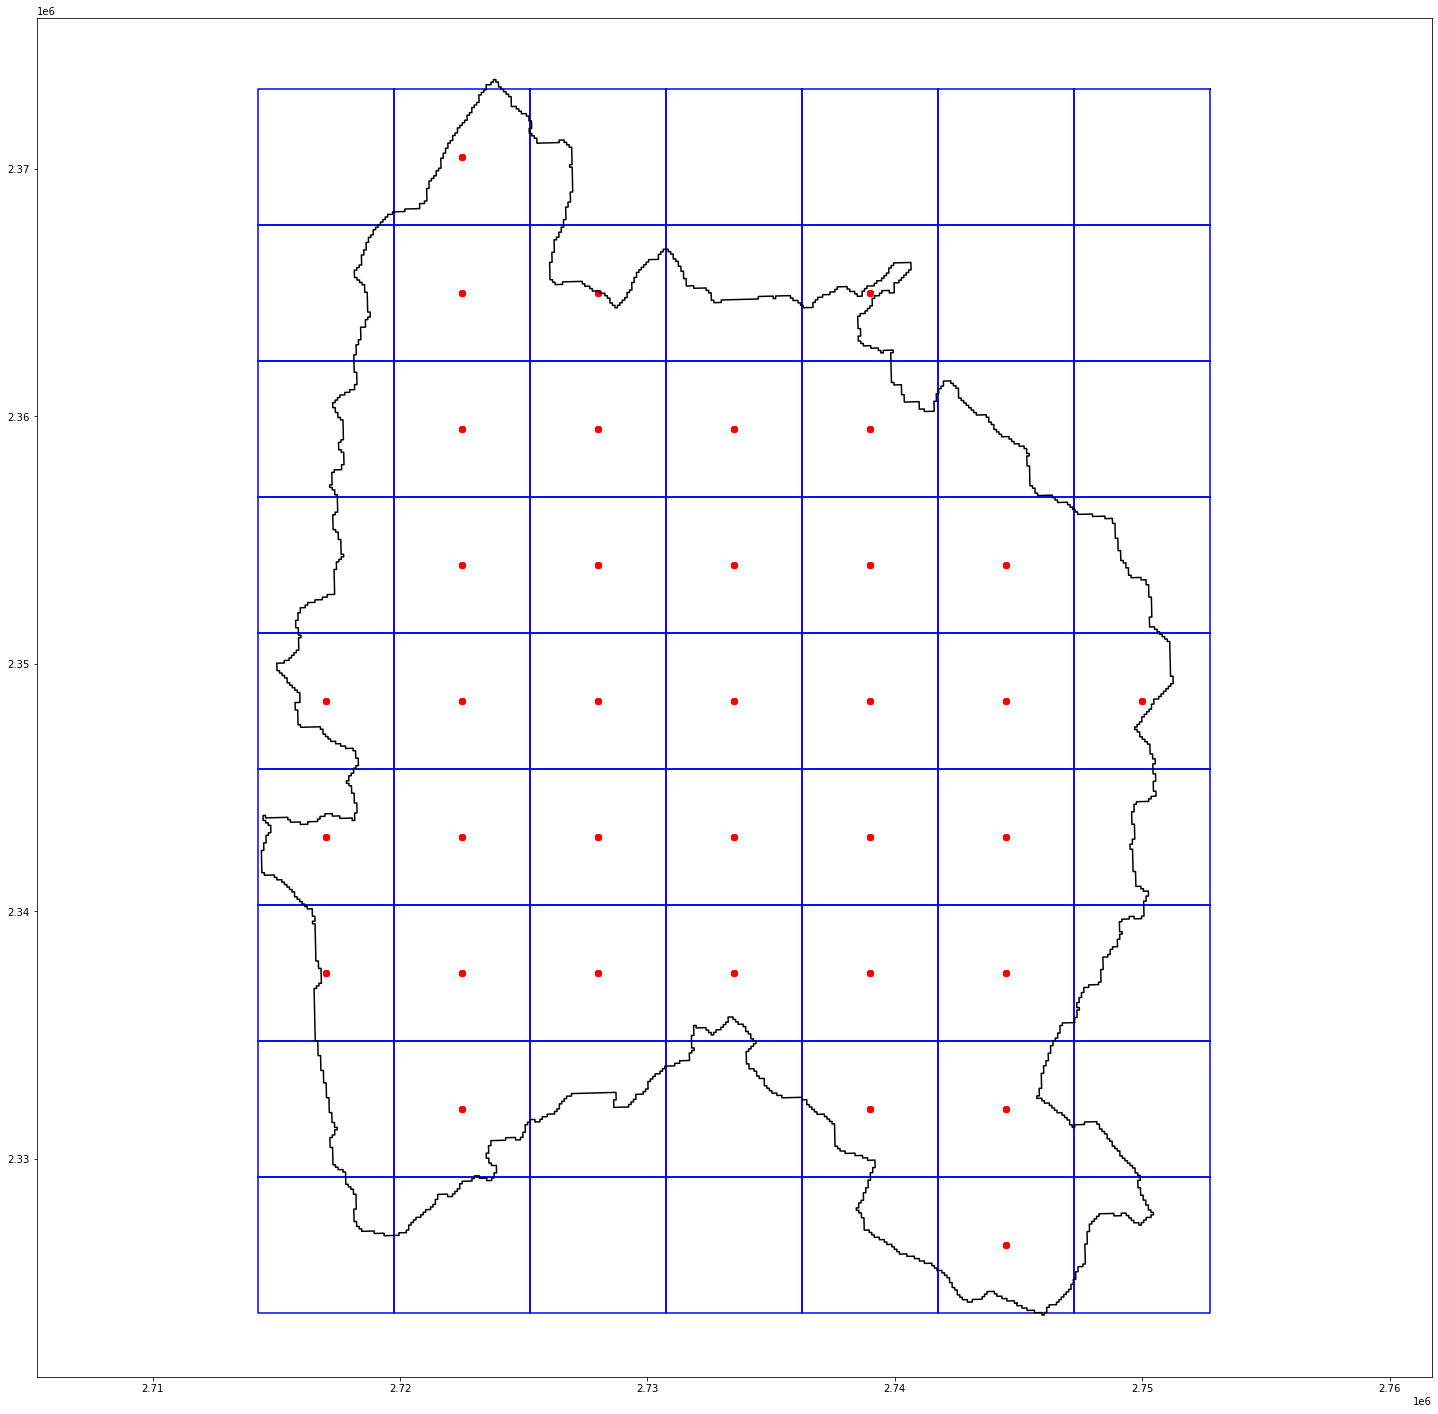

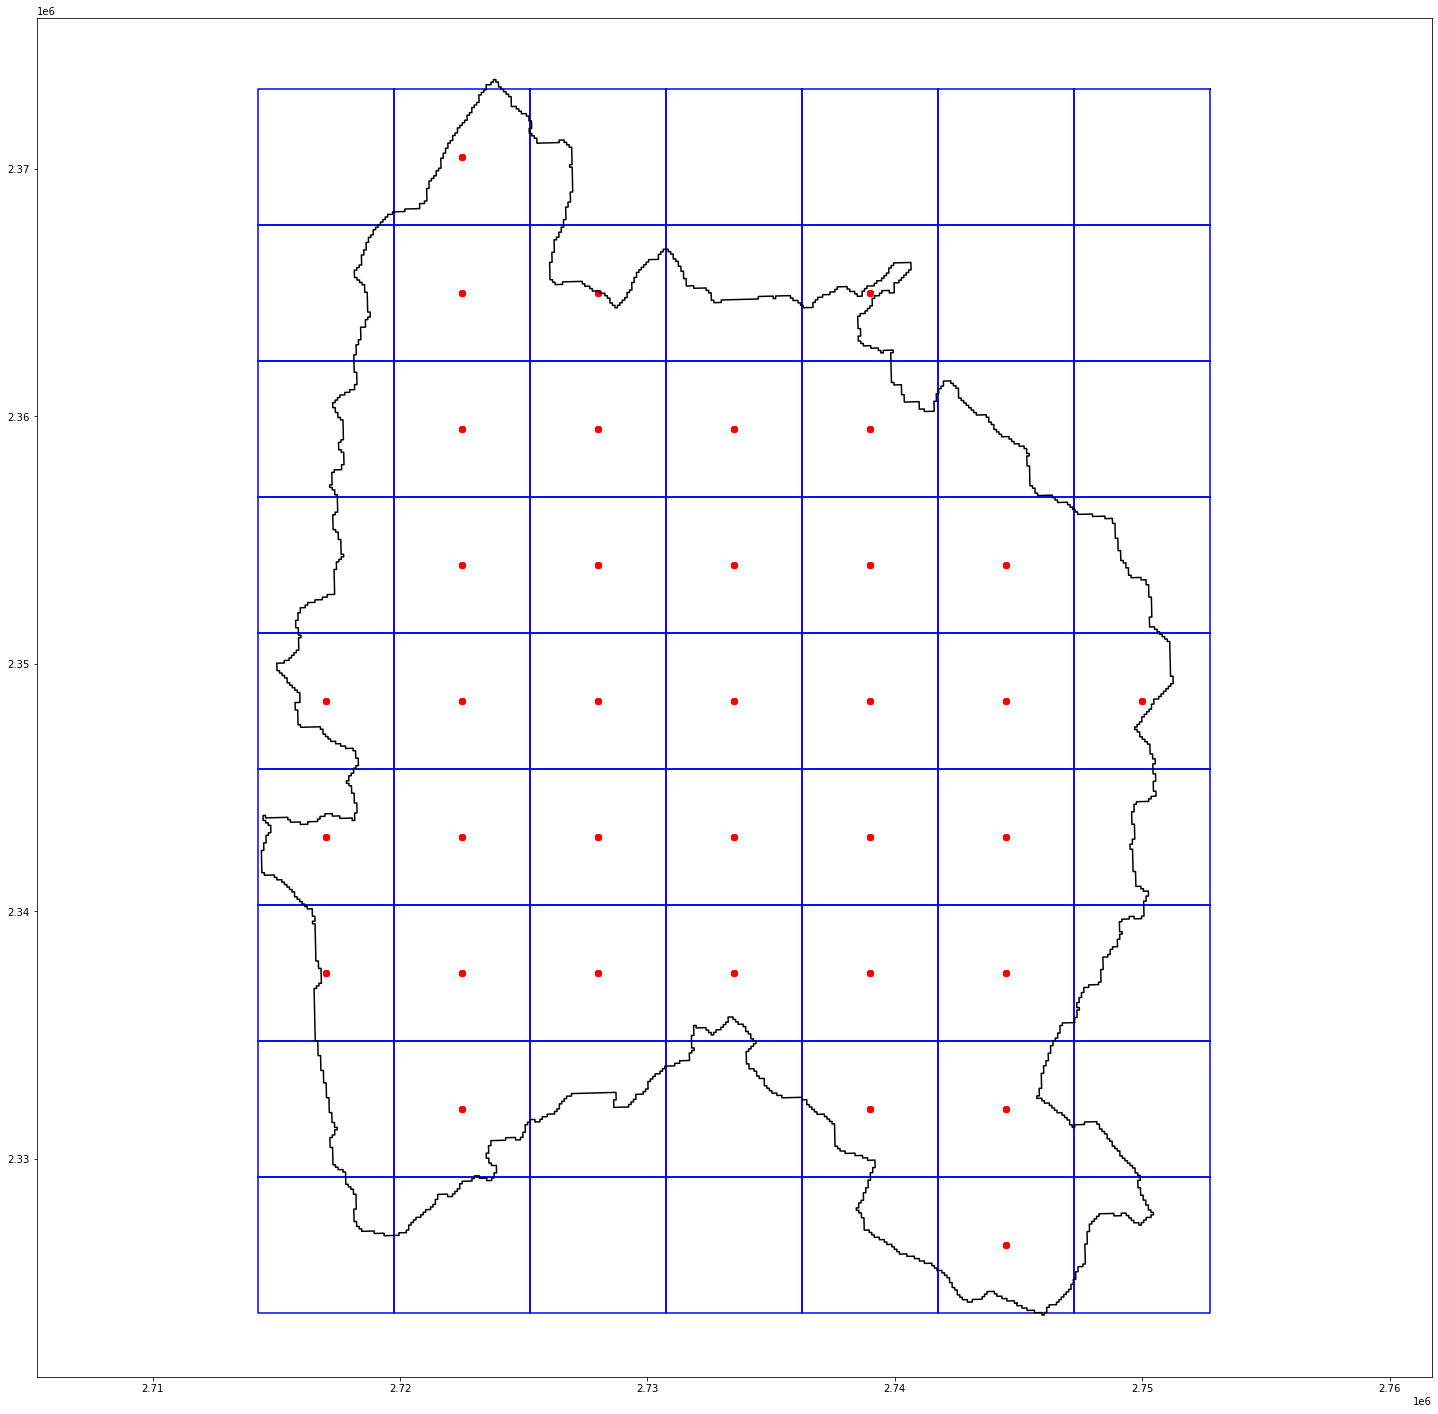

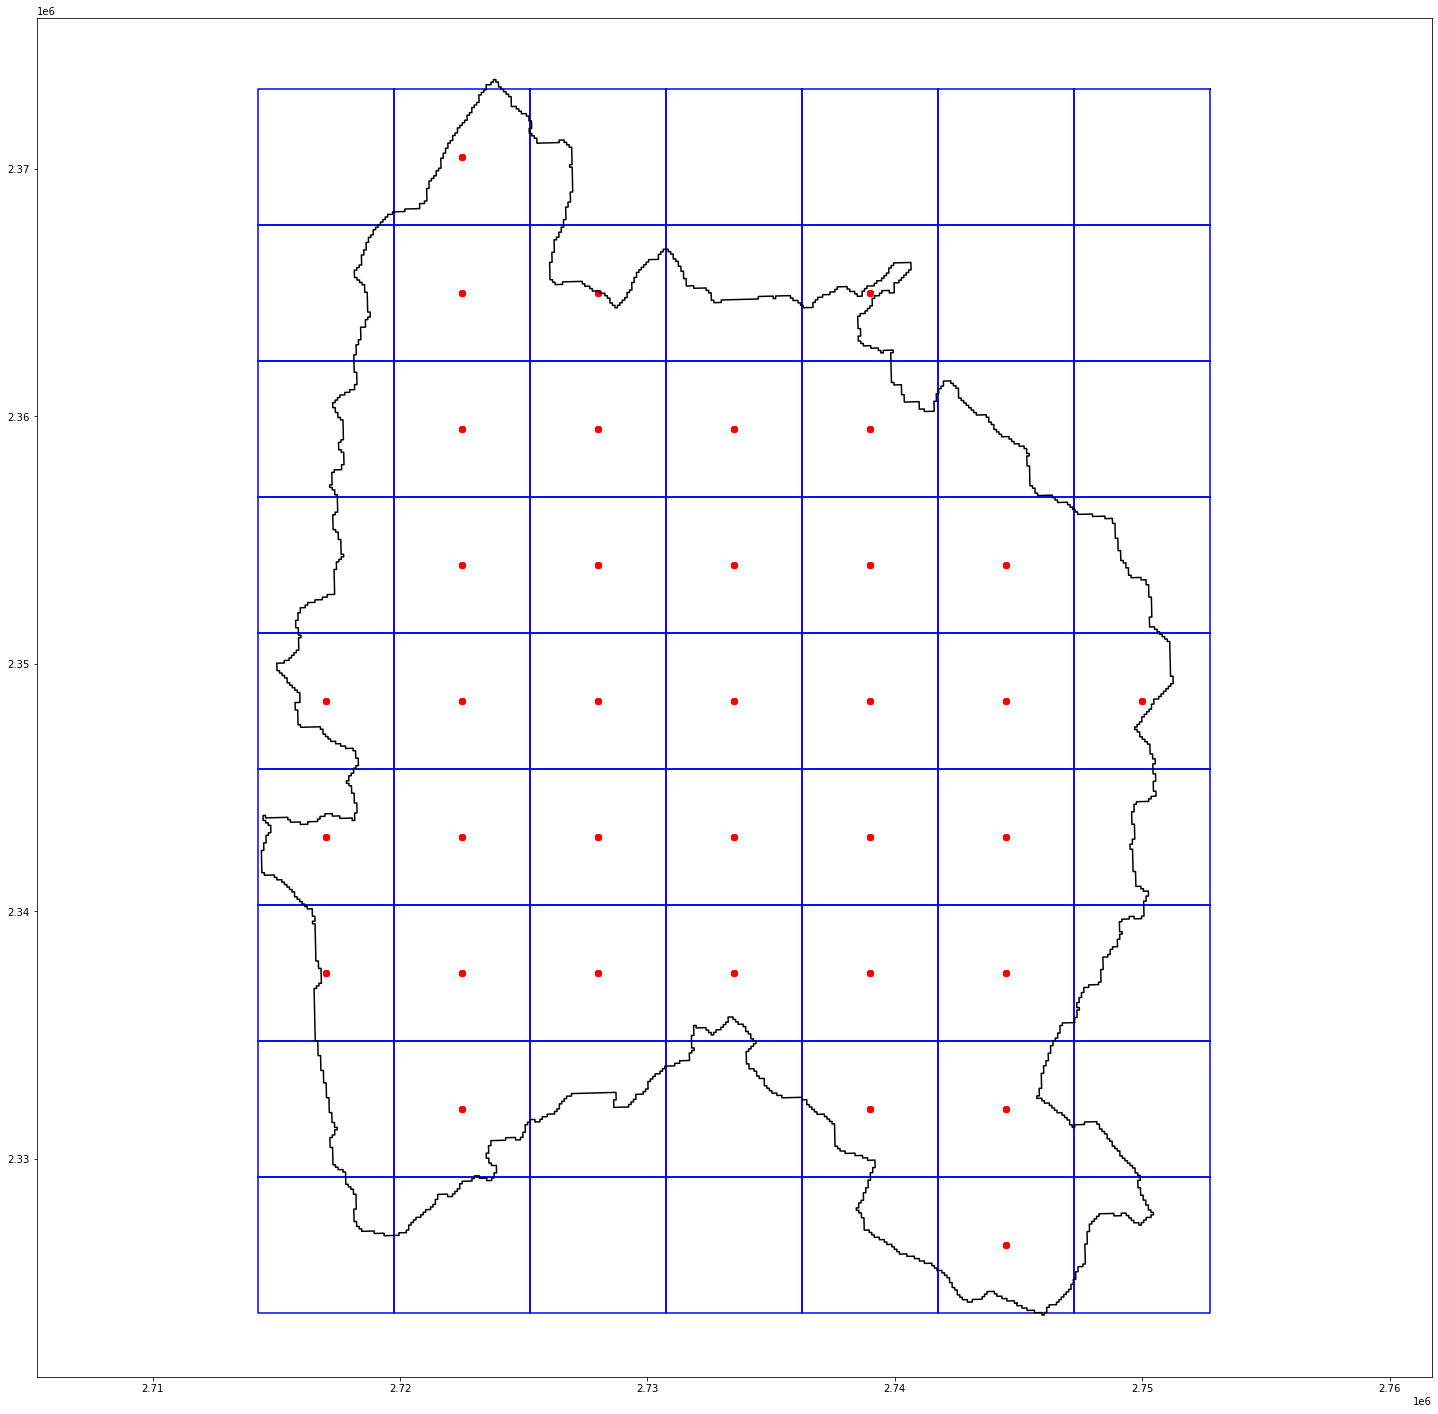

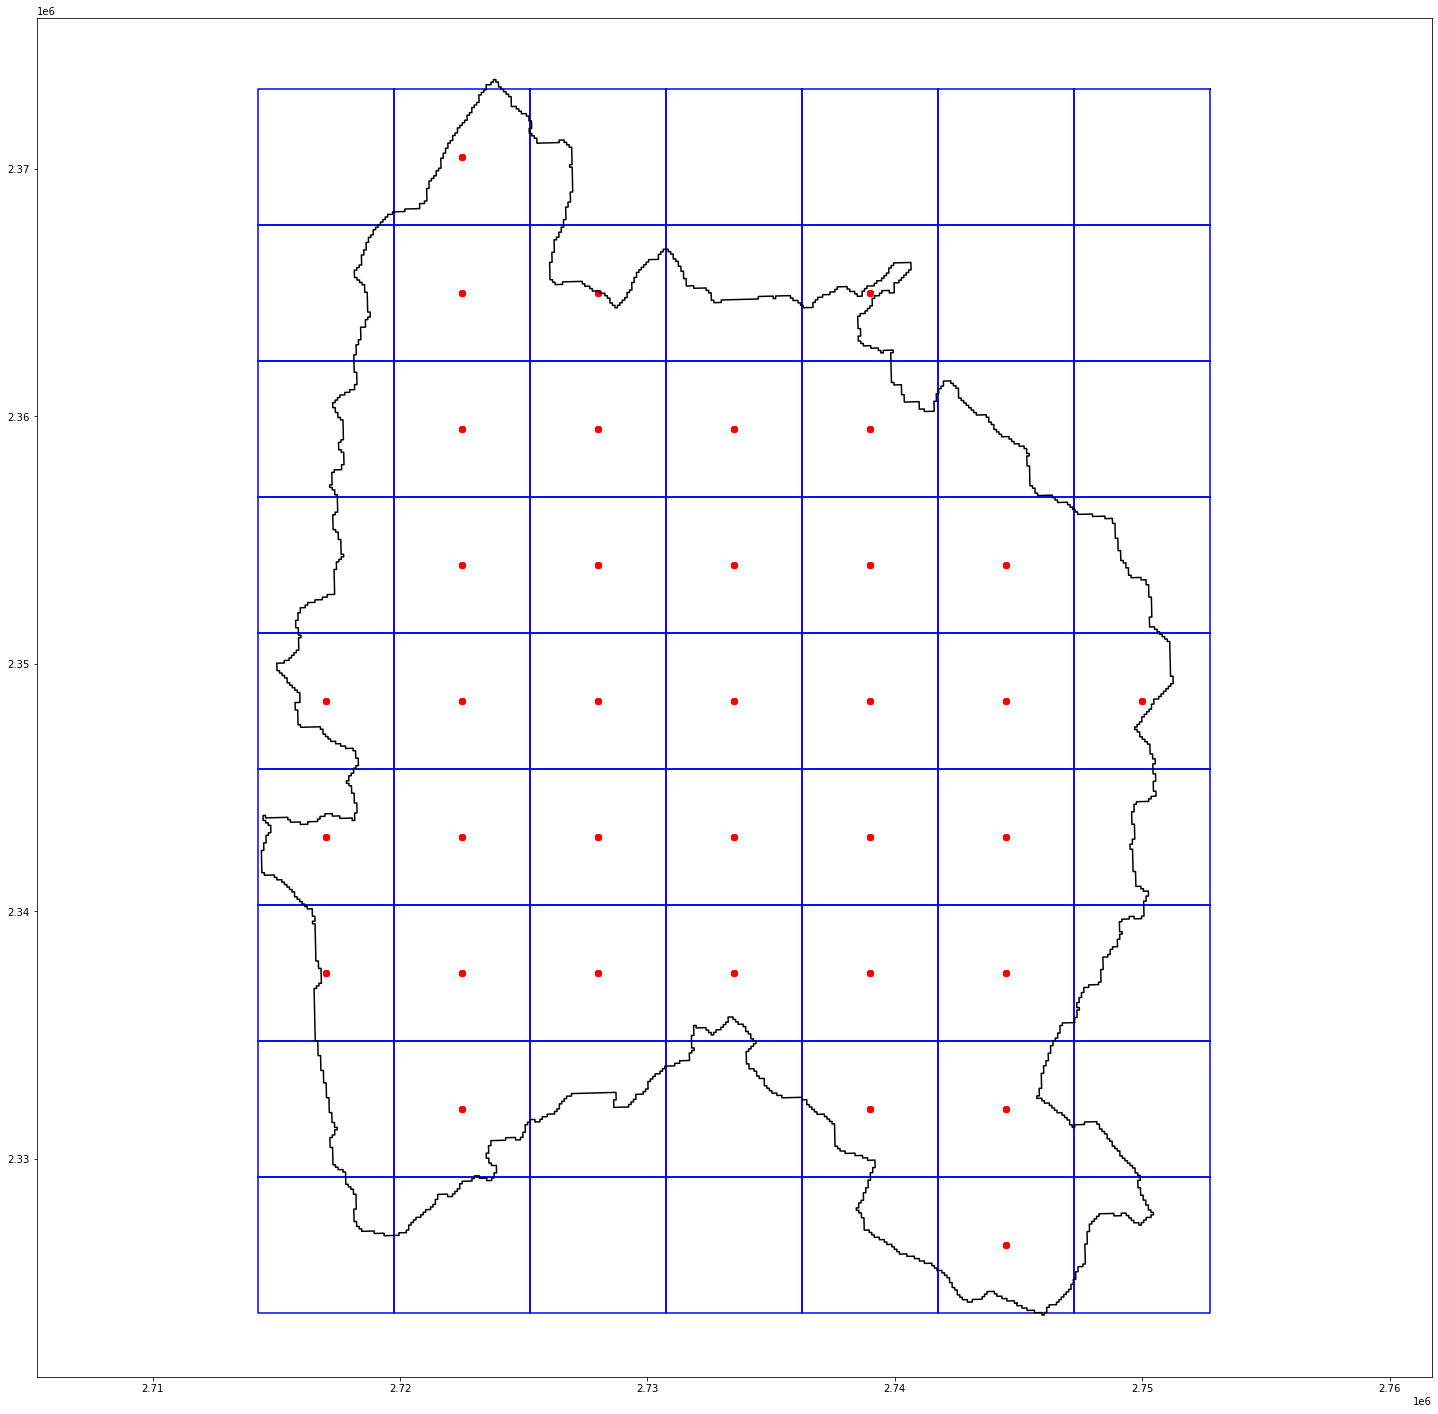

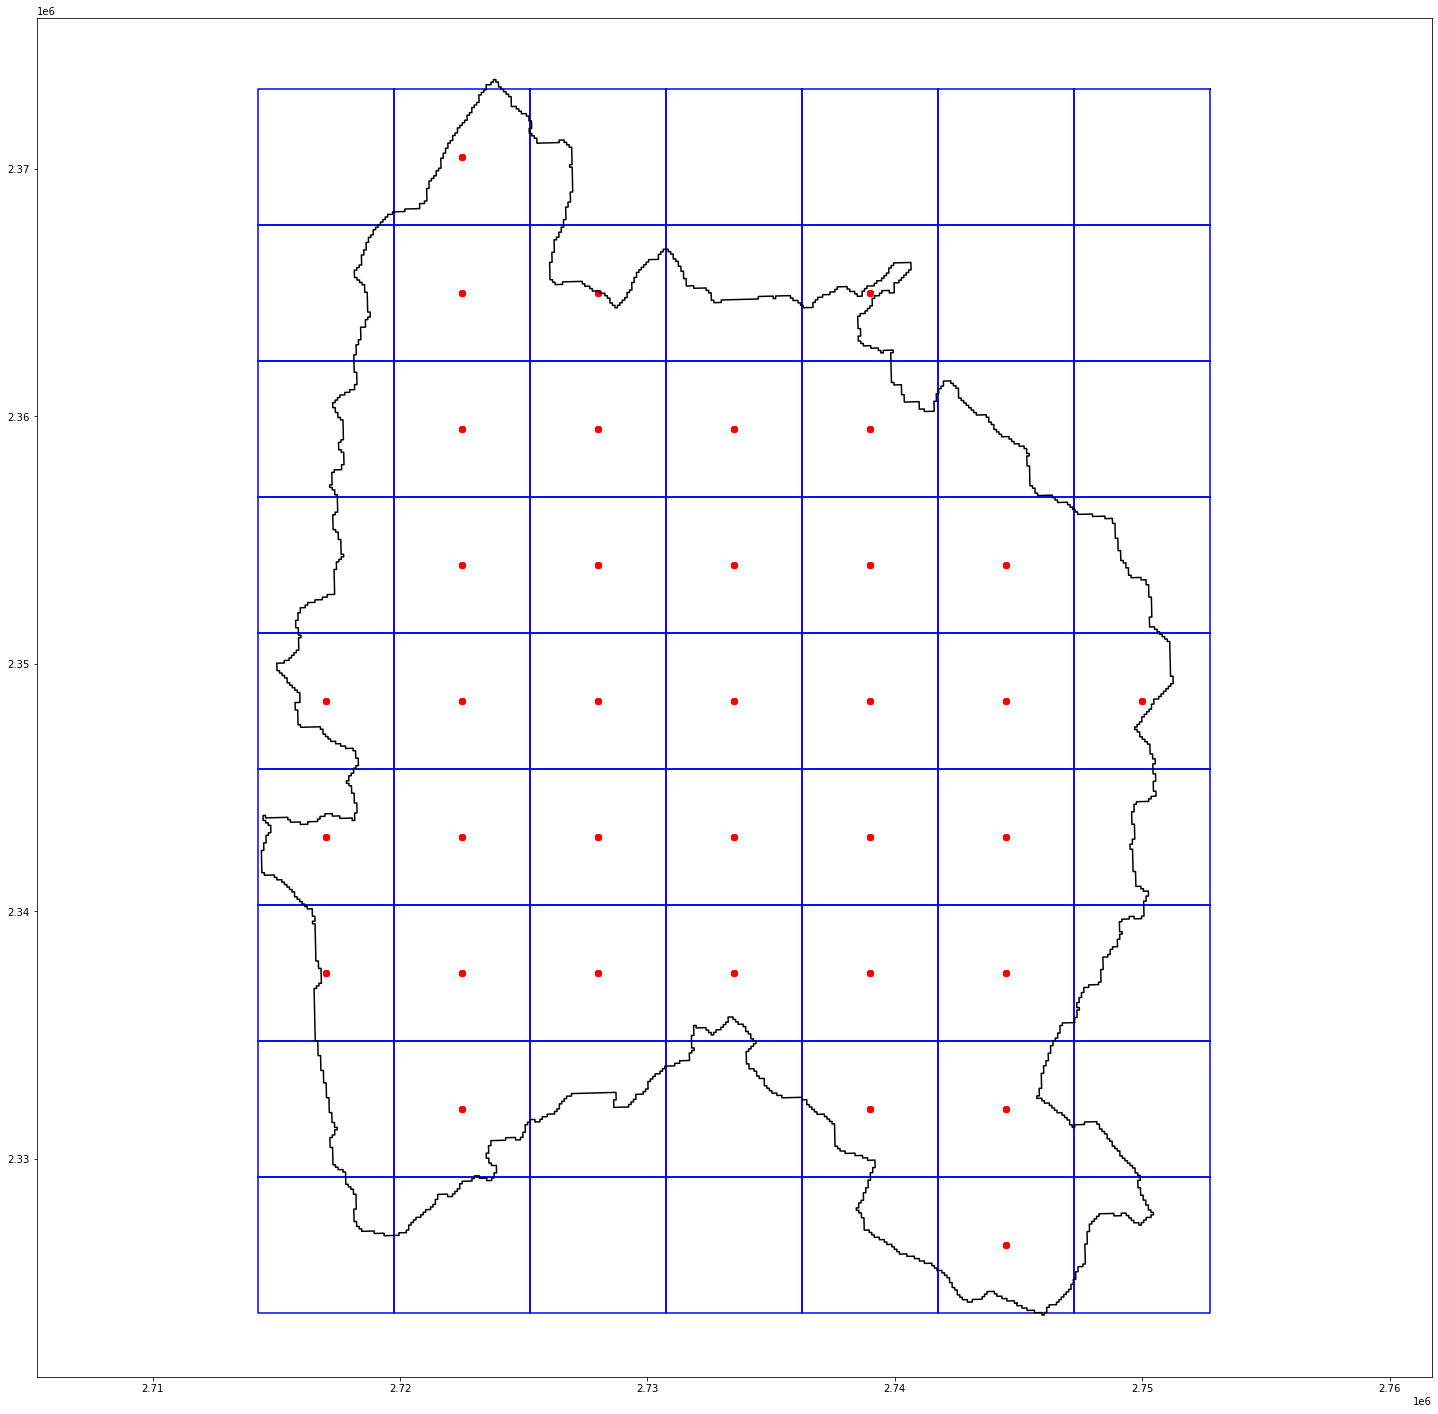

Error in callback <function flush_figures at 0x0000023D7085CD30> (for post_execute):


KeyboardInterrupt: 

In [111]:
swe=[]
c=0
for i in filenames:
    support=readnetcdf_in_shp_db((mypath+i), STAT_CODE,plot=True)
    swe.append(xarray2df(support.resample(time='1d').sum(skipna=False),'S', 'swe_tot'))
    runoff.append(xarray2df(support.resample(time='1d').sum(skipna=False),'R', 'runoff'))
swe=pd.concat(swe).dropna(axis=1,how='all')

In [115]:
# Concatenate and save
catchment_name='DROME_SAILLANS.csv'
daily_input = pd.concat([runoff, t2m, tp, pet,s,r], axis=1, join='inner')
#daily_input = pd.concat([daily_input,swe.loc[~swe.index.duplicated(keep='first')]], axis=1, join='inner')

path=r'C:\Users\mmazzolini\OneDrive - Scientific Network South Tyrol\Documents\conda\daily_input\\'+catchment_name

In [117]:
#save into a csv file.
# if file does not exist write header 
if not os.path.isfile(path):
   daily_input.to_csv(path)
else: # else print the problem
   print('file already exists')

In [21]:
era5_fileName = r'C:\Users\mmazzolini\OneDrive - Scientific Network South Tyrol\era5\SNOWGRID\ado-snowgrid.nc'

In [25]:
ds = xr.open_dataset(era5_fileName)

In [26]:
ds

<xarray.Dataset>
Dimensions:            (y: 157, x: 188, time: 15341)
Coordinates:
  * y                  (y) int32 2150500 2156000 2161500 ... 3003000 3008500
  * x                  (x) int32 2596000 2601500 2607000 ... 3619000 3624500
  * time               (time) datetime64[ns] 1979-01-01 ... 2020-12-31
Data variables:
    swe_tot            (time, y, x) float32 ...
    snow_temp          (time, y, x) float32 ...
    snow_depth         (time, y, x) float64 ...
    runoff             (time, y, x) float32 ...
    Lambert_Conformal  (time) float64 ...
Attributes:
    title:        ADO Snowgrid model output
    institution:  Zentralanstalt fuer Meteorologie und Geodynamik
    licence:      proprietary, for internal use within the ADO project only
    keywords:     SNOWGRID, ADO
    Conventions:  CF-1.7
    history:      2021-10-29 06:30:16 run of SNOWGRID-CL ADO version
    source:       deterministic model
    references:   Olefs, Marc, Roland Koch, Wolfgang Schöner, und Thomas Mark...
    comment:      Model output from an adapted version of the ZAMG snow model...